<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [88]:
covid = pd.read_csv(datadir + "20200327.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid = covid[['date', 'denominazione_regione', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi']]
covid

date denominazione_regione  ...  totale_casi  tamponi
0    2020-02-24T18:00:00               Abruzzo  ...            0        5
1    2020-02-24T18:00:00            Basilicata  ...            0        0
2    2020-02-24T18:00:00          P.A. Bolzano  ...            0        1
3    2020-02-24T18:00:00              Calabria  ...            0        1
4    2020-02-24T18:00:00              Campania  ...            0       10
..                   ...                   ...  ...          ...      ...
688  2020-03-27T17:00:00               Toscana  ...         3450    23746
689  2020-03-27T17:00:00           P.A. Trento  ...         1391     4923
690  2020-03-27T17:00:00                Umbria  ...          884     6137
691  2020-03-27T17:00:00         Valle d'Aosta  ...          452     1252
692  2020-03-27T17:00:00                Veneto  ...         7497    83627

[693 rows x 7 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [89]:
italy_currently_positive = covid.pivot_table('totale_attualmente_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...      32     221
2020-02-25T18:00:00          0           0  ...      42     311
2020-02-26T18:00:00          0           0  ...      69     385
2020-02-27T18:00:00          1           0  ...     109     588
2020-02-28T18:00:00          1           0  ...     149     821
2020-02-29T17:00:00          2           0  ...     189    1049
2020-03-01T17:00:00          5           0  ...     261    1577
2020-03-02T18:00:00          5           0  ...     271    1835
2020-03-03T18:00:00          6           1  ...     297    2263
2020-03-04T17:00:00          7           1  ...     345    2706
2020-03-05T17:00:00          8           1  ...     380    3296
2020-03-06T17:00:00          9           3  ...     454    3916
2020-03-07T18:00:00         11           3  ...     505    5061
2020-03-08T18:00:00         17           4  ...     623    6387
2020-03-09T18:00:00         30           5  ...     694    7985
2020-03-10T18:00:00         37           7  ...     783    8514
2020-03-11T17:00:00         37           8  ...     940   10590
2020-03-12T17:00:00         78           8  ...    1297   12839
2020-03-13T17:00:00         83          10  ...    1453   14955
2020-03-14T17:00:00        106          10  ...    1775   17750
2020-03-15T17:00:00        128          11  ...    1989   20603
2020-03-16T17:00:00        165          12  ...    2274   23073
2020-03-17T17:00:00        216          20  ...    2488   26062
2020-03-18T17:00:00        249          27  ...    2953   28710
2020-03-19T17:00:00        366          37  ...    3169   33190
2020-03-20T17:00:00        422          52  ...    3677   37860
2020-03-21T17:00:00        494          66  ...    4214   42681
2020-03-22T17:00:00        539          81  ...    4644   46638
2020-03-23T17:00:00        605          89  ...    4986   50418
2020-03-24T17:00:00        622          91  ...    5351   54030
2020-03-25T17:00:00        738         112  ...    5745   57521
2020-03-26T17:00:00        860         133  ...    6140   62013
2020-03-27T17:00:00        925         147  ...    6648   66414

[33 rows x 22 columns]

In [90]:
italy_dead

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...       1       7
2020-02-25T18:00:00          0           0  ...       1      10
2020-02-26T18:00:00          0           0  ...       2      12
2020-02-27T18:00:00          0           0  ...       2      17
2020-02-28T18:00:00          0           0  ...       2      21
2020-02-29T17:00:00          0           0  ...       2      29
2020-03-01T17:00:00          0           0  ...       2      34
2020-03-02T18:00:00          0           0  ...       2      52
2020-03-03T18:00:00          0           0  ...       3      79
2020-03-04T17:00:00          0           0  ...       6     107
2020-03-05T17:00:00          0           0  ...      10     148
2020-03-06T17:00:00          0           0  ...      12     197
2020-03-07T18:00:00          0           0  ...      13     233
2020-03-08T18:00:00          0           0  ...      18     366
2020-03-09T18:00:00          0           0  ...      20     463
2020-03-10T18:00:00          1           0  ...      26     631
2020-03-11T17:00:00          1           0  ...      29     827
2020-03-12T17:00:00          2           0  ...      32    1016
2020-03-13T17:00:00          2           0  ...      42    1266
2020-03-14T17:00:00          2           0  ...      55    1441
2020-03-15T17:00:00          3           0  ...      63    1809
2020-03-16T17:00:00          4           0  ...      69    2158
2020-03-17T17:00:00          6           0  ...      80    2503
2020-03-18T17:00:00          7           0  ...      94    2978
2020-03-19T17:00:00         11           0  ...     115    3405
2020-03-20T17:00:00         17           0  ...     131    4032
2020-03-21T17:00:00         22           0  ...     146    4825
2020-03-22T17:00:00         33           0  ...     169    5476
2020-03-23T17:00:00         38           1  ...     192    6077
2020-03-24T17:00:00         46           1  ...     216    6820
2020-03-25T17:00:00         52           1  ...     258    7503
2020-03-26T17:00:00         63           1  ...     287    8165
2020-03-27T17:00:00         68           3  ...     313    9134

[33 rows x 22 columns]

Passiamo ora alle rappresentazioni grafiche

Nella seguente grafica viene rappresentata la dinamica temporale dei positivi, regione per regione, evidenziando i deceduti con un colore più scuro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


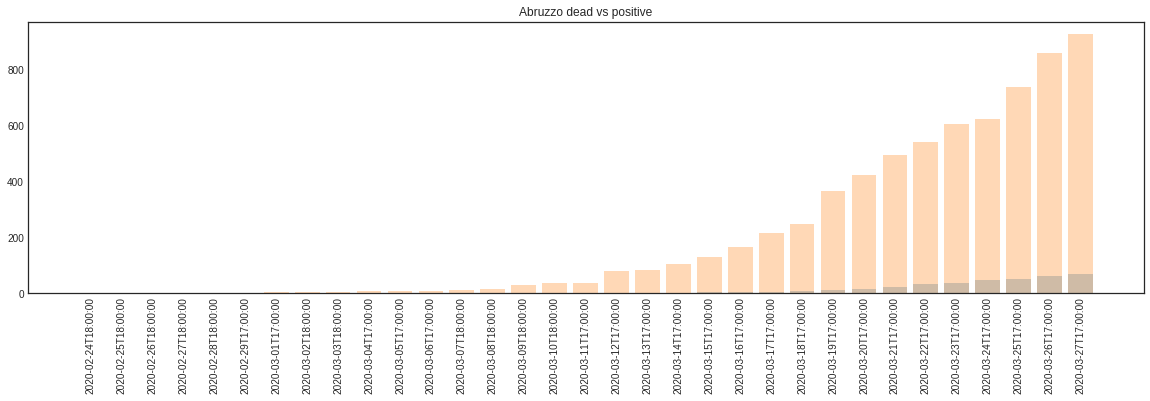

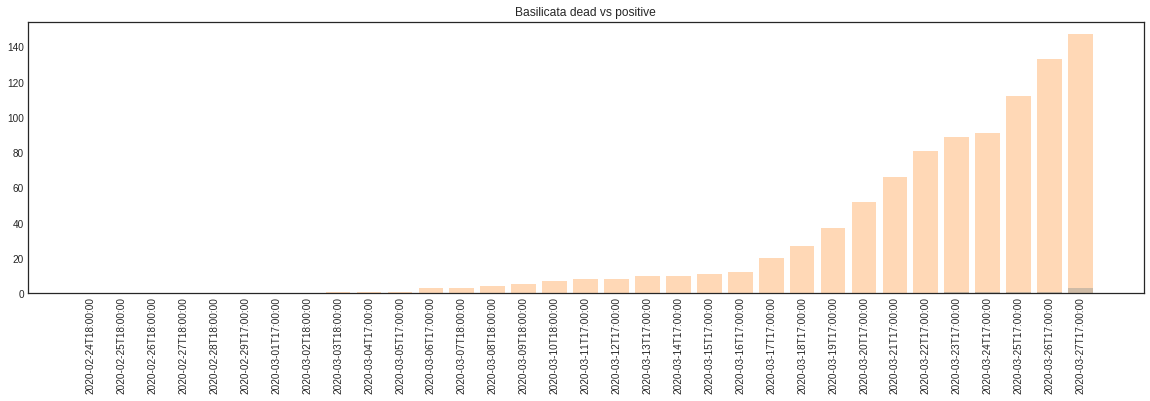

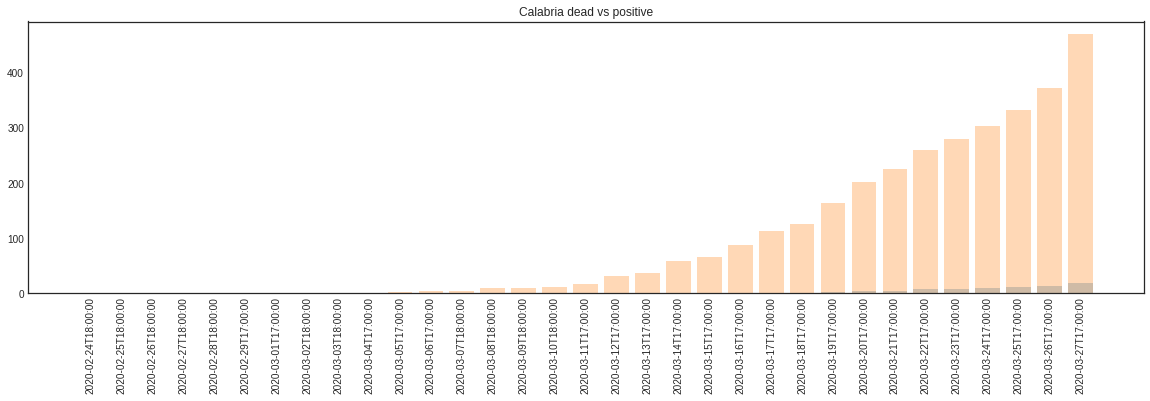

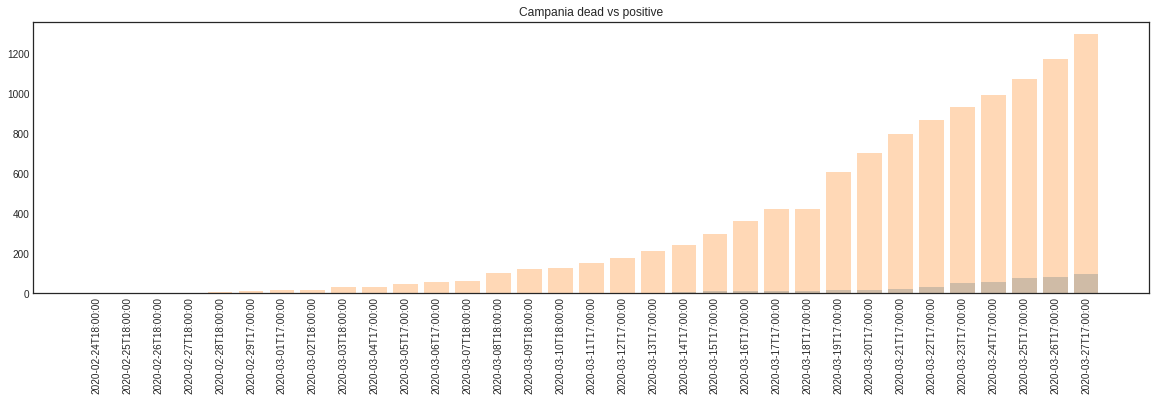

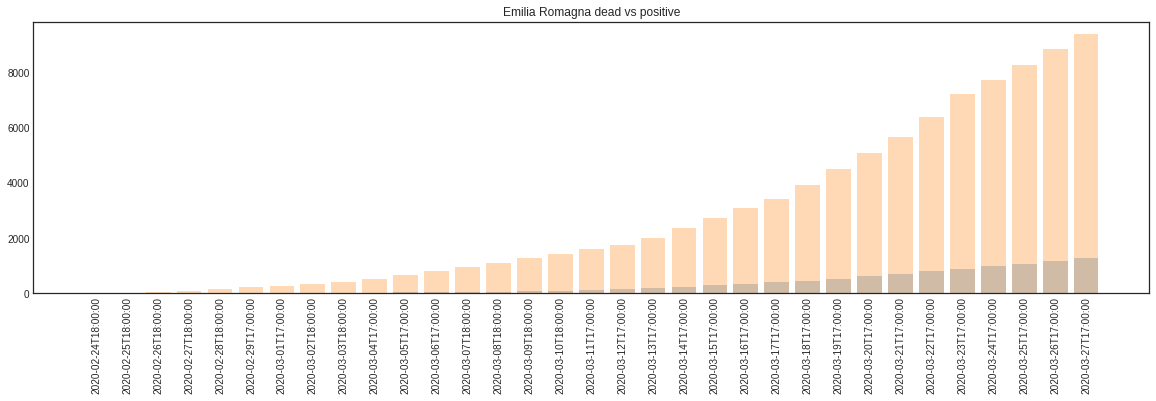

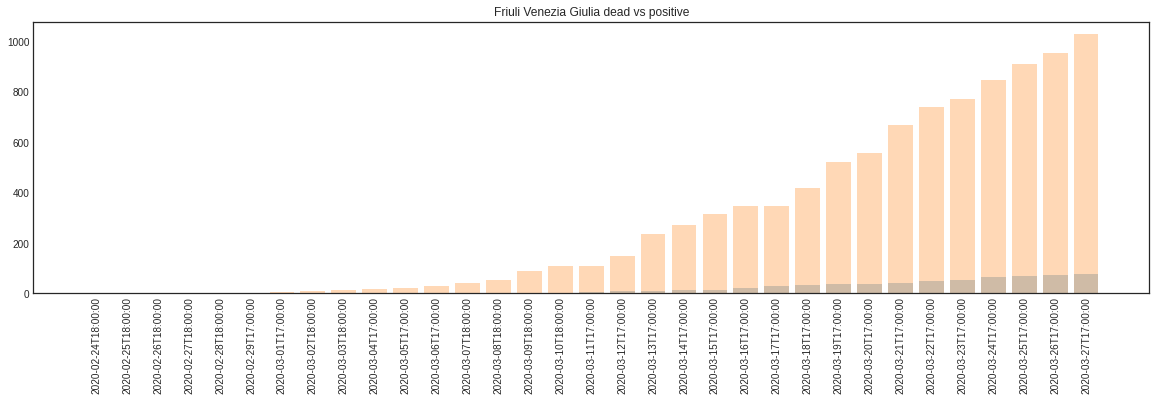

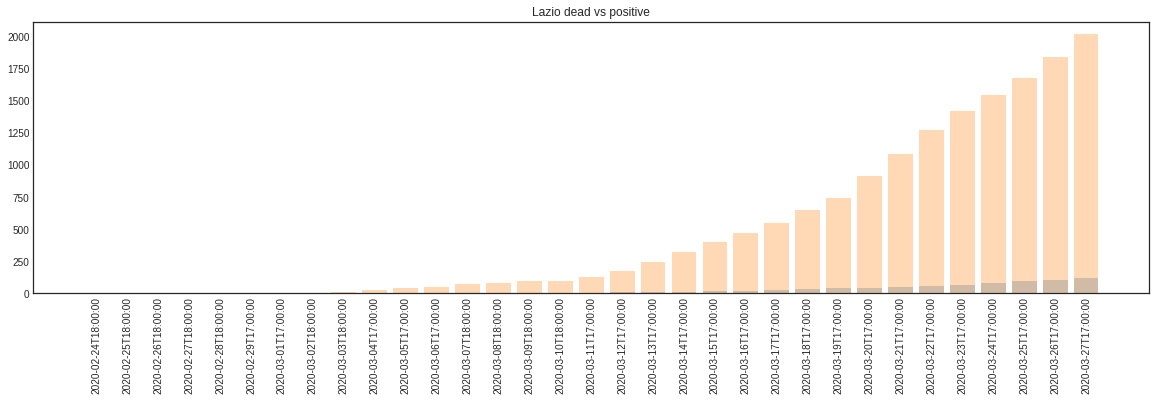

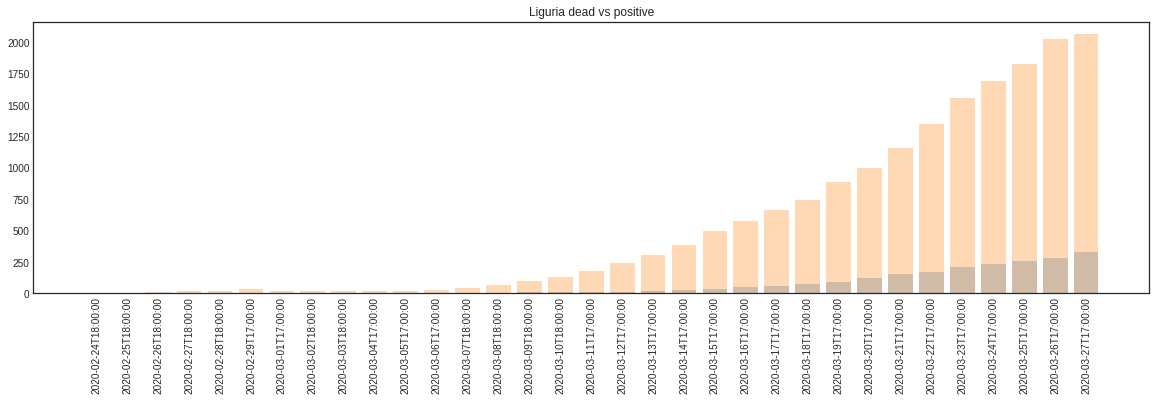

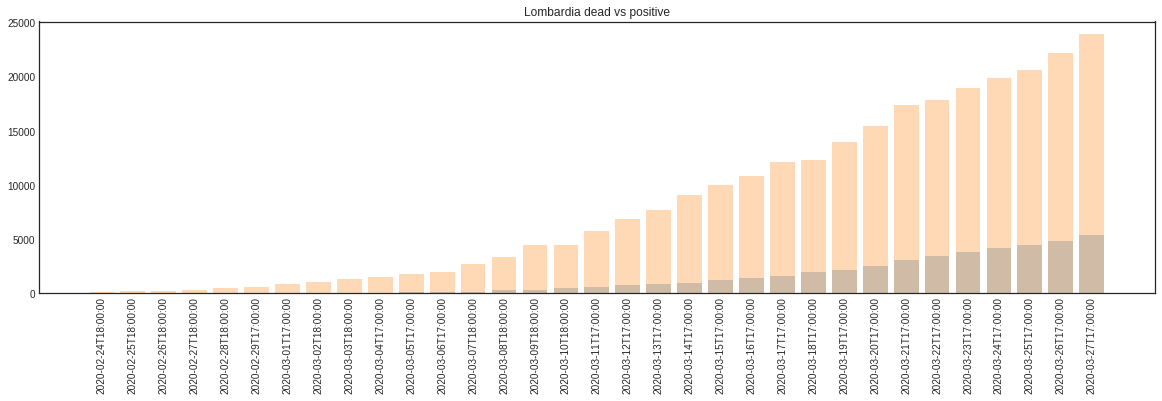

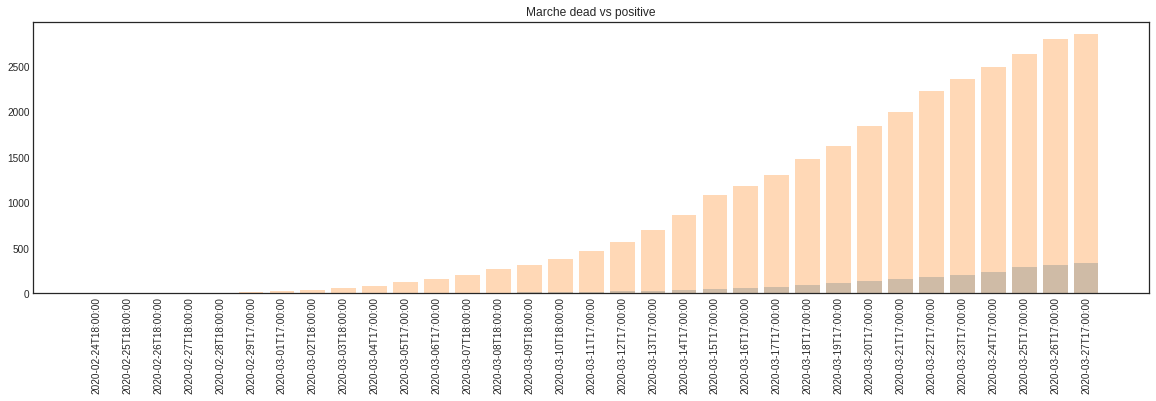

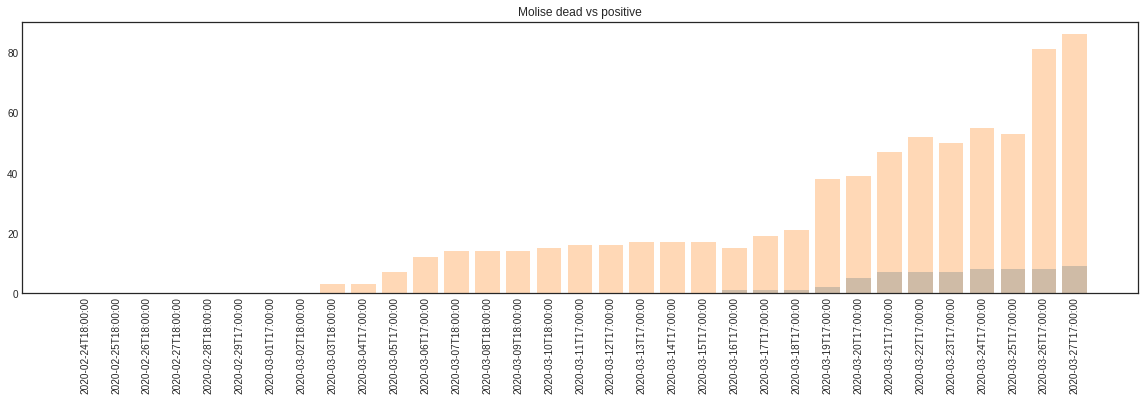

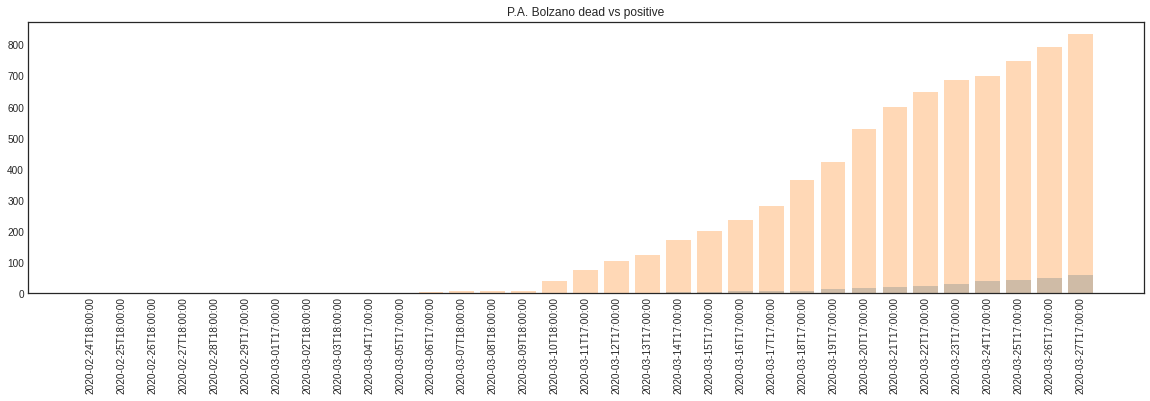

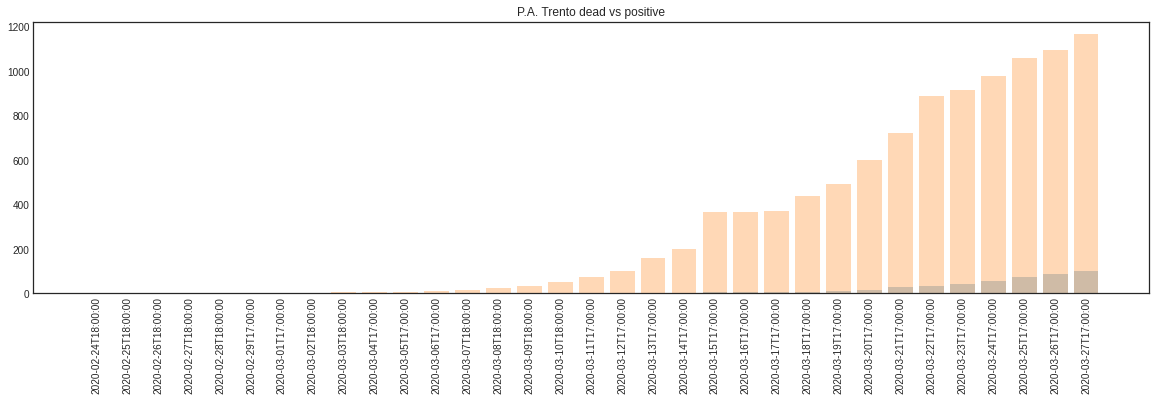

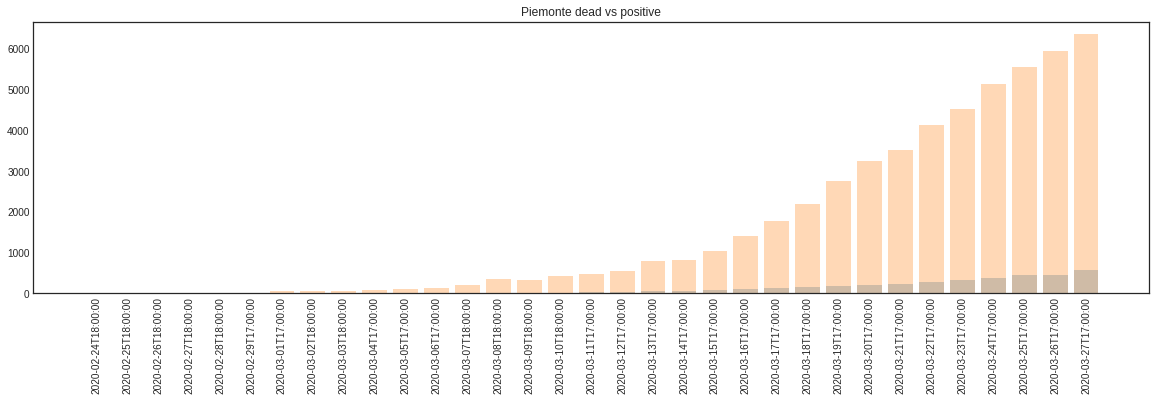

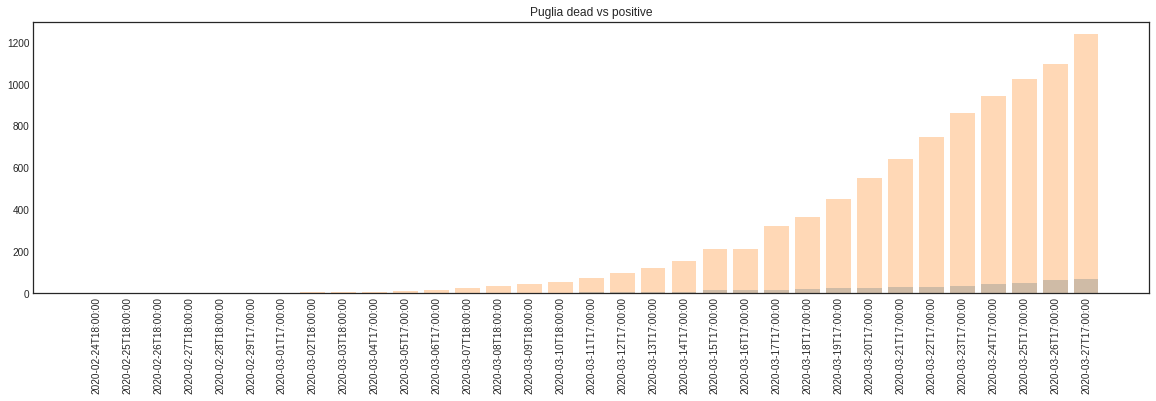

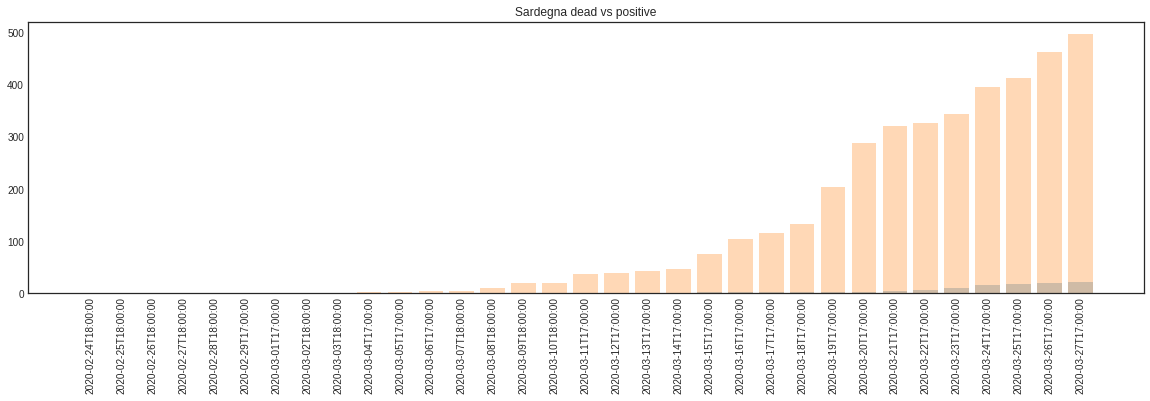

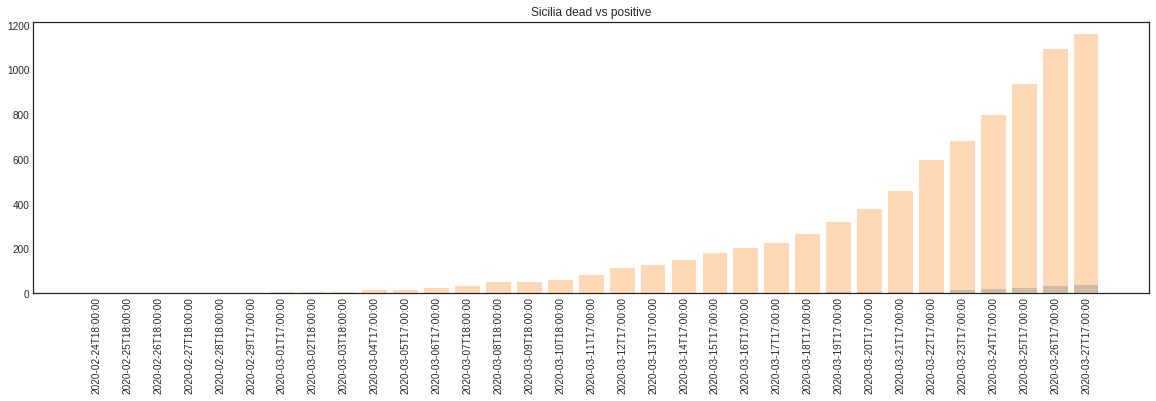

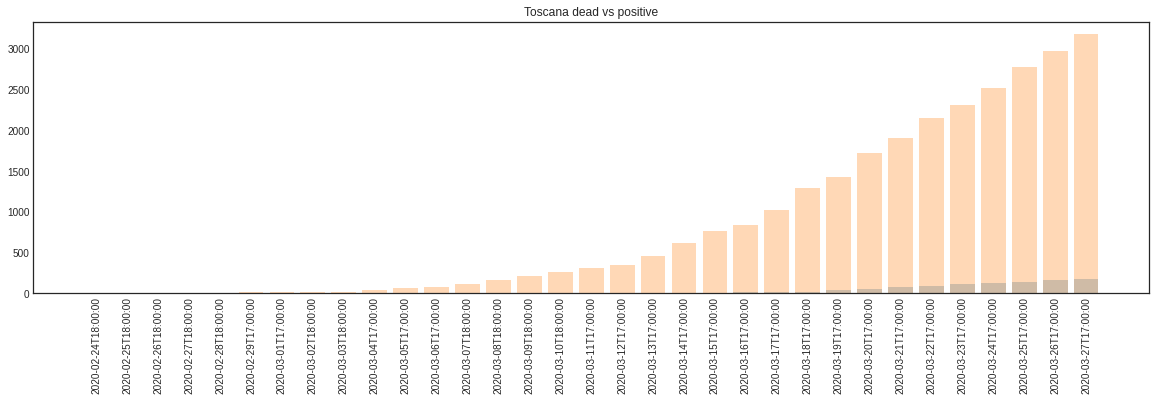

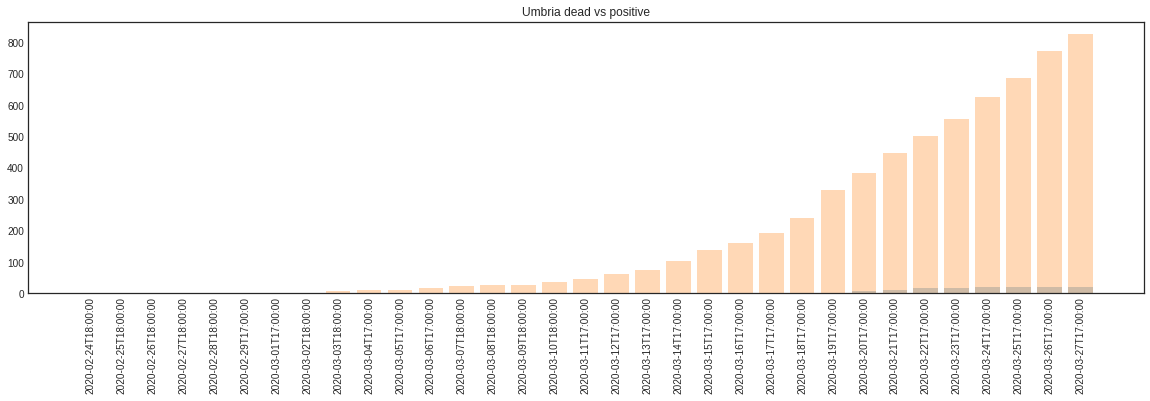

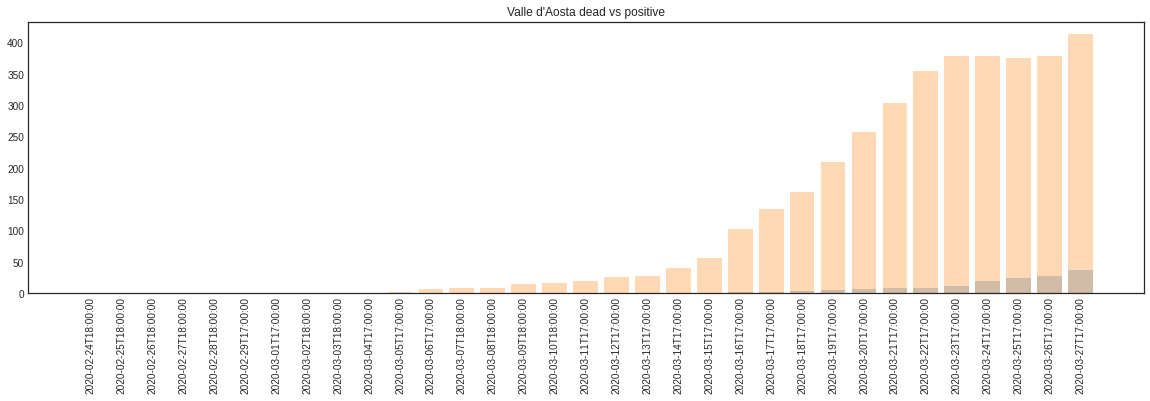

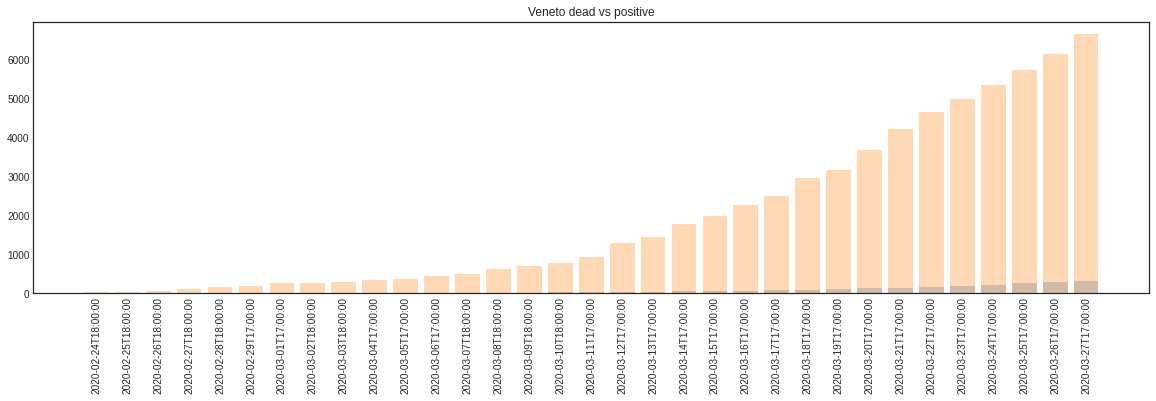

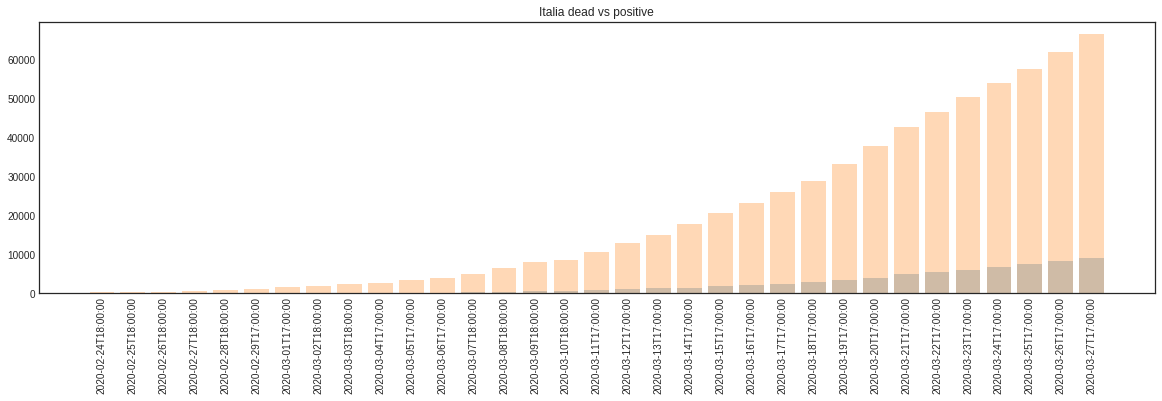

In [91]:
def dead_vs_positive(region):
    fig, ax = plt.subplots(figsize=(20, 5))
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    plt.bar(region_dead.index, height=region_dead.Dead, label=region, alpha=0.3)
    plt.bar(region_positive.index, height=region_positive.Positive, label=region, alpha=0.3)
    plt.title(region + ' dead vs positive')
    plt.xticks(rotation='vertical');


columns = list(italy_dead)
for region in columns: 
    dead_vs_positive(region)



Da un'analisi qualitativa emerge un'accelerazione dei contagi in Calabria ed in maniera più contenuta Puglia, Lombardia e Molise, una tendenza alla stabilizzazione in Liguria e Marche ed una progressione ancora lineare altrove (e complessivamente nell'intera Italia) ma Sicilia, Sardegna, Campania sono sotto osservazione.

Nella seguente grafica si cambia prospettiva e viene rappresentata l'istantanea del rapporto tra deceduti e positivi su tutte le regioni, giorno per giorno


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


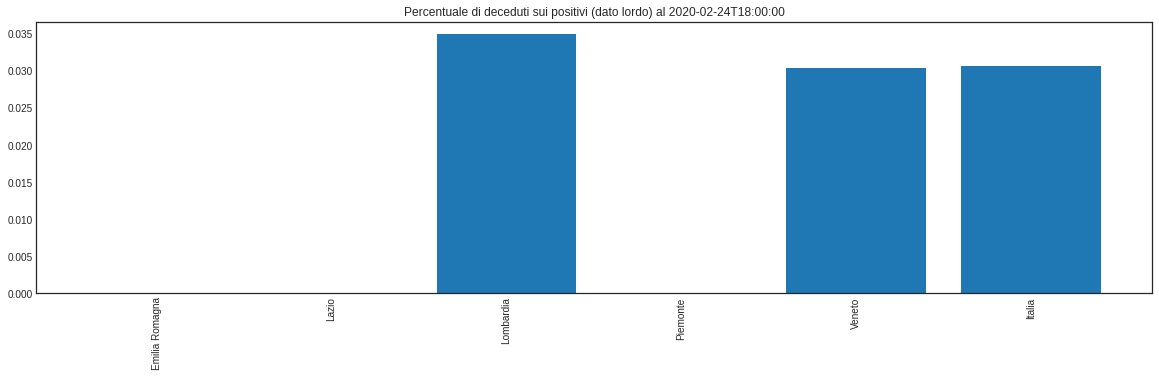

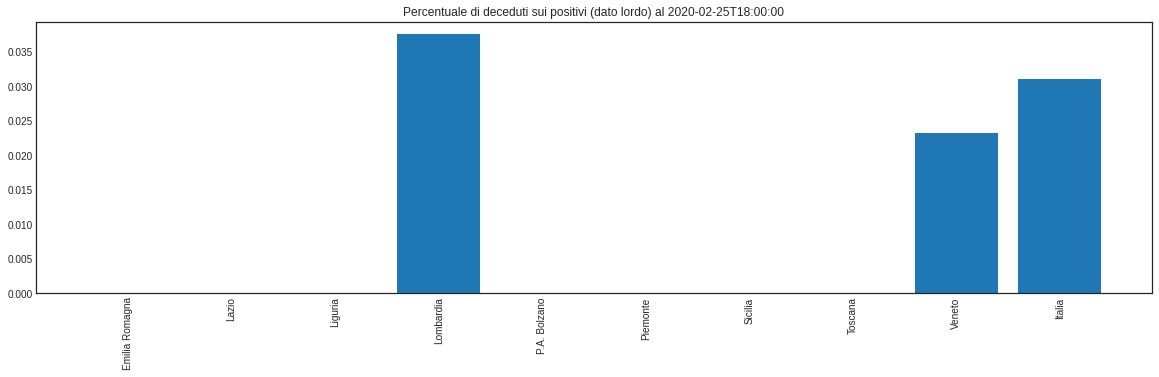

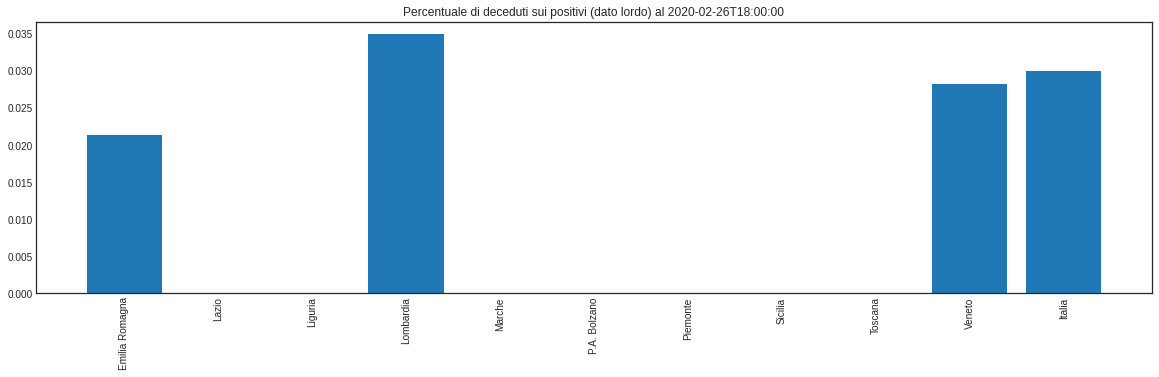

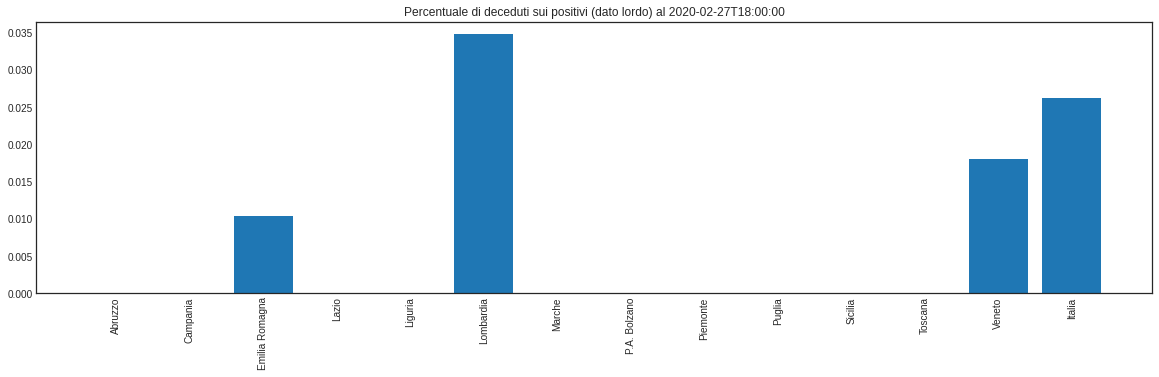

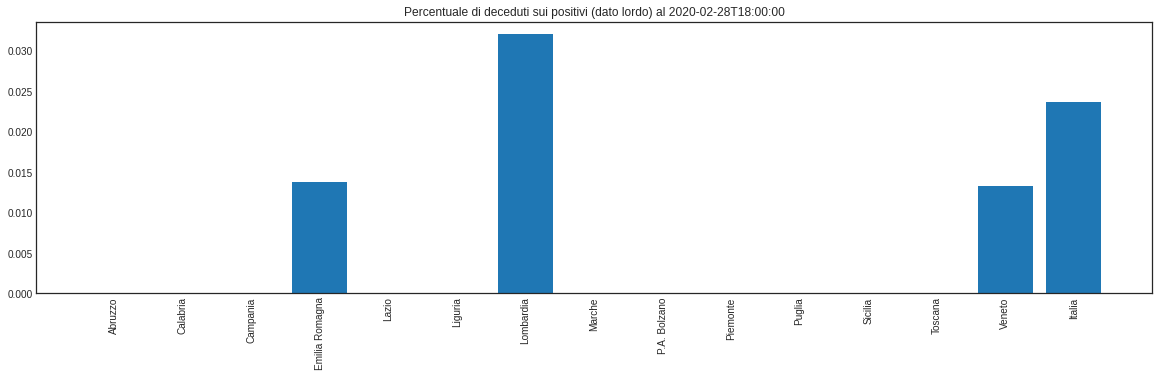

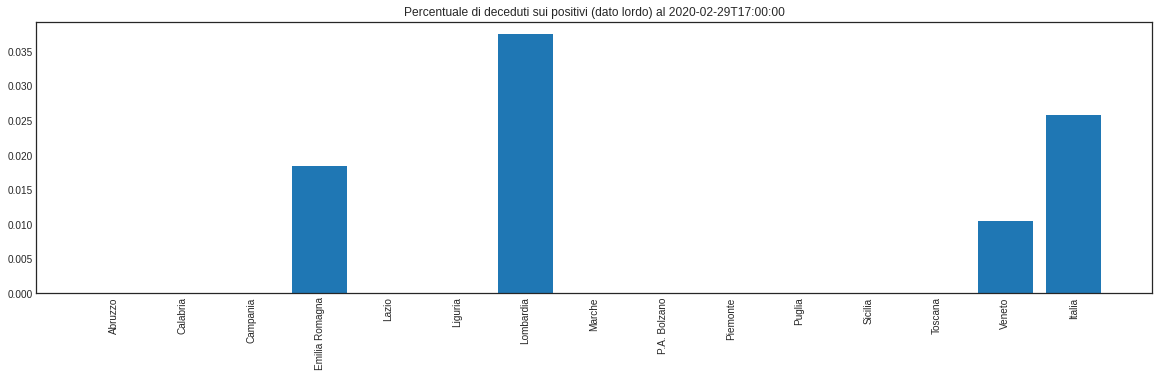

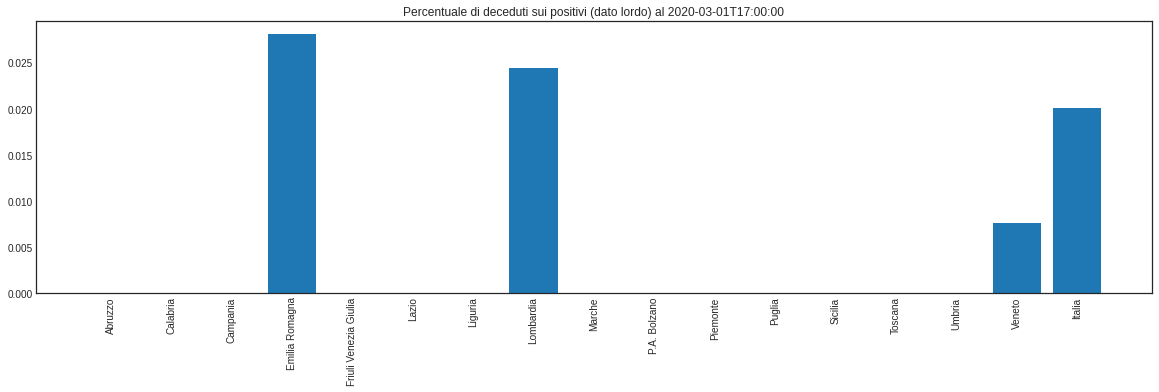

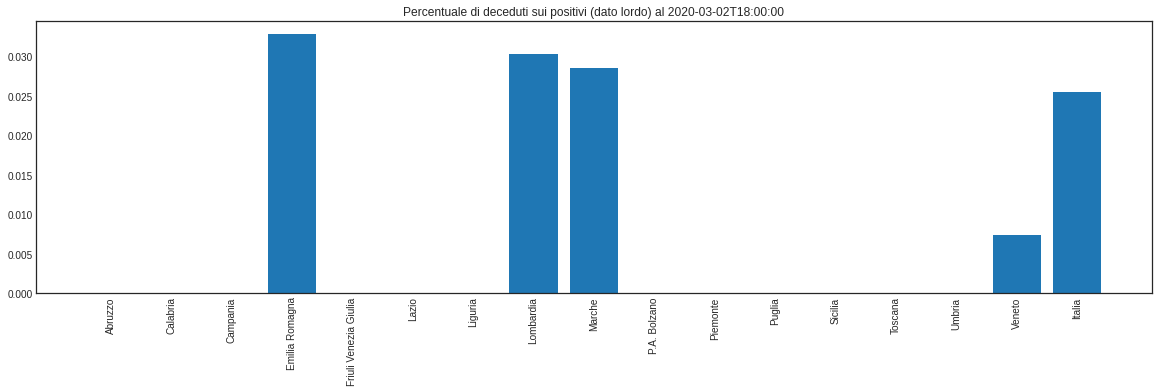

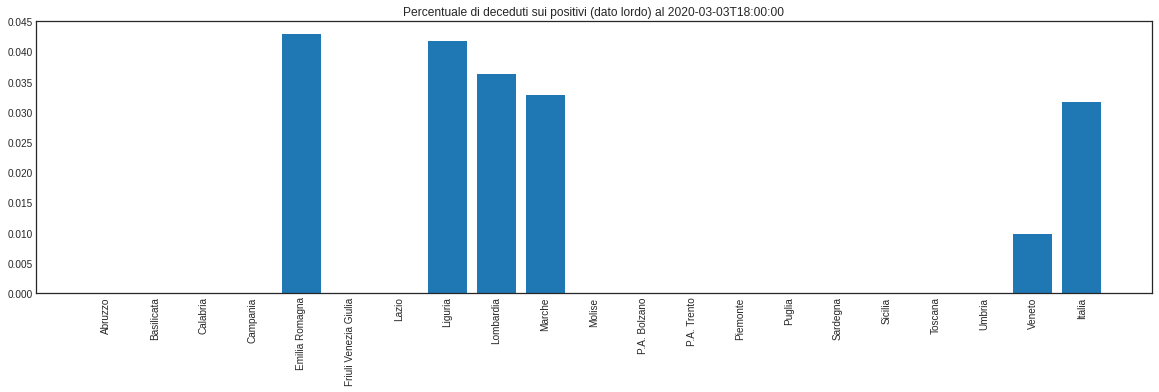

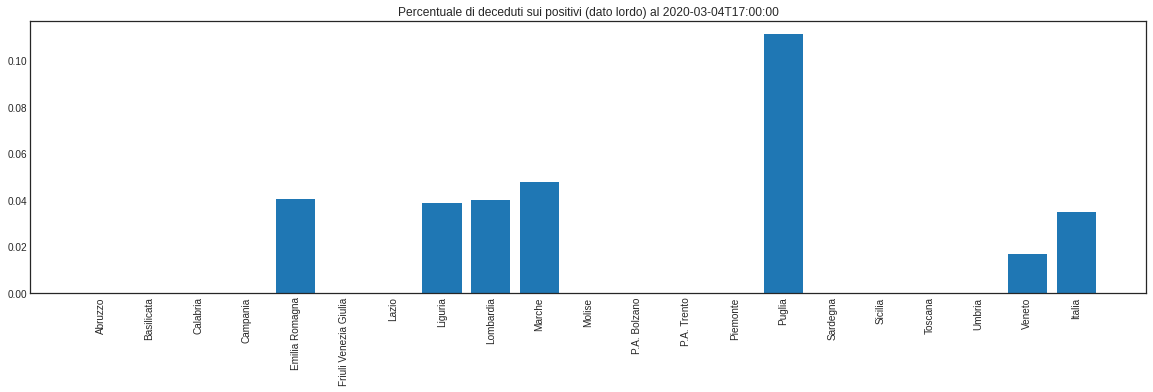

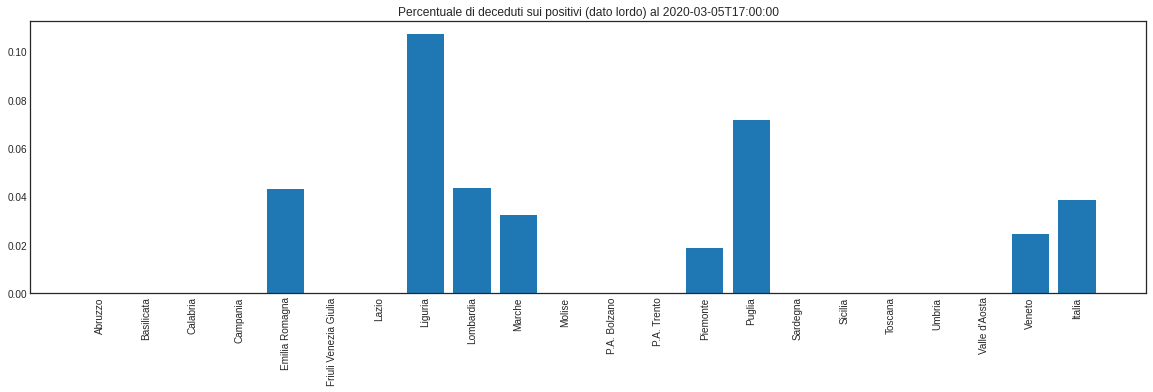

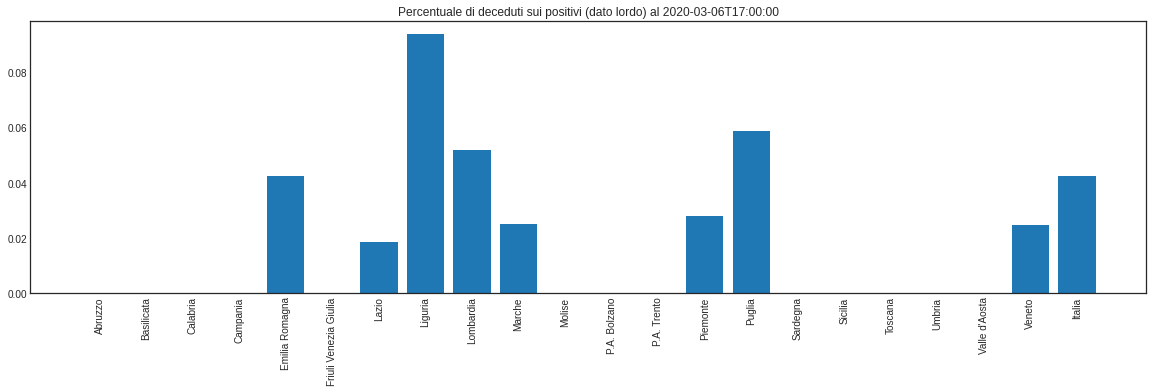

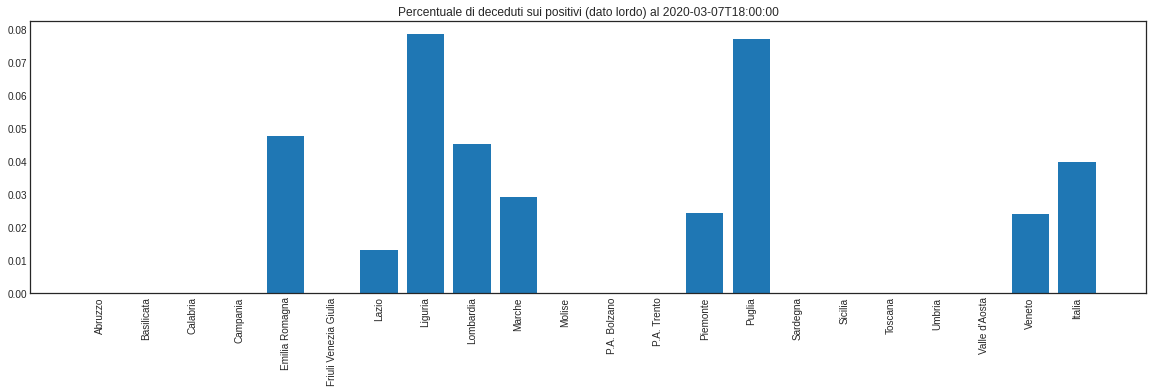

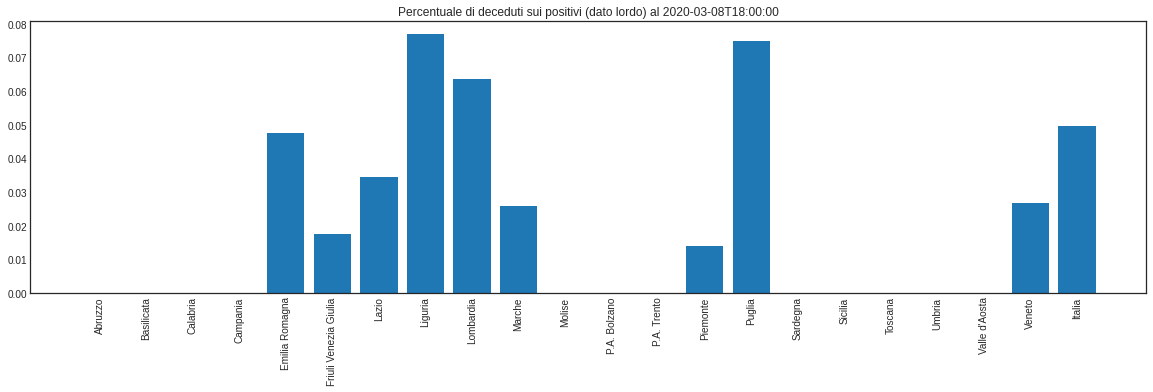

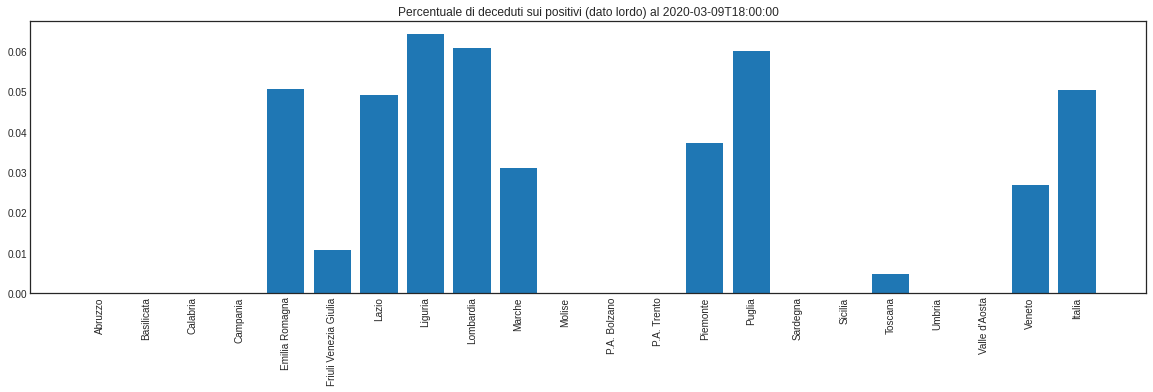

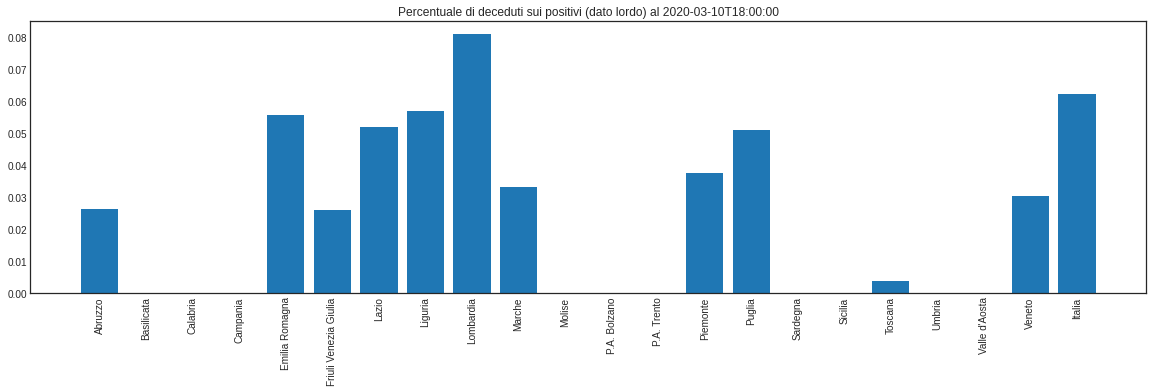

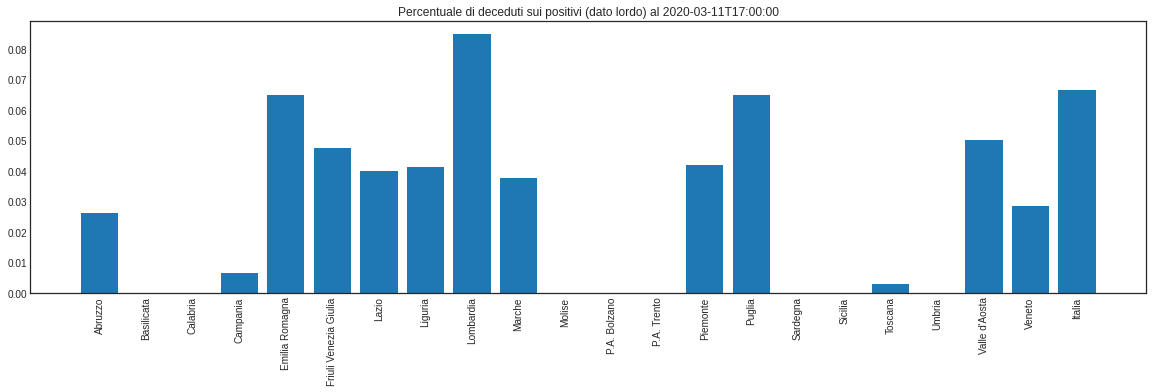

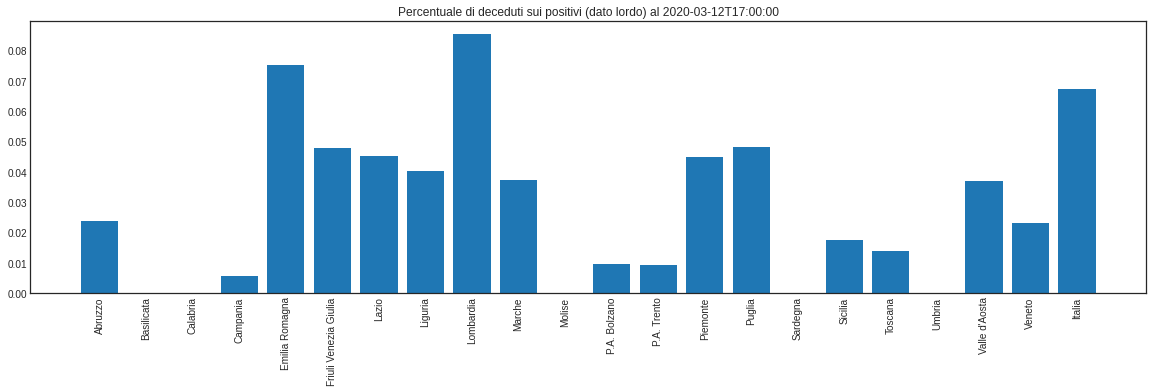

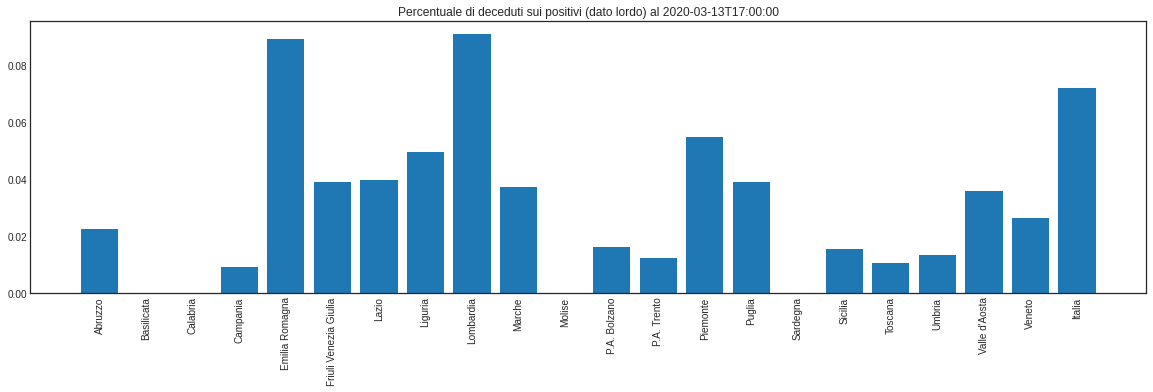

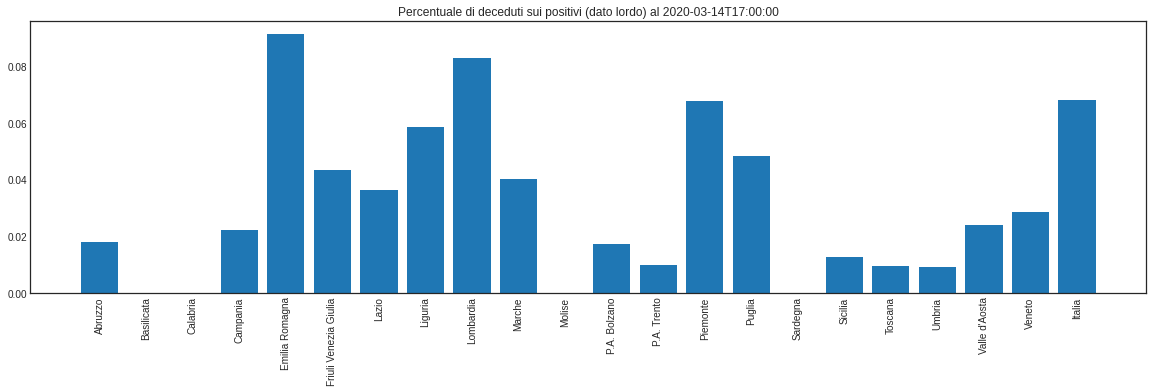

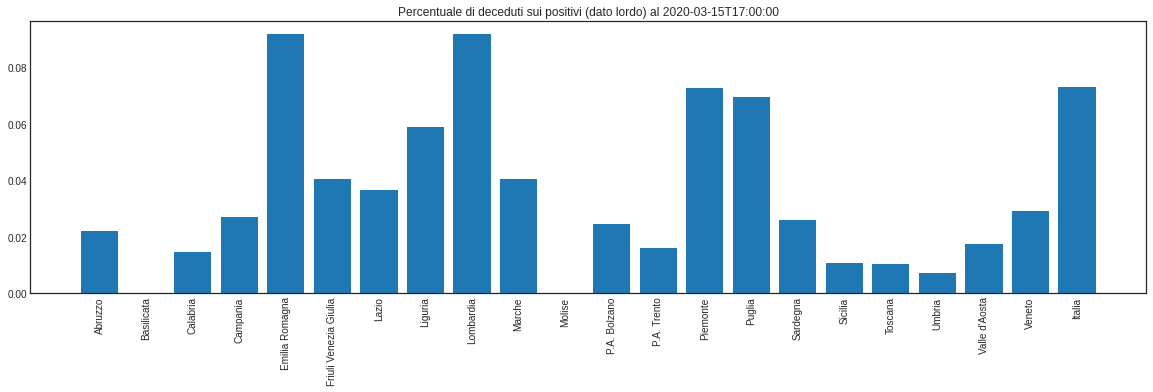

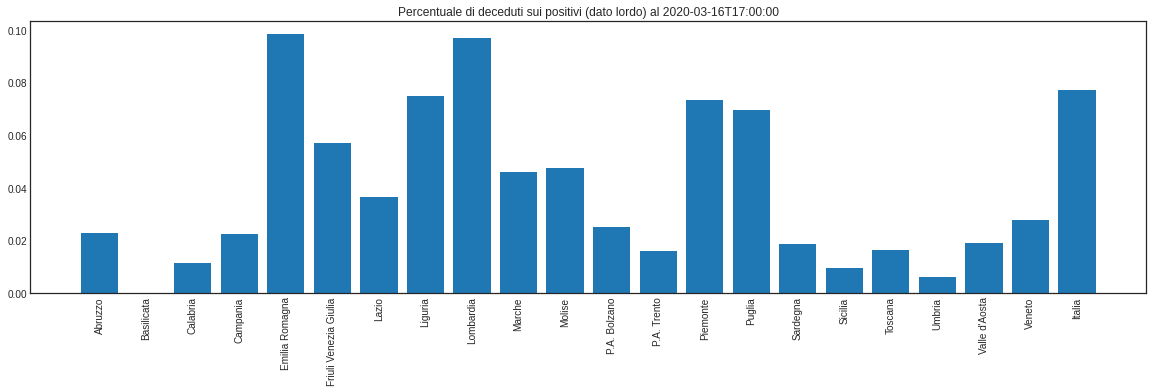

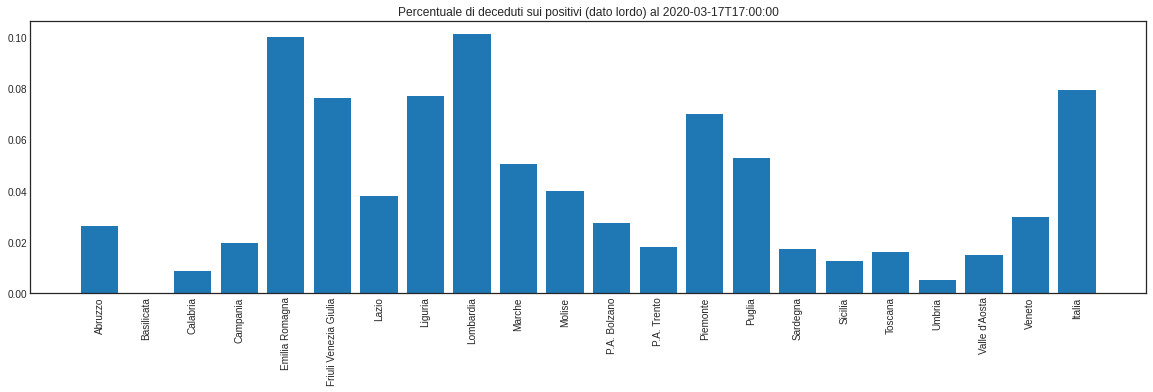

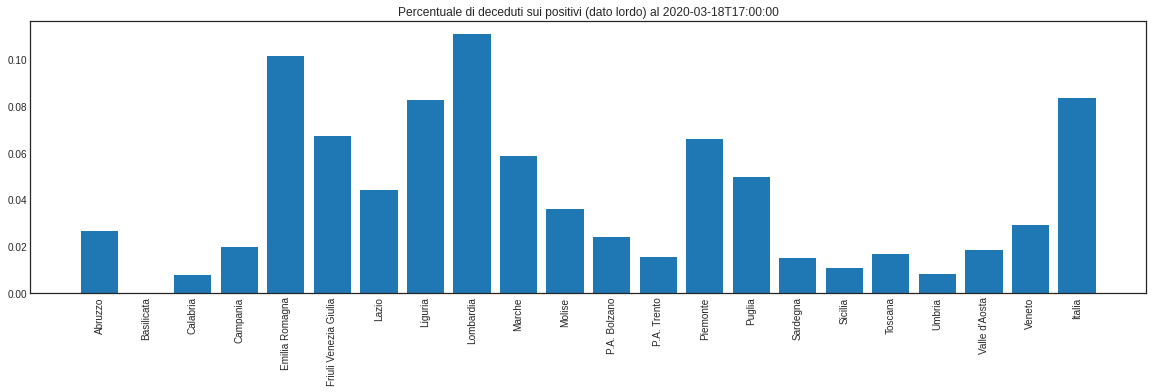

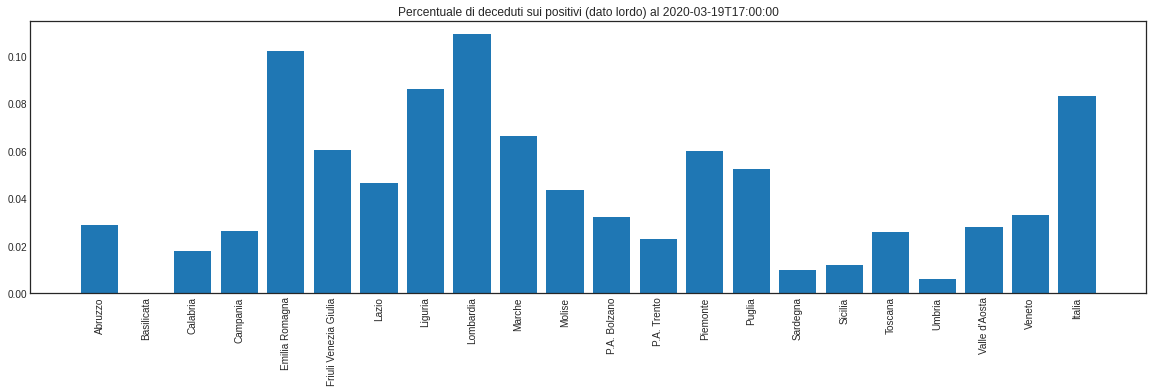

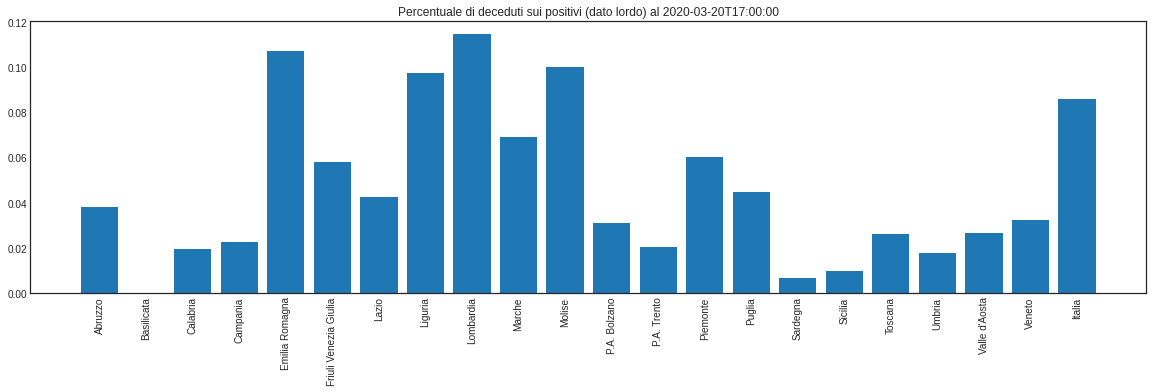

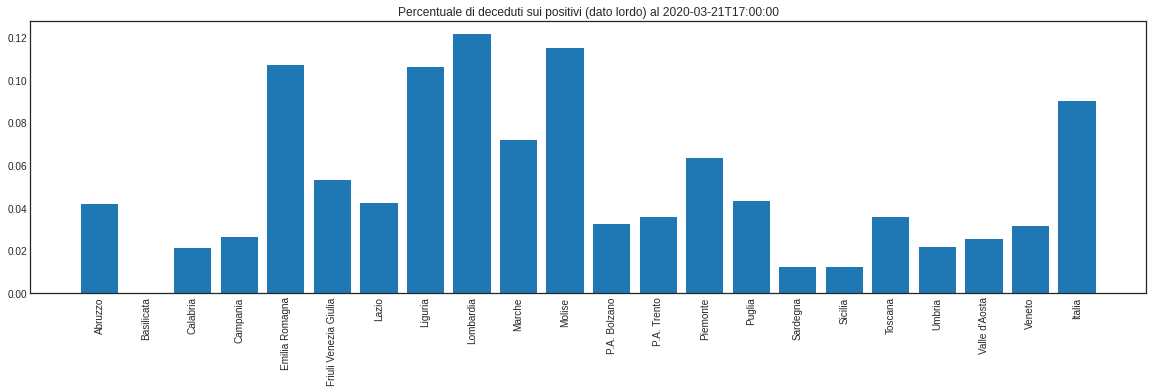

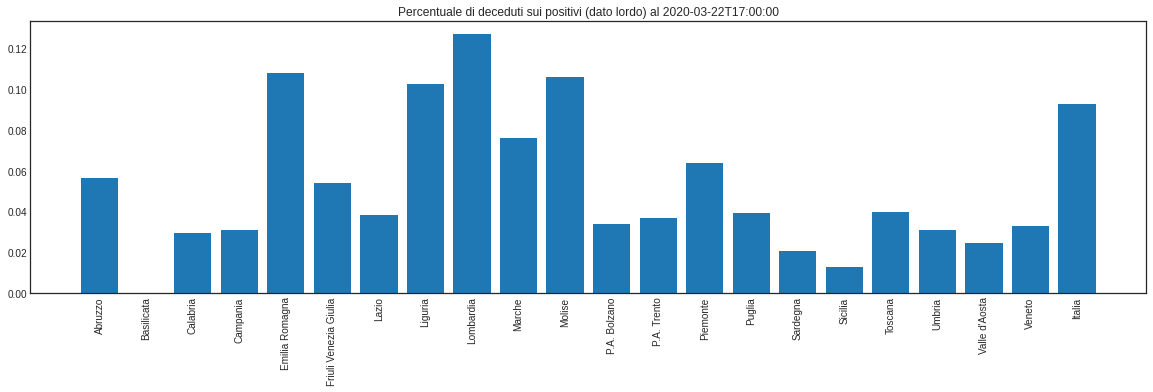

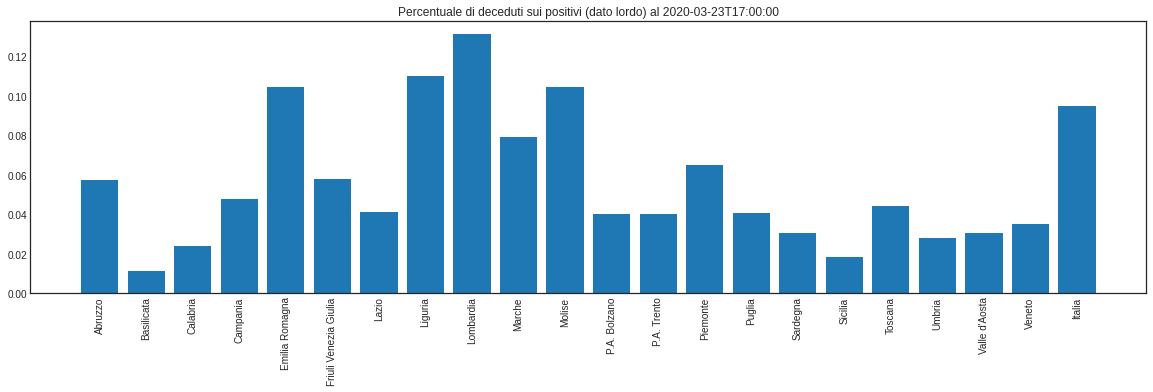

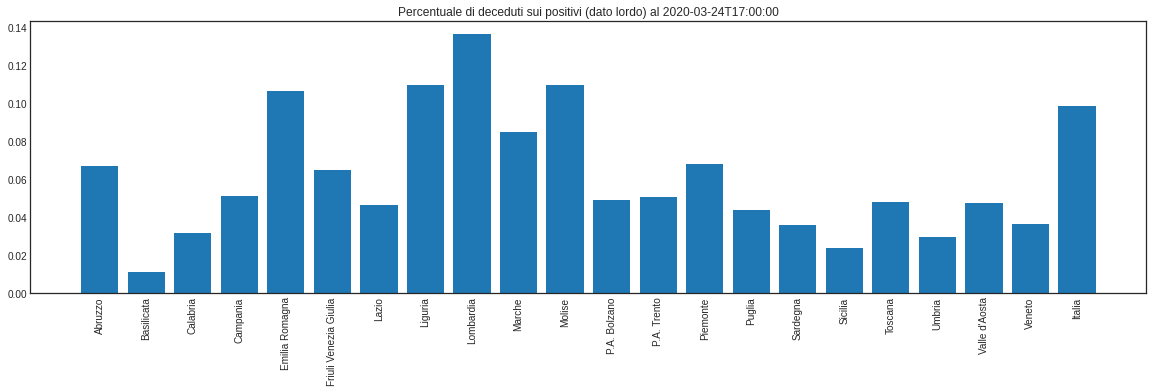

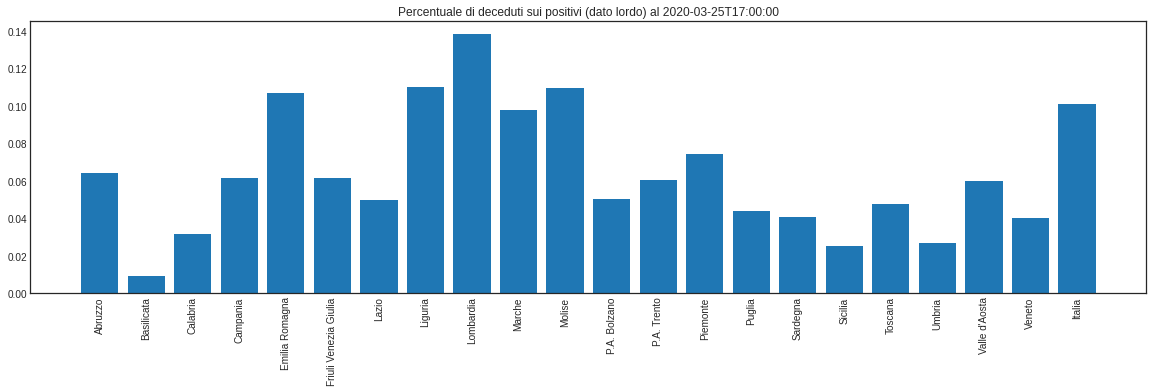

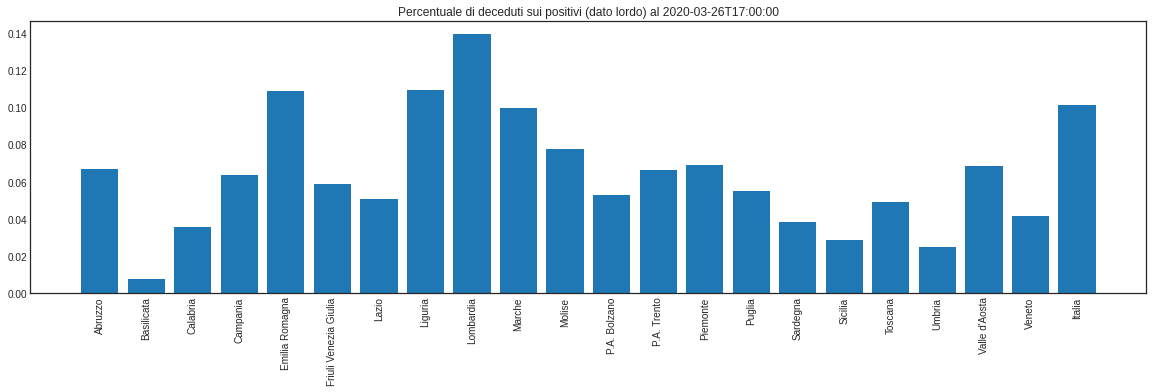

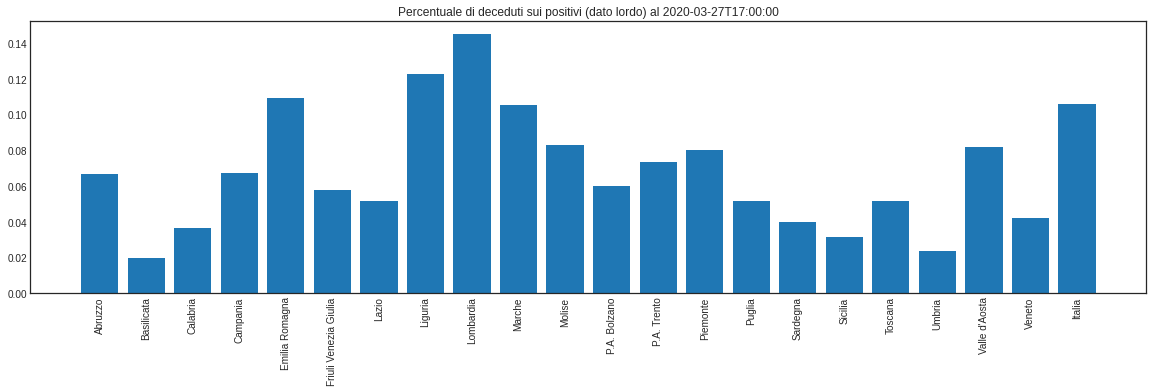

In [92]:
for day in italy_total_positive.index: 
    italy_total_positive_curr_day = italy_total_positive[italy_total_positive.index == day]
    italy_dead_curr_day = italy_dead[italy_dead.index == day]
    italy_dead_vs_total_curr_day = italy_dead_curr_day/italy_total_positive_curr_day
    italy_dead_vs_total_curr_day_stacked = italy_dead_vs_total_curr_day.stack()
    italy_dead_vs_total_curr_day = italy_dead_vs_total_curr_day_stacked.unstack(level=0)
    italy_dead_vs_total_curr_day.columns = ['Dead_percentage']
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_dead_vs_total_curr_day.index, height=italy_dead_vs_total_curr_day.Dead_percentage)
    plt.title('Percentuale di deceduti sui positivi (dato lordo) al ' + day);



Fino all'8/3 il triste primato è della Liguria, tallonata dalla Puglia. Successivamente, come noto, è la Lombardia a soffrire il più alto tasso di deceduti, seguita a poca distanza dalla Liguria, quindi da Emilia Romagna e Marche. 

Ma vediamo di seguito la dinamica del fenomeno nel tempo per ogni regione

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


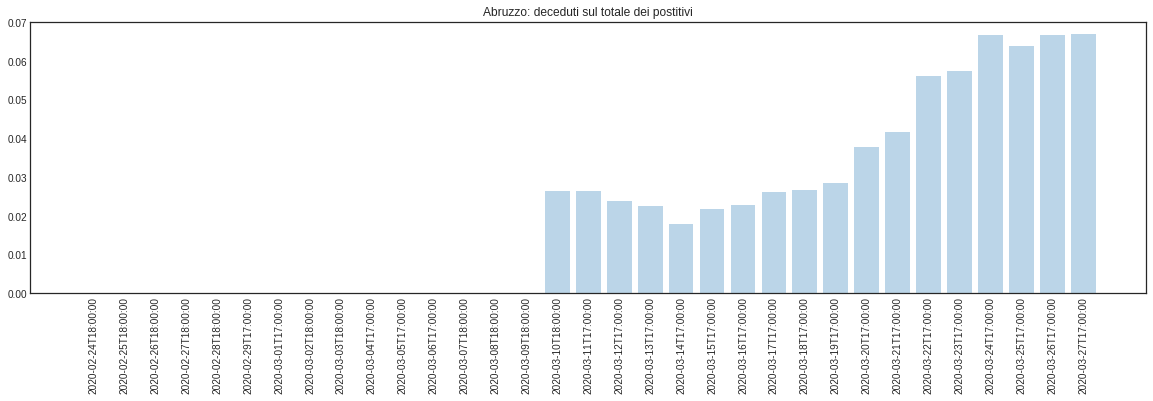

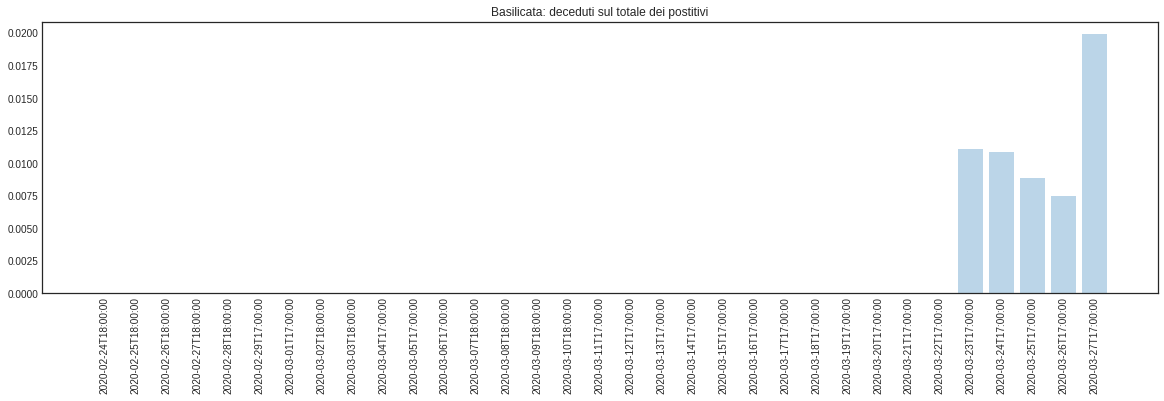

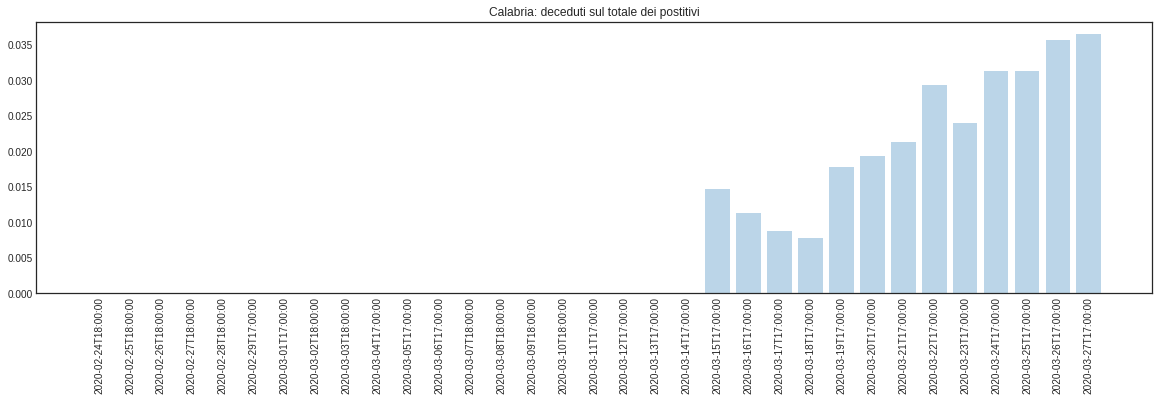

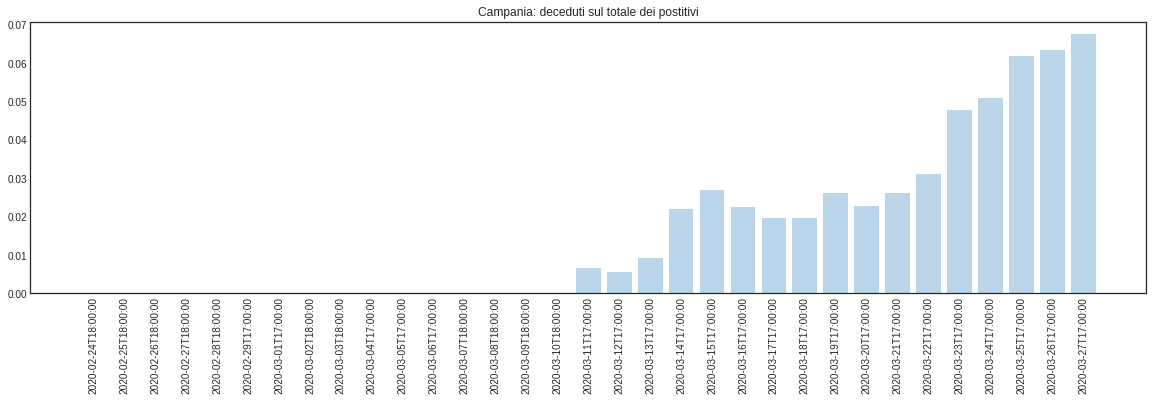

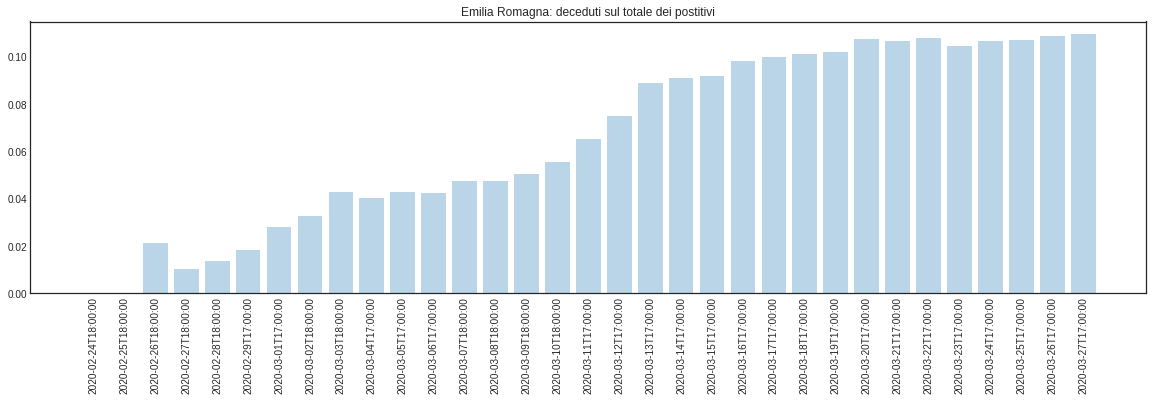

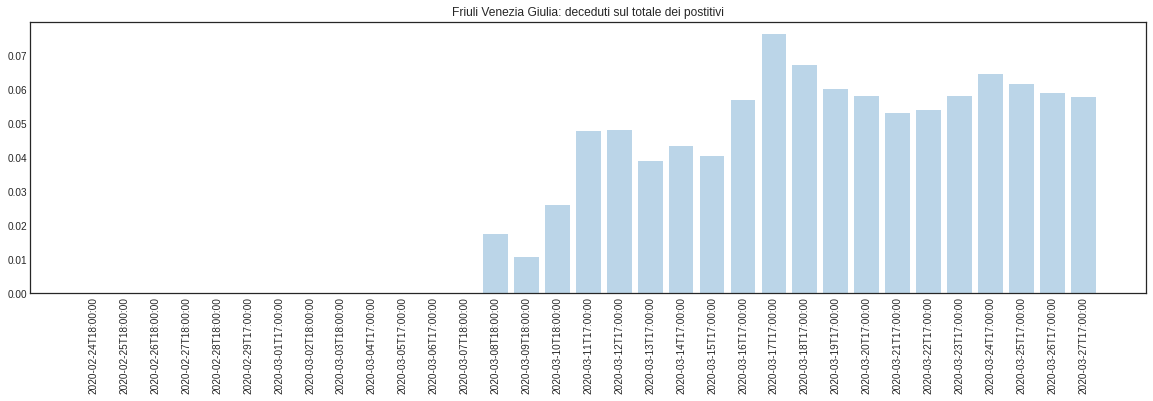

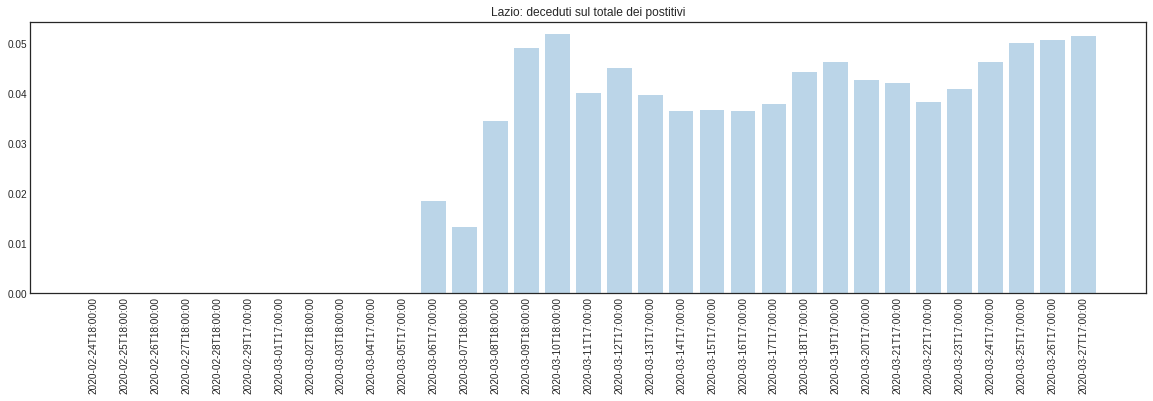

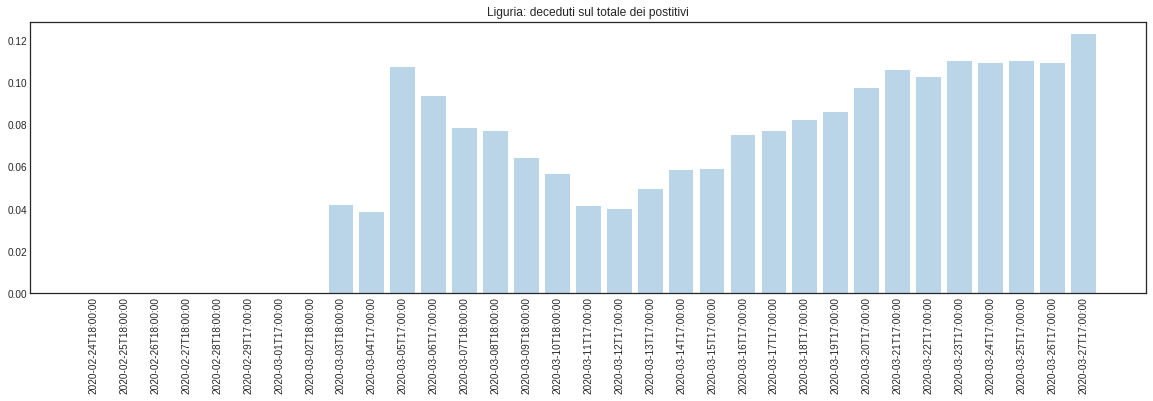

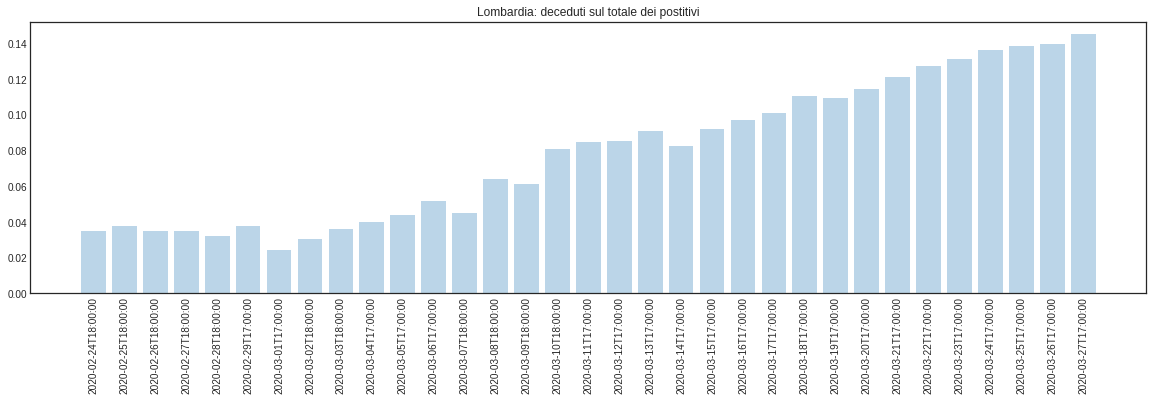

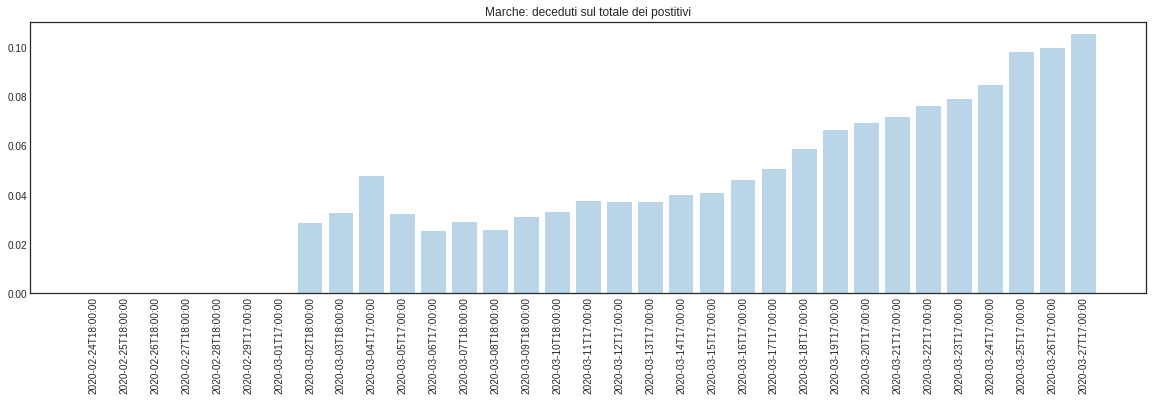

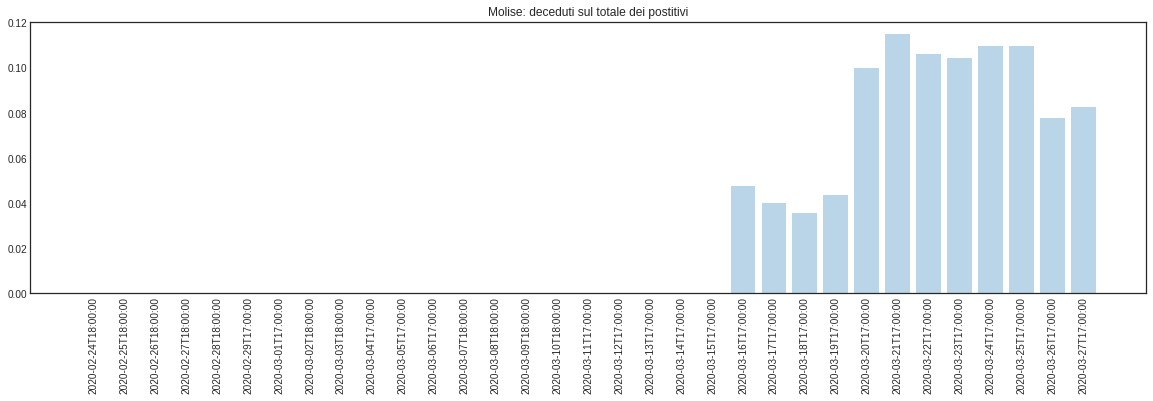

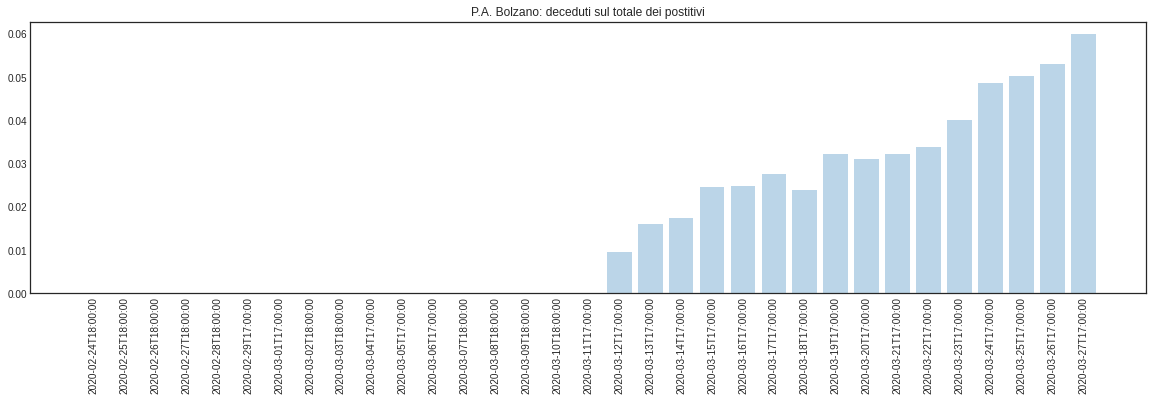

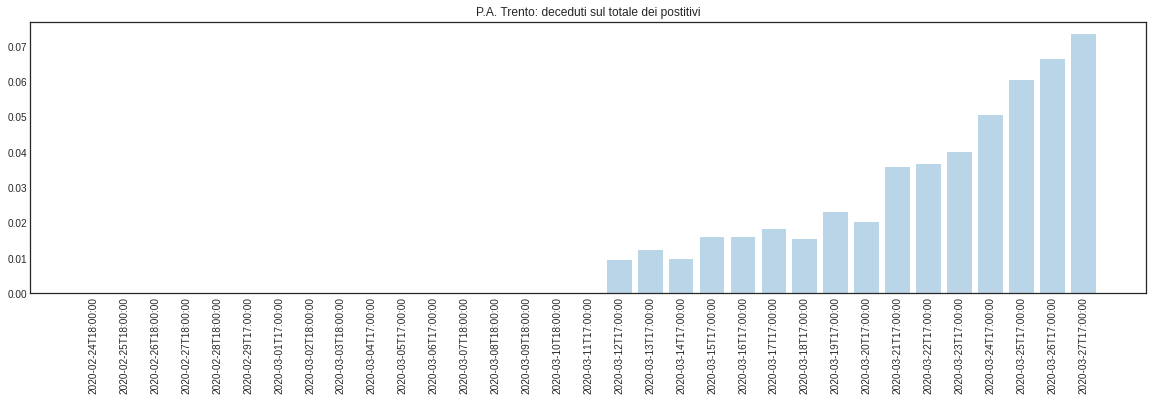

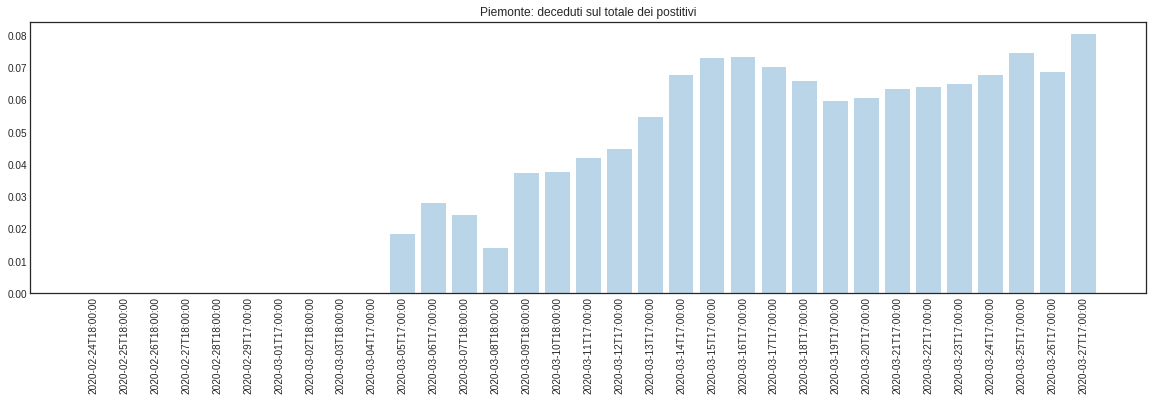

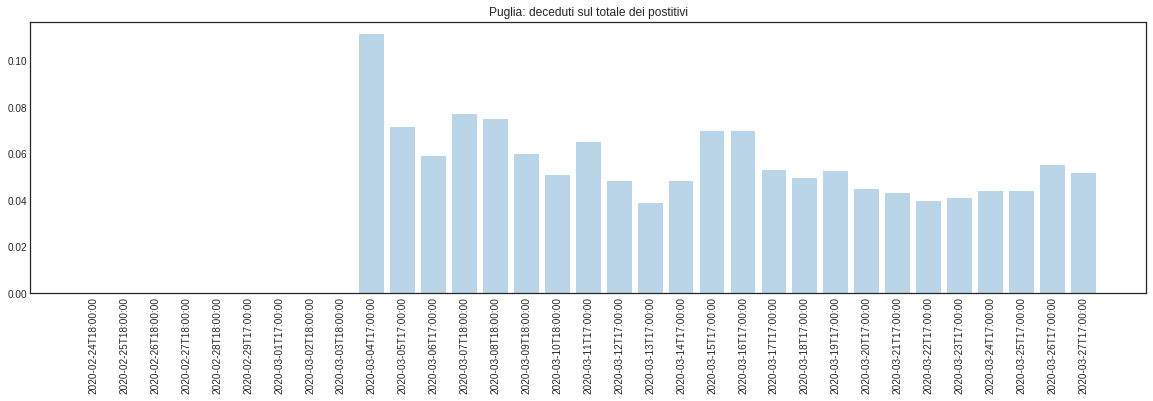

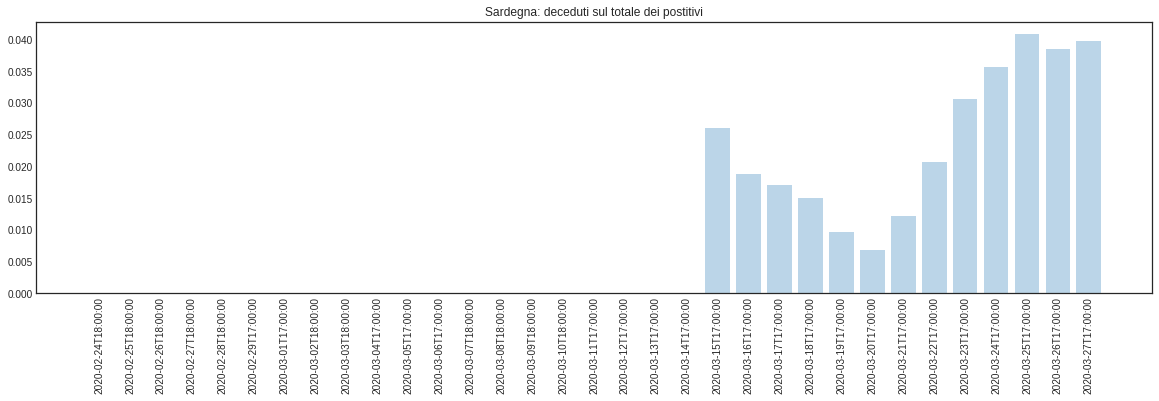

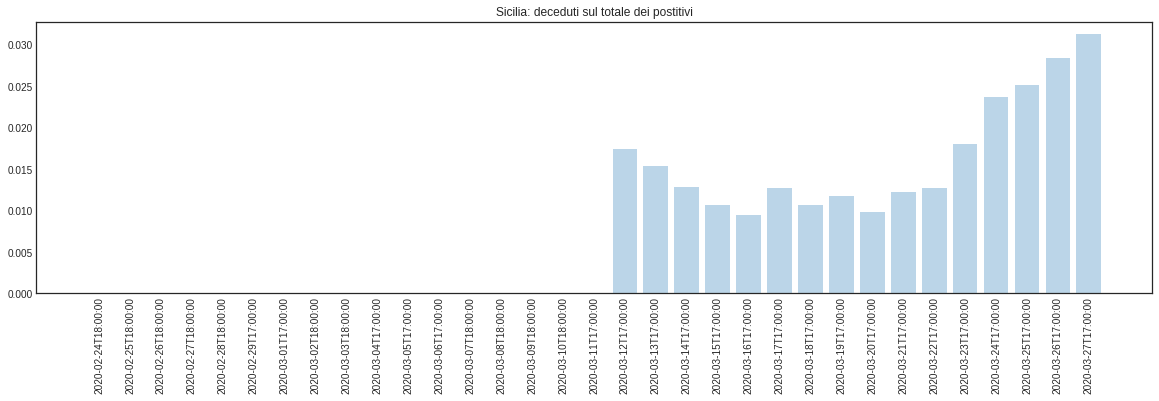

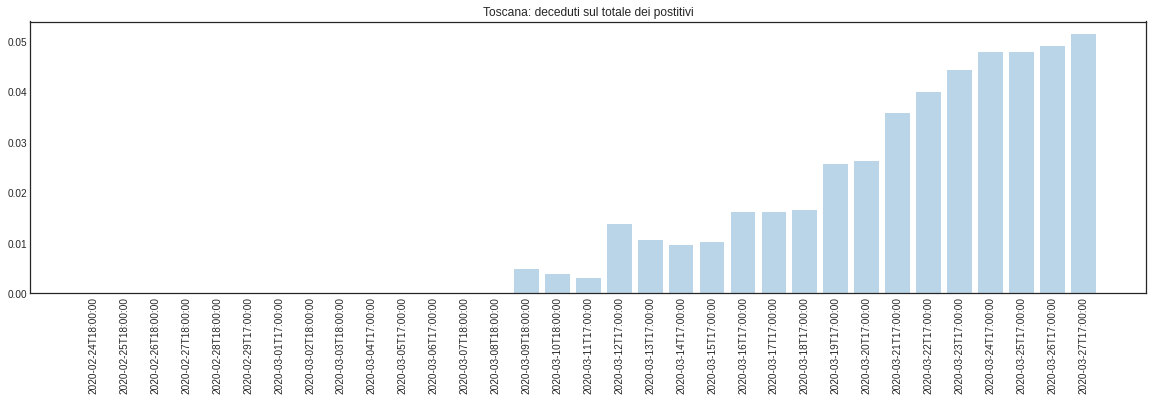

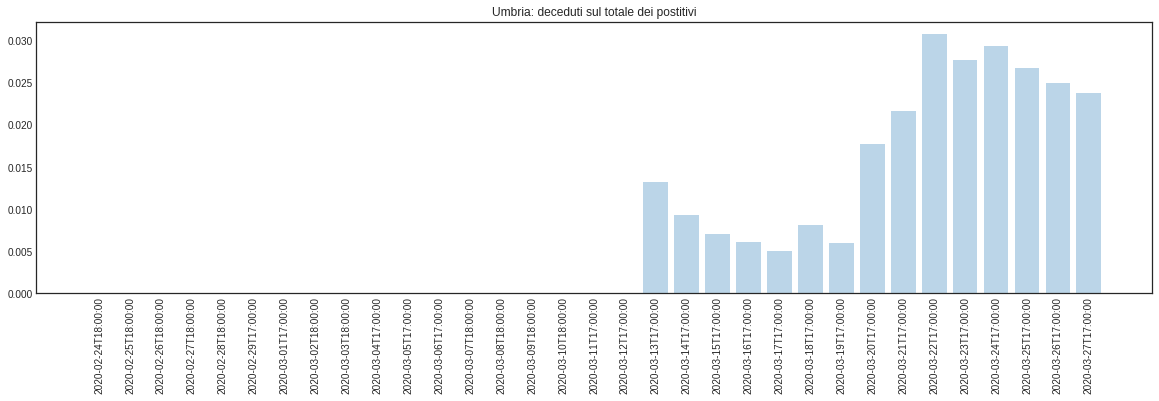

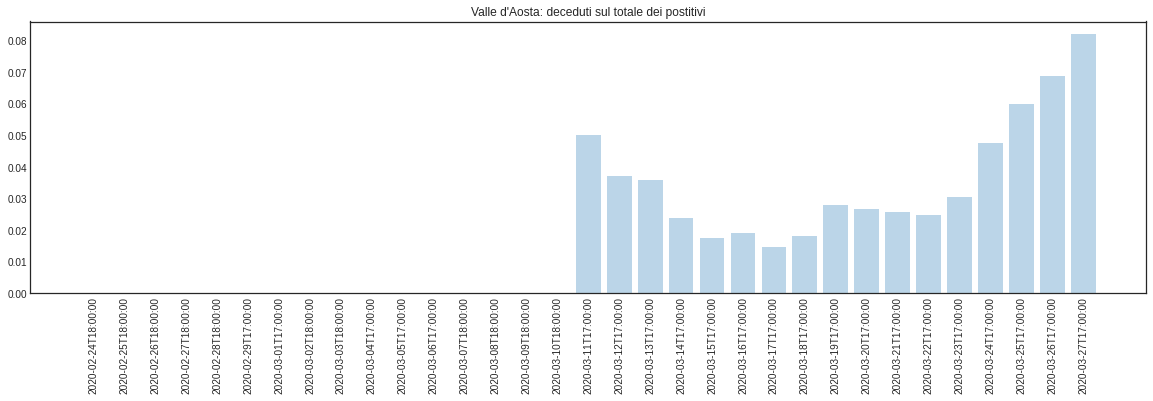

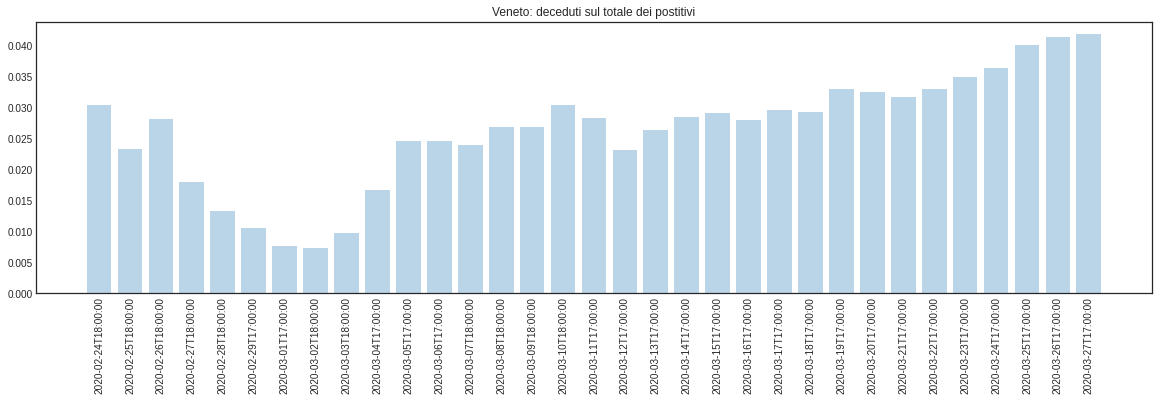

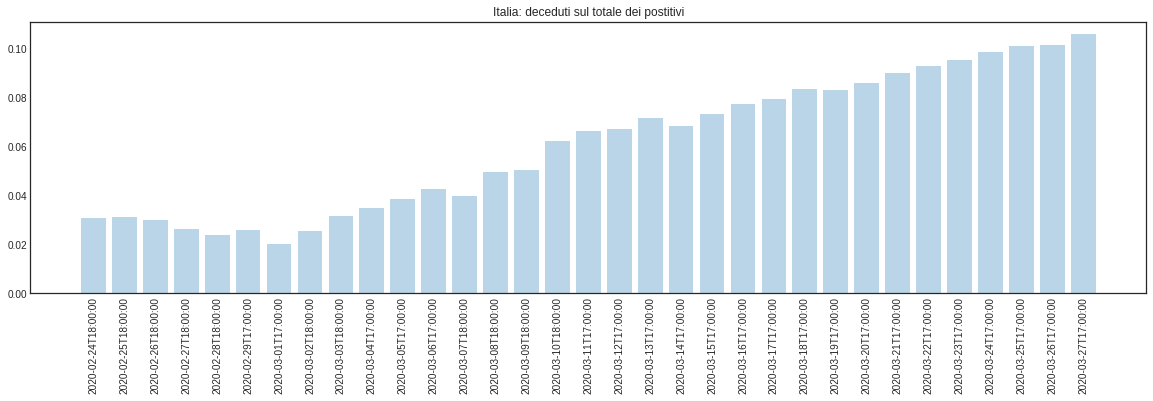

In [93]:
def dead_vs_total(regione):
    fig, ax = plt.subplots(figsize=(20, 5))
    regione_dead_vs_total = italy_dead_vs_total[[regione]]
    regione_dead_vs_total.columns = ['dead_vs_total']
    plt.bar(regione_dead_vs_total.index, height=regione_dead_vs_total.dead_vs_total, label=regione, alpha=0.3)
    plt.title(regione + ': deceduti sul totale dei postitivi')
    plt.xticks(rotation='vertical');


columns = list(italy_dead)
for regione in columns: 
    dead_vs_total(regione)


Il fenomeno è in ascesa in Basilicata, Campania, Liguria, Marche, Piemonte, Trentino Alto Adige, Sicilia e Valle d'Aosta.

Sembra invece stazionario o in via di saturazione nelle altre regioni.

**Adesso si ripropongono più o meno le stesse analisi ma con i dati normalizzati in base alla popolazione**

In [0]:
#source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580}, 
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869}, 
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131}, 
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692}, 
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477}, 
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220}, 
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082}, 
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640}, 
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574}, 
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271}, 
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617}, 
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406}, 
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053}, 
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591}, 
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891}, 
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641}, 
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015}, 
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666}, 
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}, 
            ]) 


Cerchiamo di capire se c'è una correlazione tra densità abitativa e numero di contagiati totale in base all'ultima rilevazione

In [95]:
last_day = covid['date'].max()
italy_total_positive_last_day = italy_total_positive[italy_total_positive.index == last_day]
italy_total_positive_last_day_flat = italy_total_positive_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_last_day_flat, population_density)
mergedf

denominazione_regione  positive  density  population
0                 Abruzzo      1017      121     1311580
1              Basilicata       151       56      562869
2                Calabria       494      128     1947131
3                Campania      1454      424     5801692
4          Emilia Romagna     11588      199     4459477
5   Friuli Venezia Giulia      1317      153     1215220
6                   Lazio      2295      341     5879082
7                 Liguria      2696      286     1550640
8               Lombardia     37298      422    10060574
9                  Marche      3196      162     1525271
10                 Molise       109       69      305617
11           P.A. Bolzano      1003       79      536137
12            P.A. Trento      1391       79      536137
13               Piemonte      7092      172     4356406
14                 Puglia      1334      206     4029053
15               Sardegna       530       68     1639591
16                Sicilia      1250      194     4999891
17                Toscana      3450      162     3729641
18                 Umbria       884      104      882015
19          Valle d'Aosta       452       39      125666
20                 Veneto      7497      267     4905854

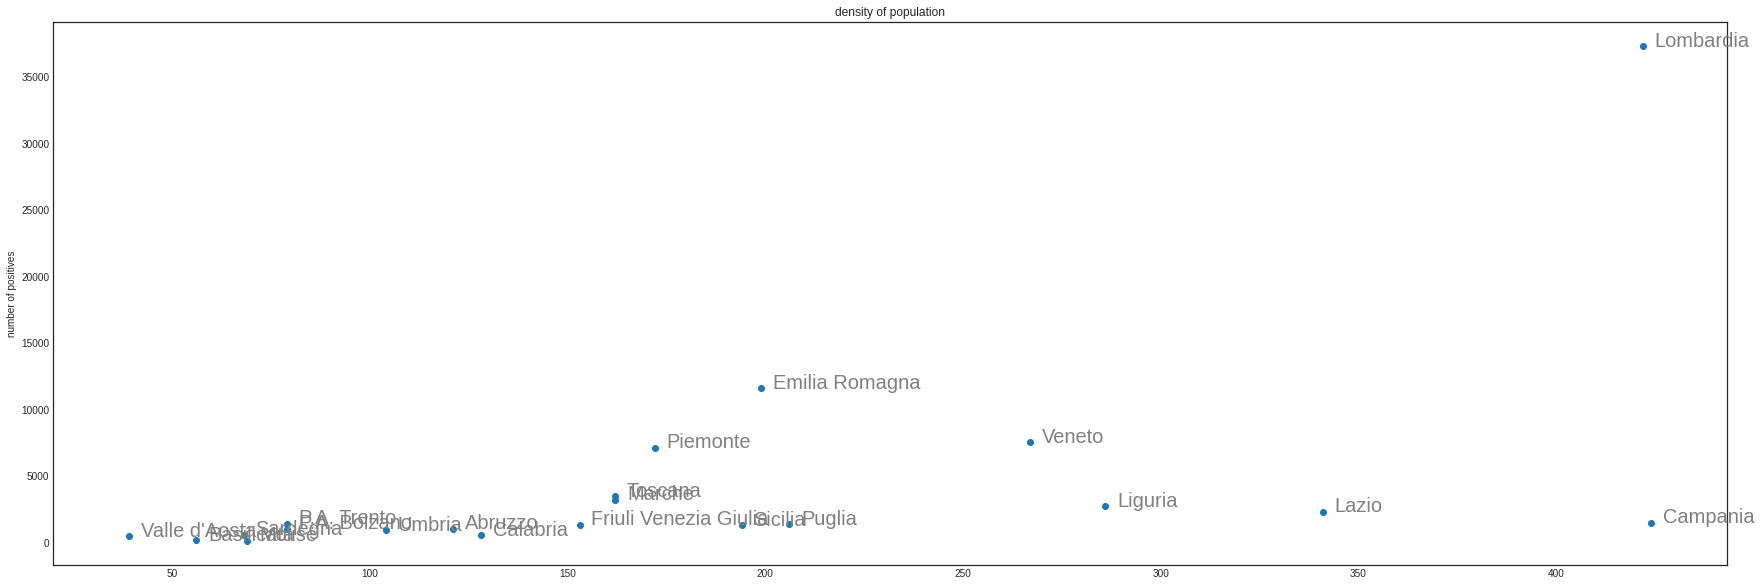

In [96]:
fig, ax = plt.subplots(figsize=(30, 10))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density']+3, mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='number of positives')
plt.show()


Questo plot non fornisce grossi spunti a prima vista. Di sicuro basse densità abitative sembrano essere correlate a basse percentuali di positività. Meno chiaro è ciò che avviene a densità medie ed alte dove si vedono risultati discordanti. Bisogna però tenere conto che in quest'area le regioni a basso numero di positivi sono, a parte la Liguria, regioni del centro-sud dove l'epidemia è arrivata in ritardo rispetto al nord

In [97]:
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')
population_pivot

denominazione_regione  Abruzzo  Basilicata  ...  Valle d'Aosta   Veneto
population             1311580      562869  ...         125666  4905854

[1 rows x 22 columns]

Normalizziamo i dati sul numero di positivi in base alla popolazione di ciascuna regione, ottenendo quindi la percentuale di abitanti positivi di ogni regione

In [98]:
italy_total_positive_normalized = italy_total_positive.copy()
columns = list(italy_total_positive_normalized)
for regione in columns: 
    italy_total_positive_normalized[regione] = italy_total_positive[regione]/population_pivot.loc['population', regione]
italy_total_positive_normalized

denominazione_regione       Abruzzo  Basilicata  ...    Veneto    Italia
date                                             ...                    
2020-02-24T18:00:00    0.000000e+00    0.000000  ...  0.000007  0.000004
2020-02-25T18:00:00    0.000000e+00    0.000000  ...  0.000009  0.000005
2020-02-26T18:00:00    0.000000e+00    0.000000  ...  0.000014  0.000007
2020-02-27T18:00:00    7.624392e-07    0.000000  ...  0.000023  0.000011
2020-02-28T18:00:00    7.624392e-07    0.000000  ...  0.000031  0.000015
2020-02-29T17:00:00    1.524878e-06    0.000000  ...  0.000039  0.000019
2020-03-01T17:00:00    3.812196e-06    0.000000  ...  0.000054  0.000028
2020-03-02T18:00:00    3.812196e-06    0.000000  ...  0.000056  0.000034
2020-03-03T18:00:00    4.574635e-06    0.000002  ...  0.000063  0.000041
2020-03-04T17:00:00    5.337074e-06    0.000002  ...  0.000073  0.000051
2020-03-05T17:00:00    6.099514e-06    0.000002  ...  0.000083  0.000064
2020-03-06T17:00:00    6.861953e-06    0.000005  ...  0.000099  0.000077
2020-03-07T18:00:00    8.386831e-06    0.000005  ...  0.000111  0.000097
2020-03-08T18:00:00    1.296147e-05    0.000007  ...  0.000137  0.000122
2020-03-09T18:00:00    2.287318e-05    0.000009  ...  0.000152  0.000152
2020-03-10T18:00:00    2.897269e-05    0.000012  ...  0.000174  0.000168
2020-03-11T17:00:00    2.897269e-05    0.000014  ...  0.000209  0.000206
2020-03-12T17:00:00    6.404489e-05    0.000014  ...  0.000282  0.000250
2020-03-13T17:00:00    6.785709e-05    0.000018  ...  0.000325  0.000293
2020-03-14T17:00:00    8.539319e-05    0.000018  ...  0.000395  0.000351
2020-03-15T17:00:00    1.044542e-04    0.000020  ...  0.000443  0.000410
2020-03-16T17:00:00    1.341893e-04    0.000021  ...  0.000504  0.000464
2020-03-17T17:00:00    1.745986e-04    0.000036  ...  0.000551  0.000522
2020-03-18T17:00:00    2.005215e-04    0.000048  ...  0.000655  0.000592
2020-03-19T17:00:00    2.935391e-04    0.000066  ...  0.000710  0.000680
2020-03-20T17:00:00    3.423352e-04    0.000092  ...  0.000822  0.000779
2020-03-21T17:00:00    4.033303e-04    0.000117  ...  0.000941  0.000888
2020-03-22T17:00:00    4.475518e-04    0.000144  ...  0.001044  0.000980
2020-03-23T17:00:00    5.054972e-04    0.000160  ...  0.001122  0.001059
2020-03-24T17:00:00    5.253206e-04    0.000163  ...  0.001212  0.001146
2020-03-25T17:00:00    6.198631e-04    0.000201  ...  0.001313  0.001232
2020-03-26T17:00:00    7.212675e-04    0.000238  ...  0.001414  0.001334
2020-03-27T17:00:00    7.754007e-04    0.000268  ...  0.001528  0.001433

[33 rows x 22 columns]

Visualizziamo quindi la percentuale di positivi (dato lordo, quindi comprensivo di deceduti e guariti) di tutte le regioni, giorno per giorno

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


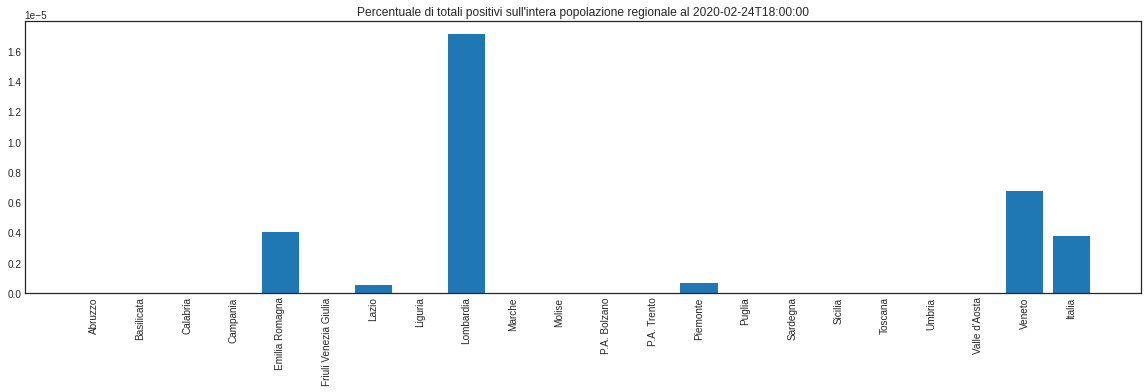

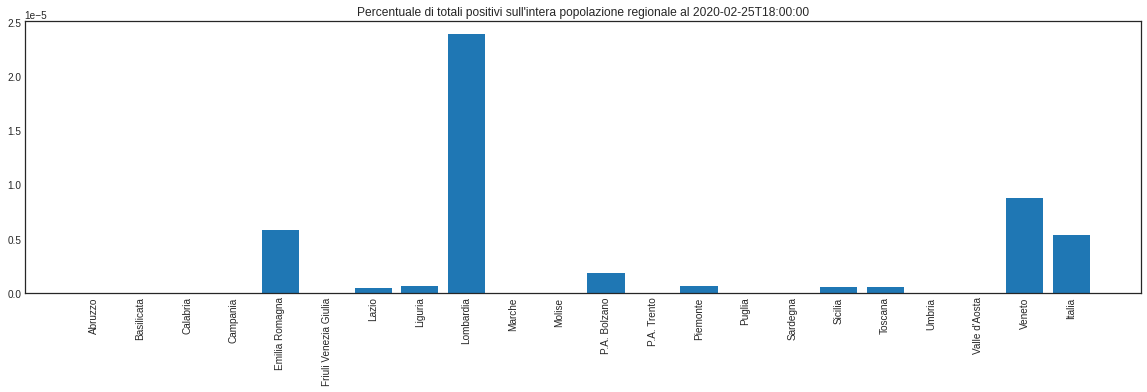

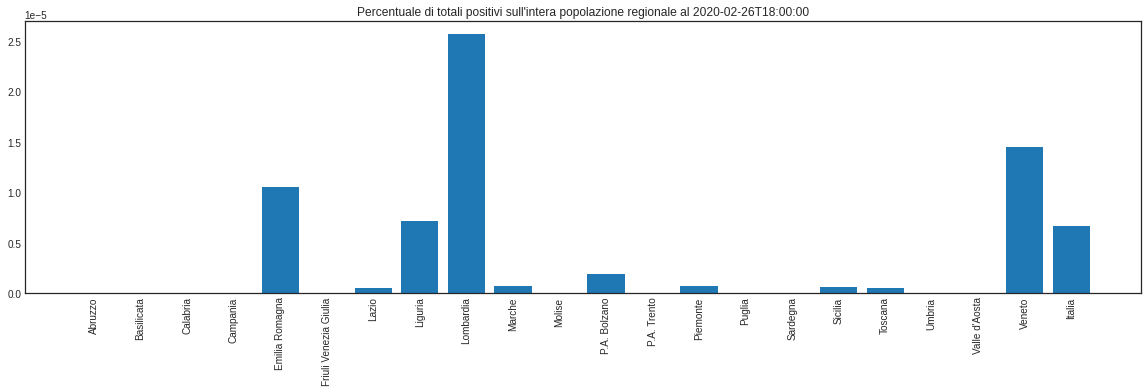

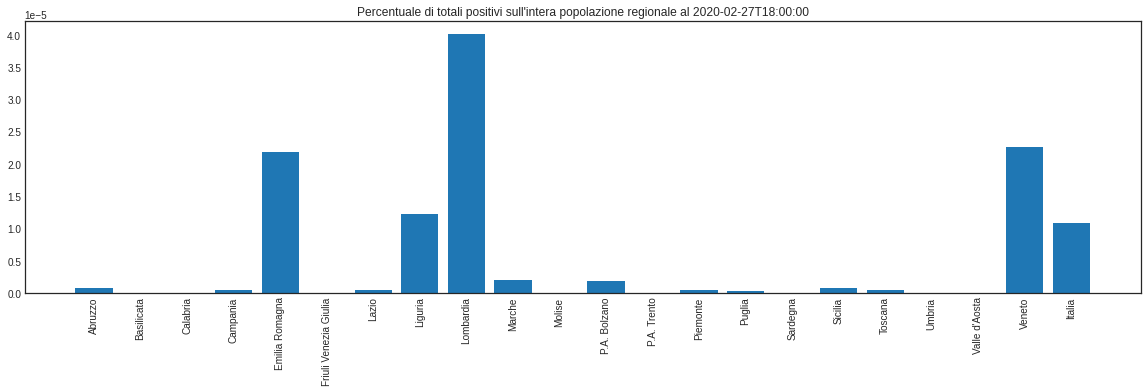

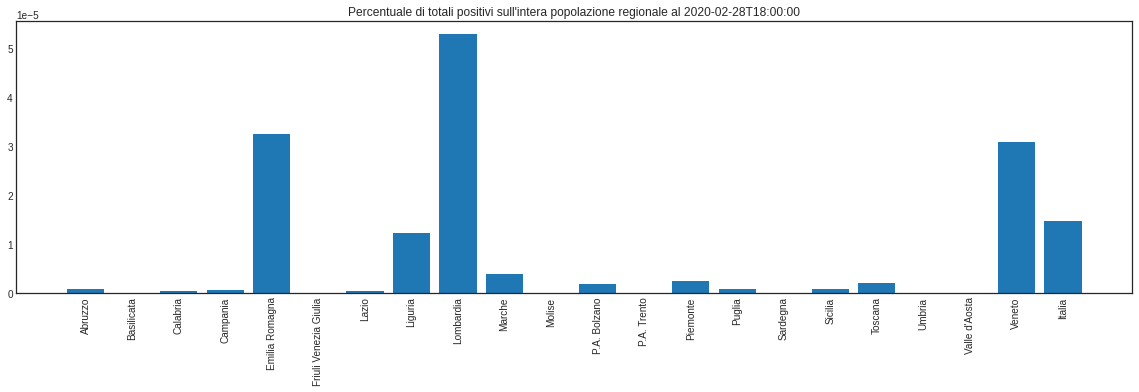

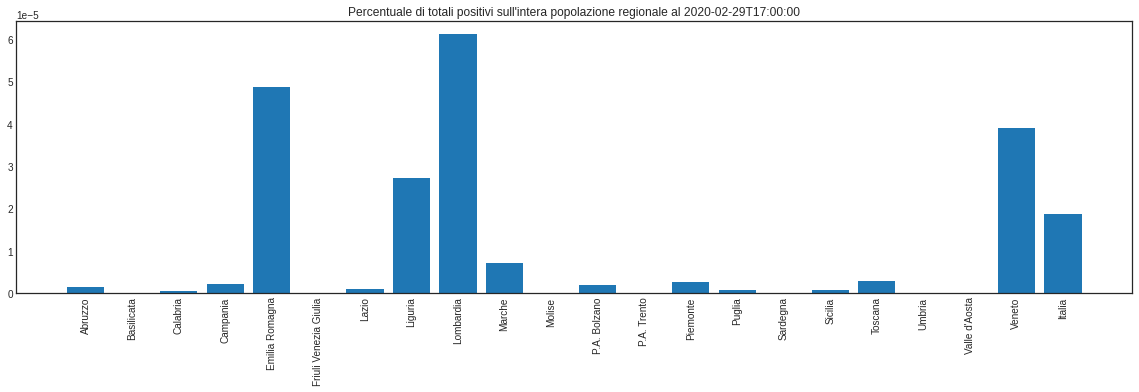

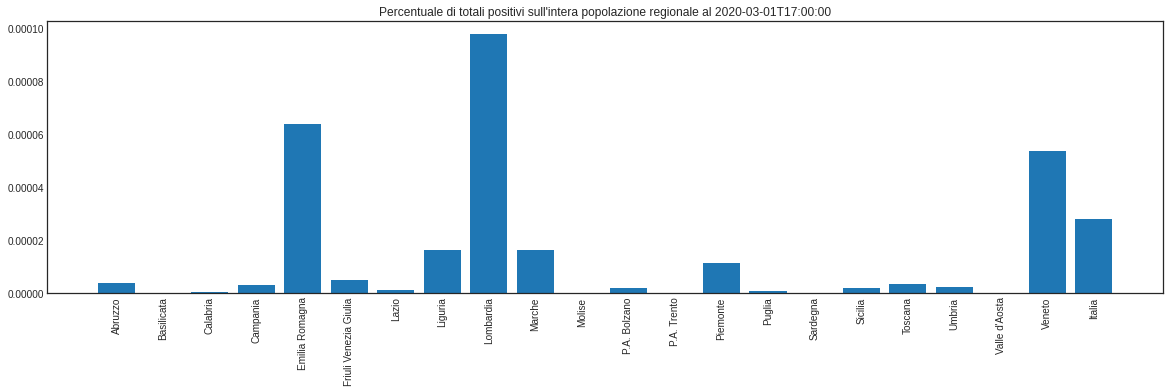

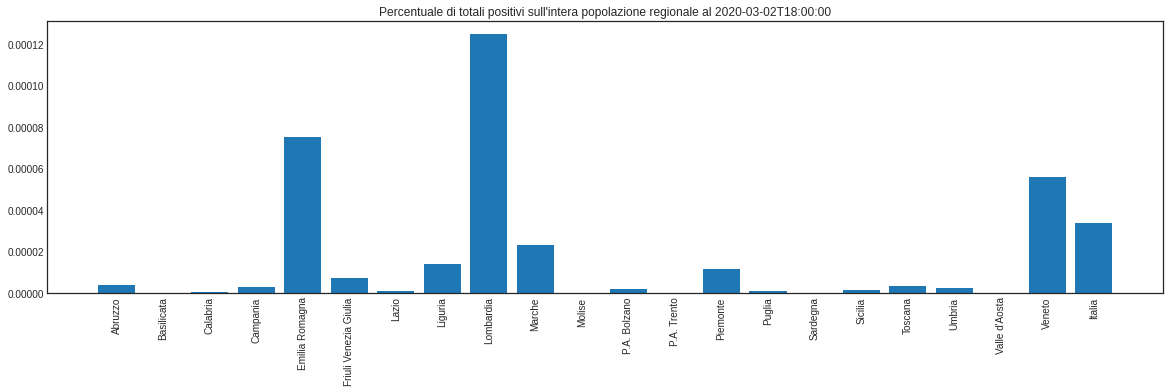

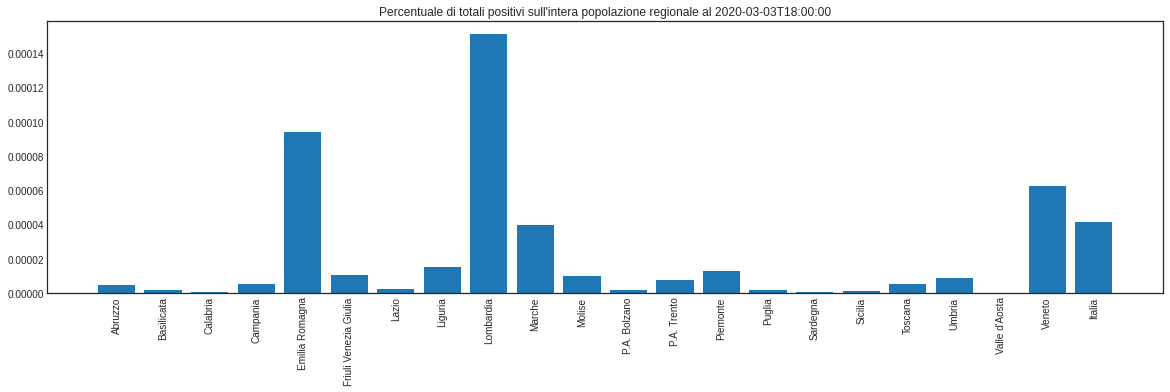

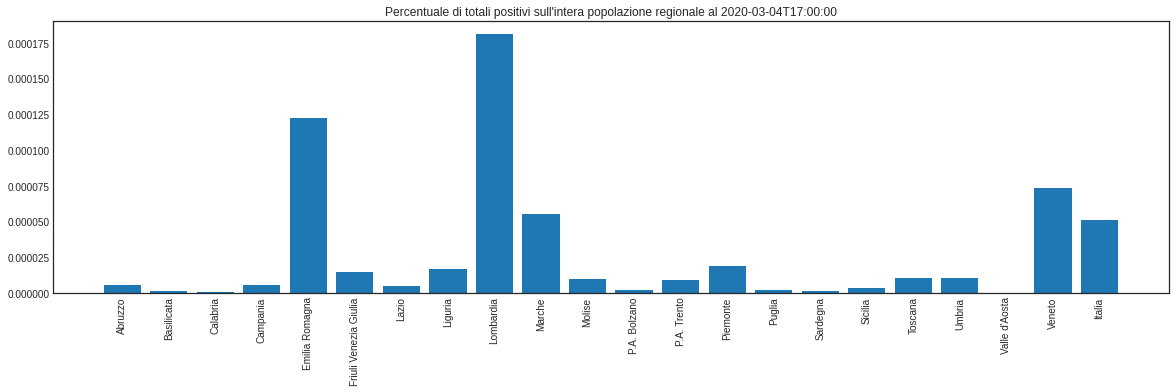

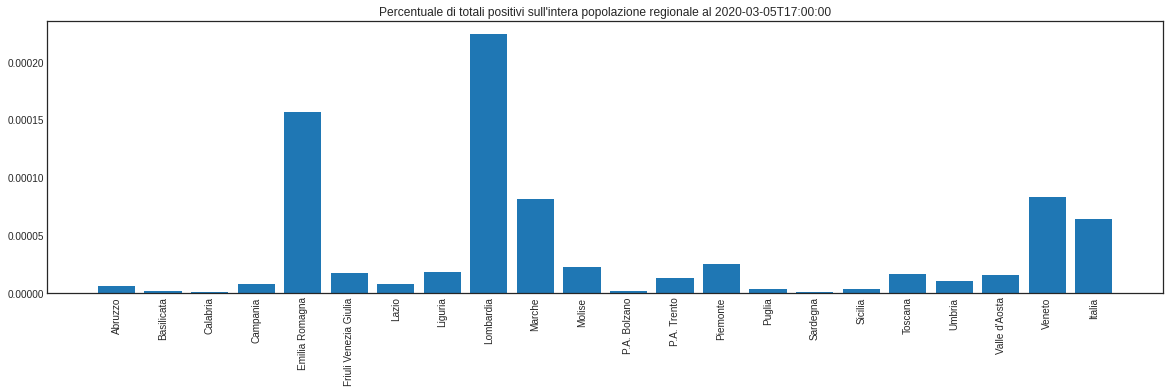

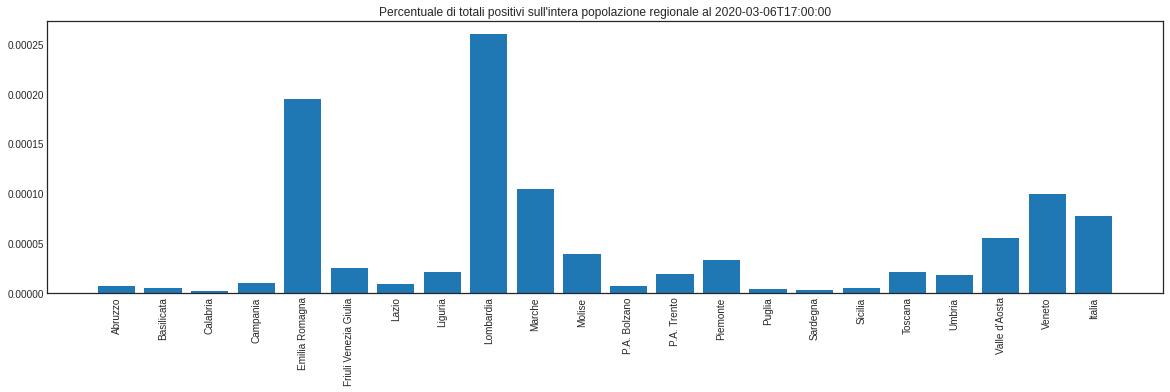

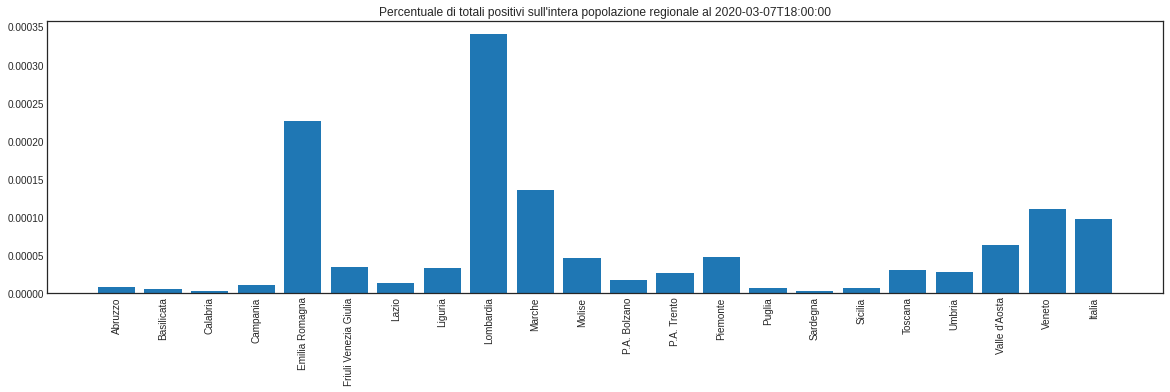

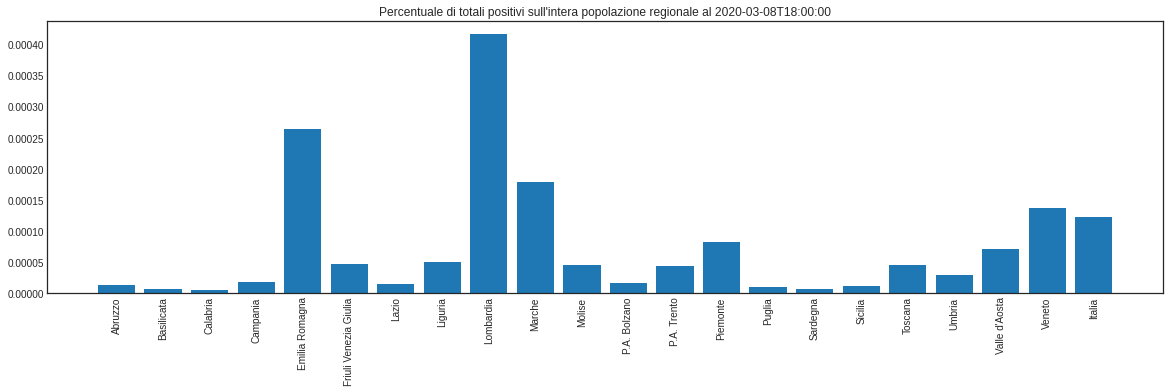

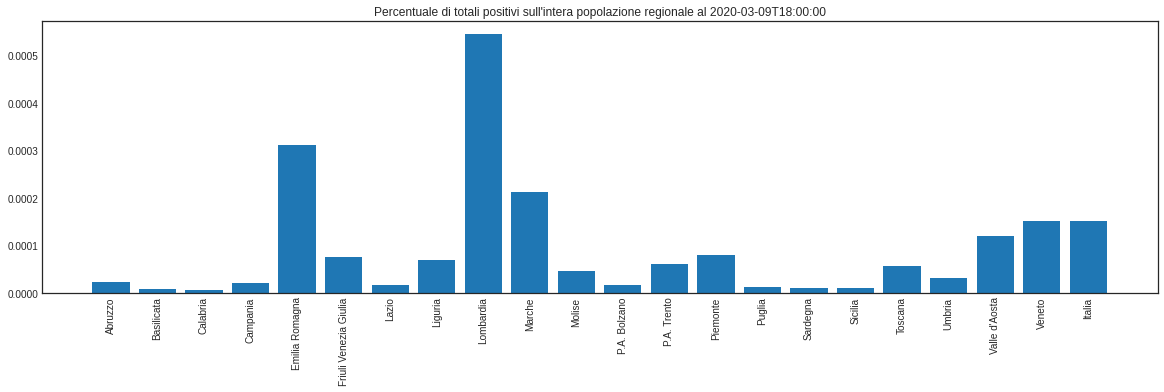

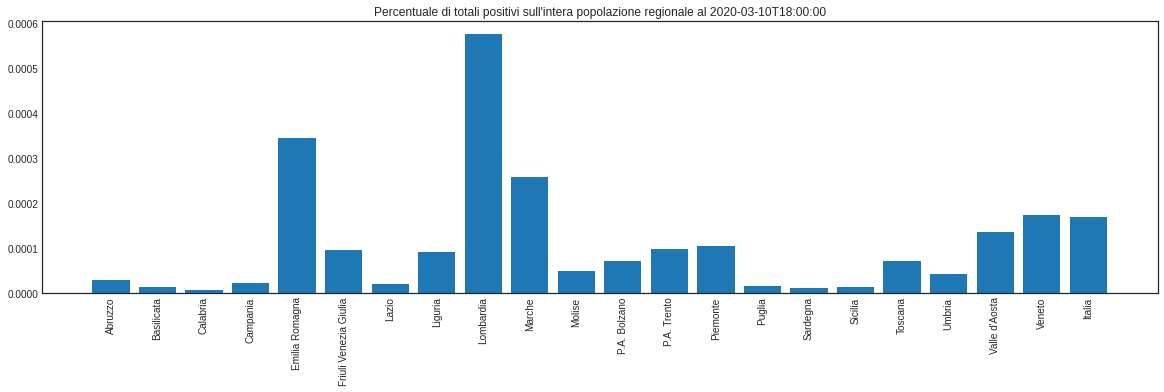

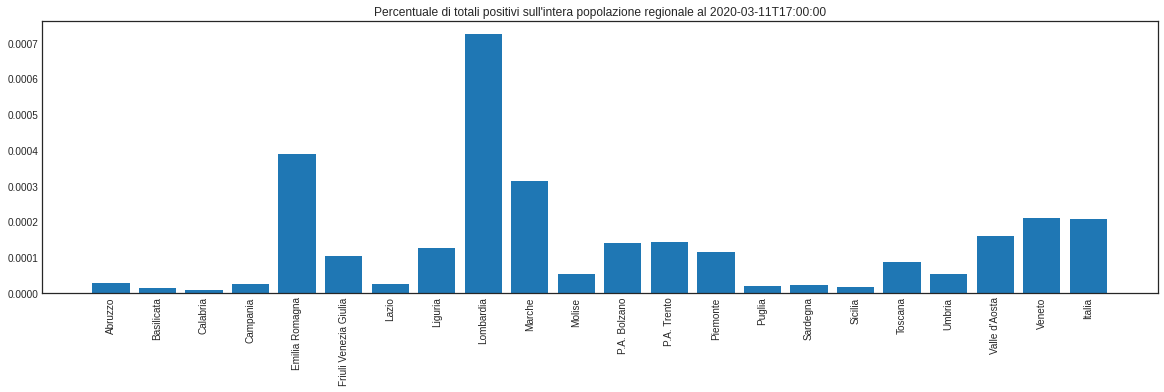

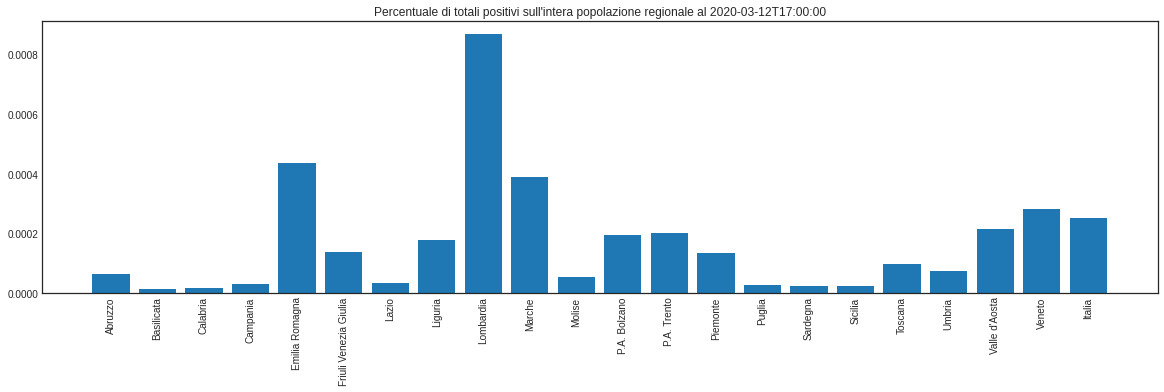

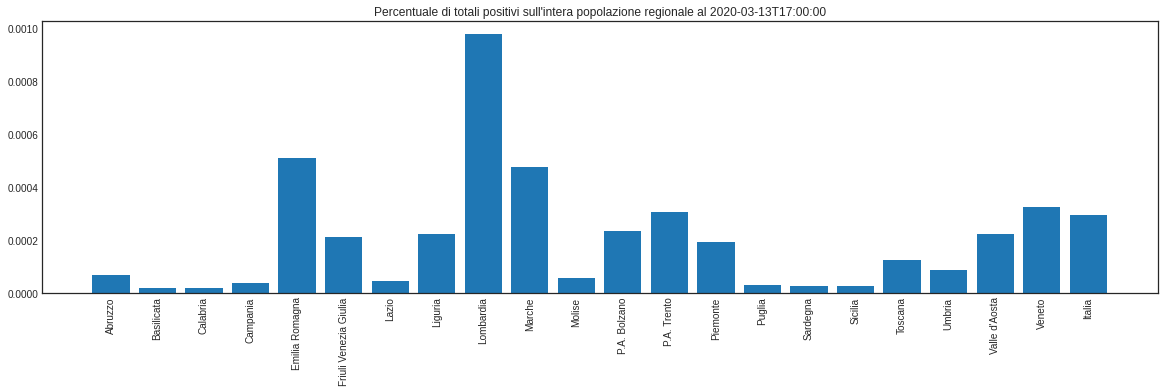

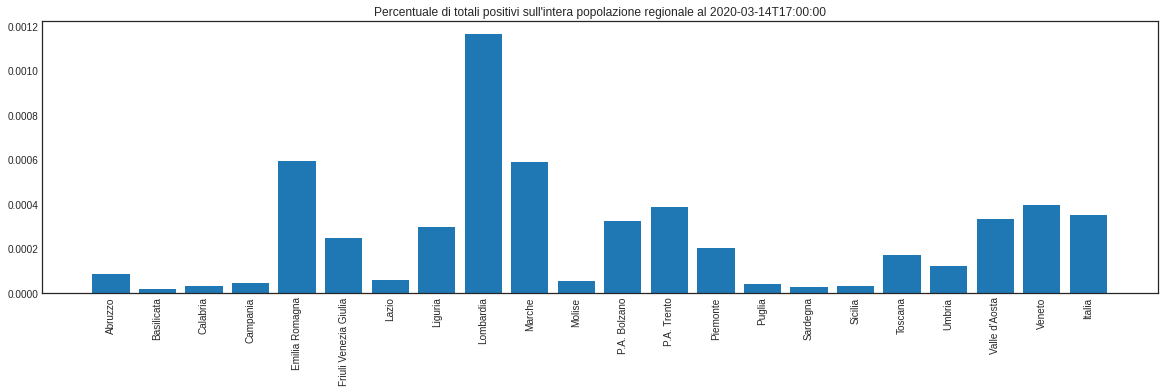

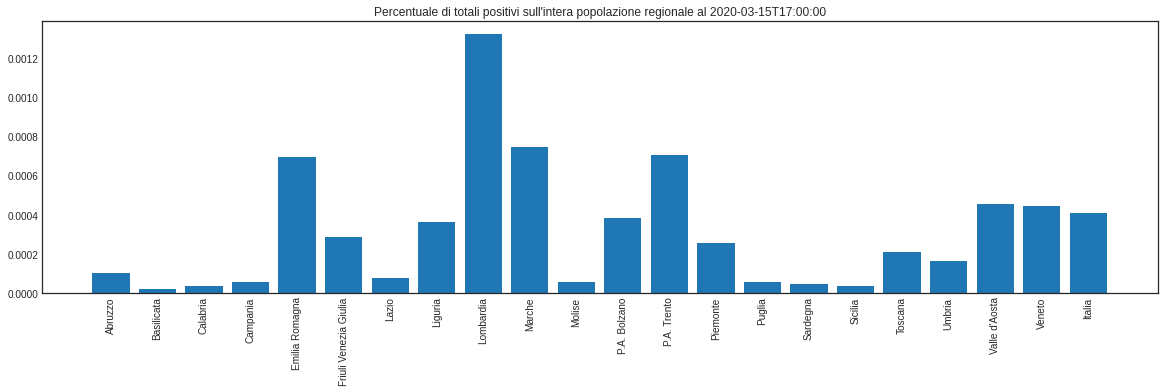

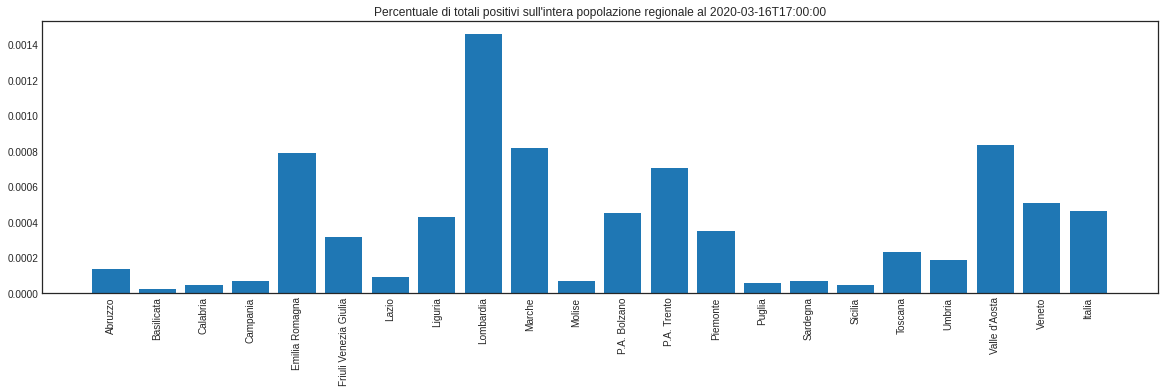

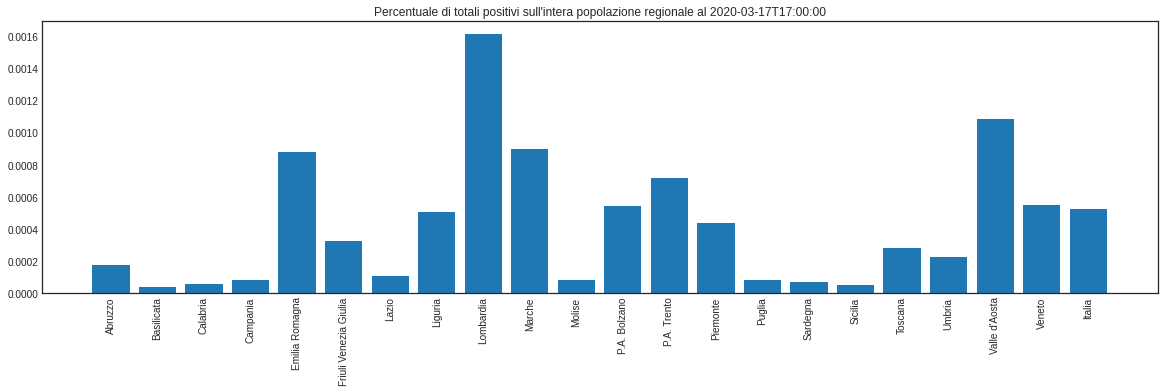

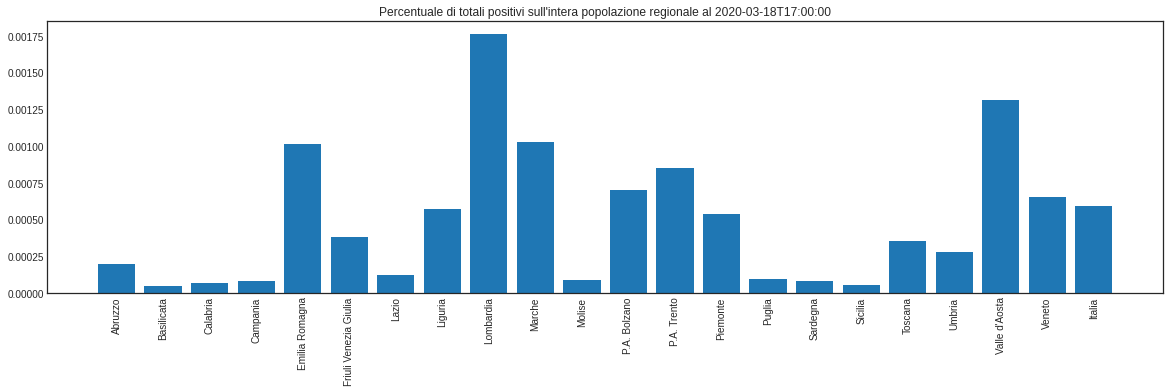

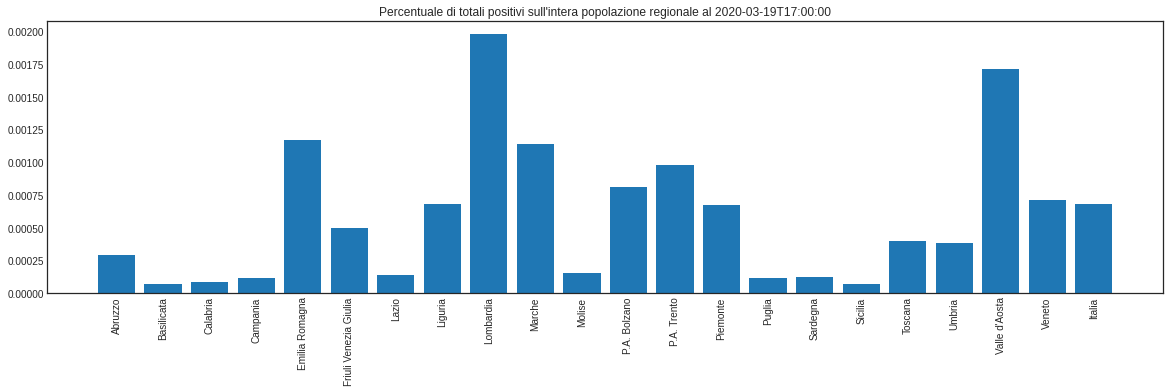

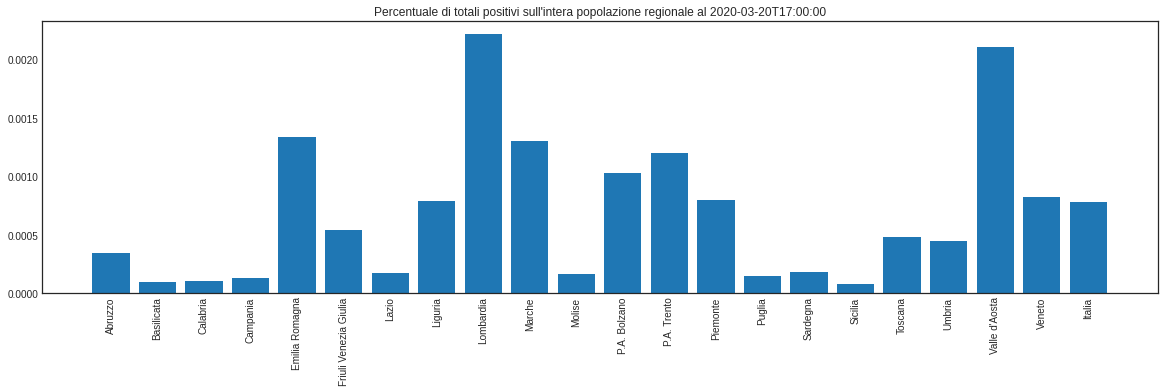

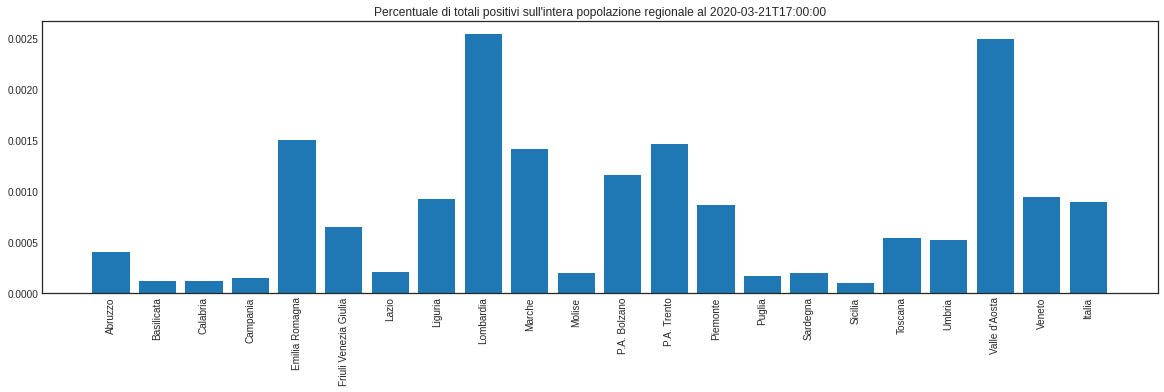

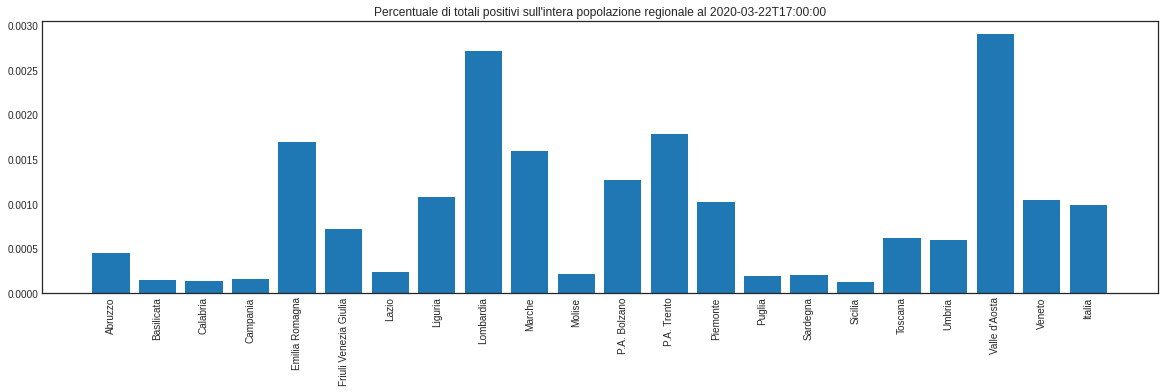

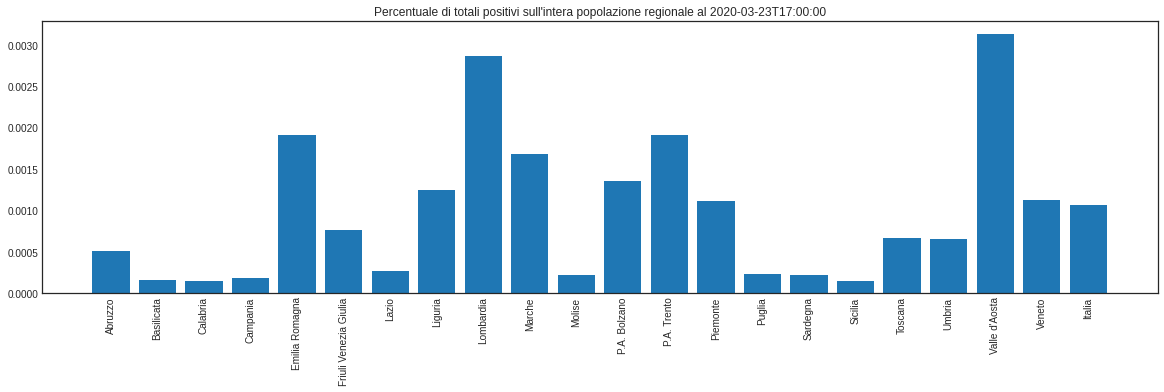

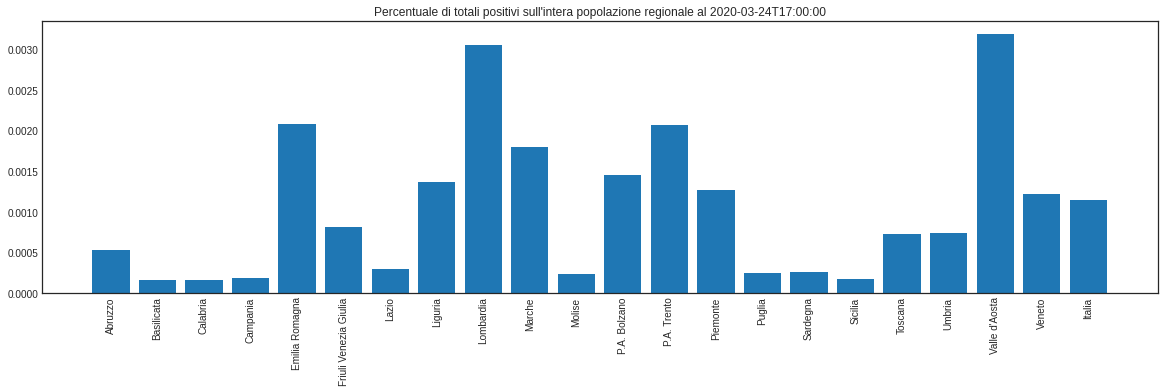

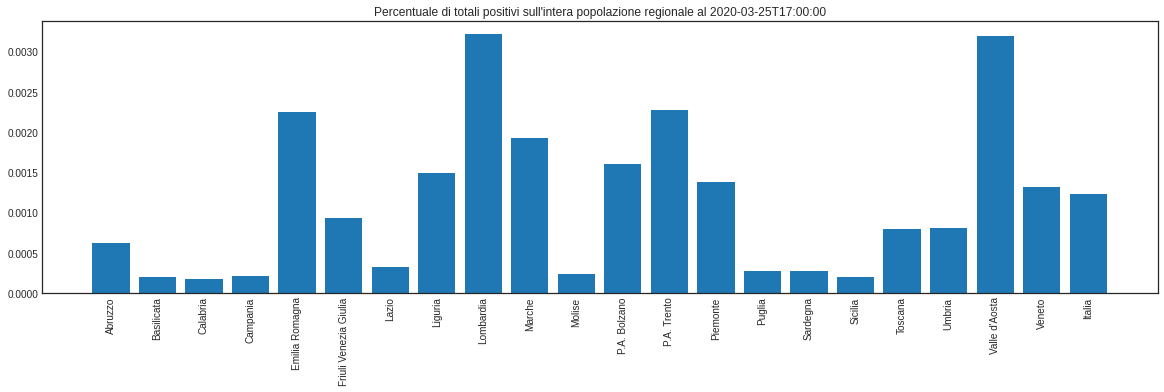

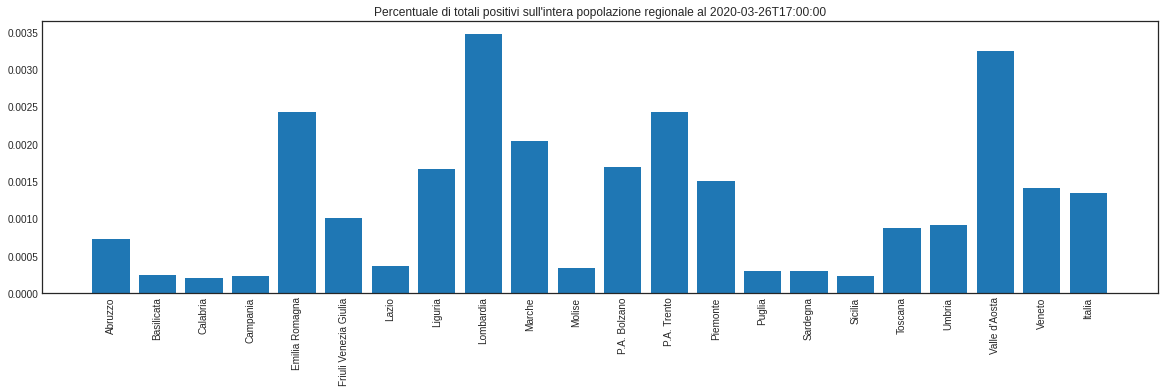

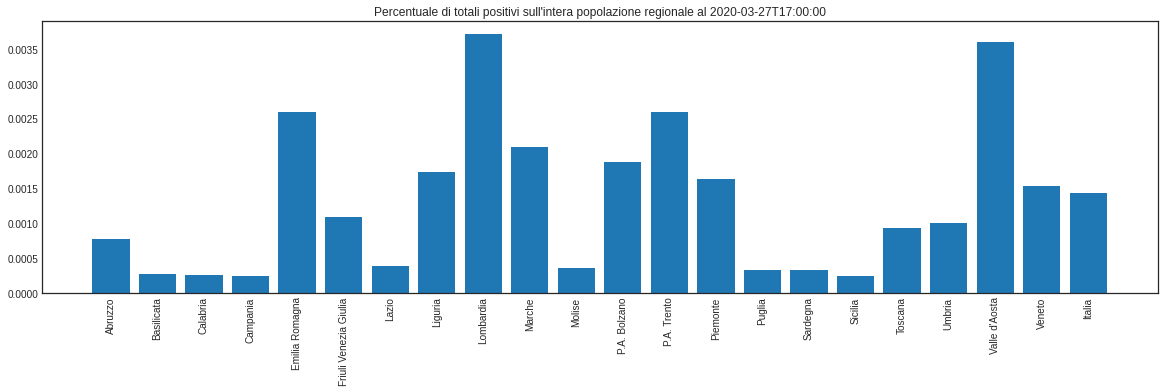

In [100]:
for day in italy_total_positive_normalized.index: 
    italy_total_positive_normalized_curr_day = italy_total_positive_normalized[italy_total_positive_normalized.index == day]
    italy_total_positive_normalized_curr_day_stacked = italy_total_positive_normalized_curr_day.stack()
    italy_total_positive_normalized_curr_day = italy_total_positive_normalized_curr_day_stacked.unstack(level=0)
    italy_total_positive_normalized_curr_day.columns = ['Positive_percentage']
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_total_positive_normalized_curr_day.index, height=italy_total_positive_normalized_curr_day.Positive_percentage)
    plt.title('Percentuale di totali positivi sull\'intera popolazione regionale al ' + day);



Fino al 7/3 le regioni col maggior tasso di positivi sono, come noto, Lombardia ed Emilia Romagna. Successivamente si nota l'ascesa di Marche, Trentino e Valle d'Aosta. Dal 22/3 la Valle d'Aosta e Lombardia raggiungono e poi superano il tasso di positività del 3 per mille.

Vediamo l'andamento temporale del fenomeno regione per regione

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


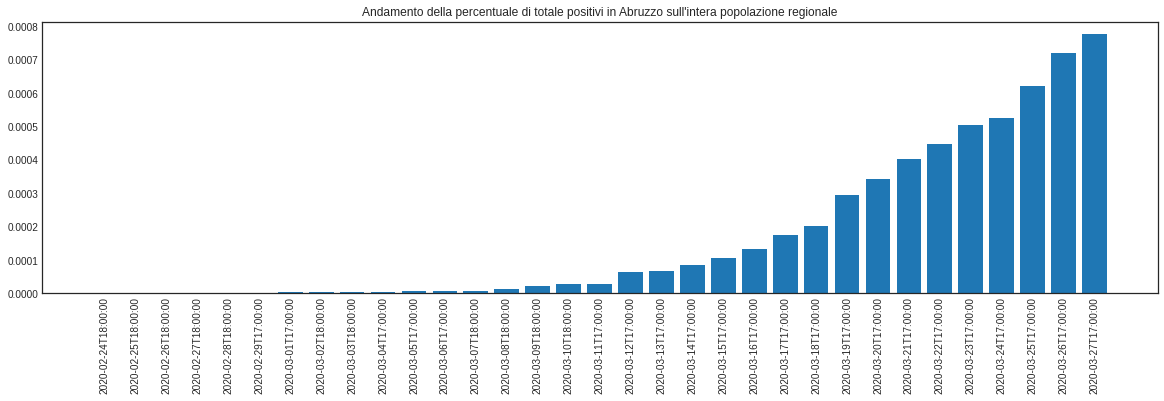

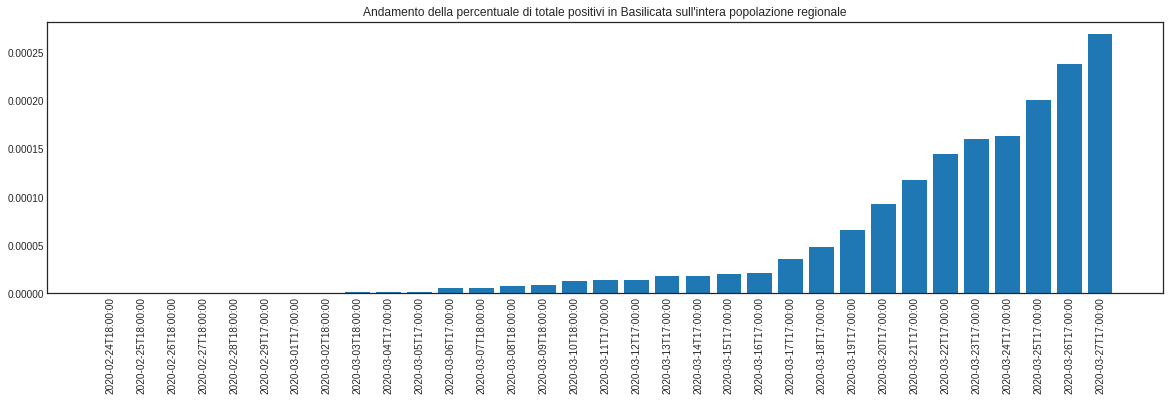

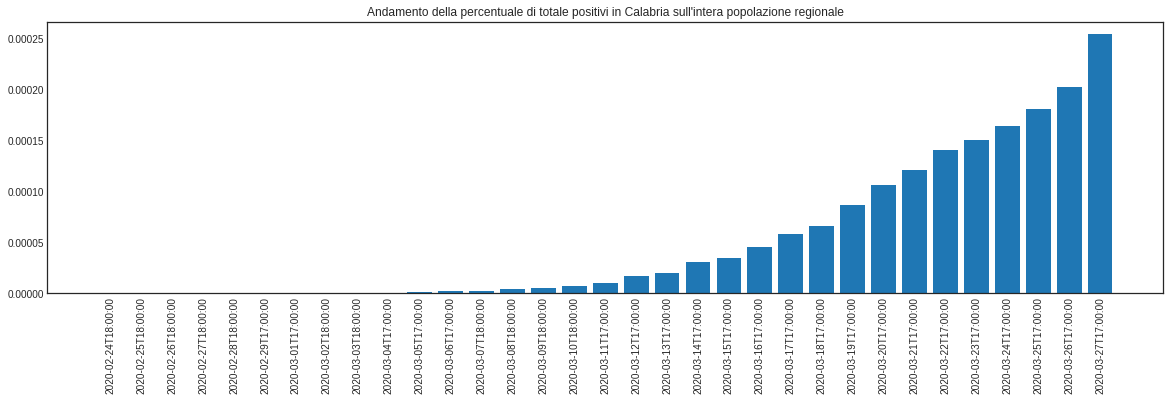

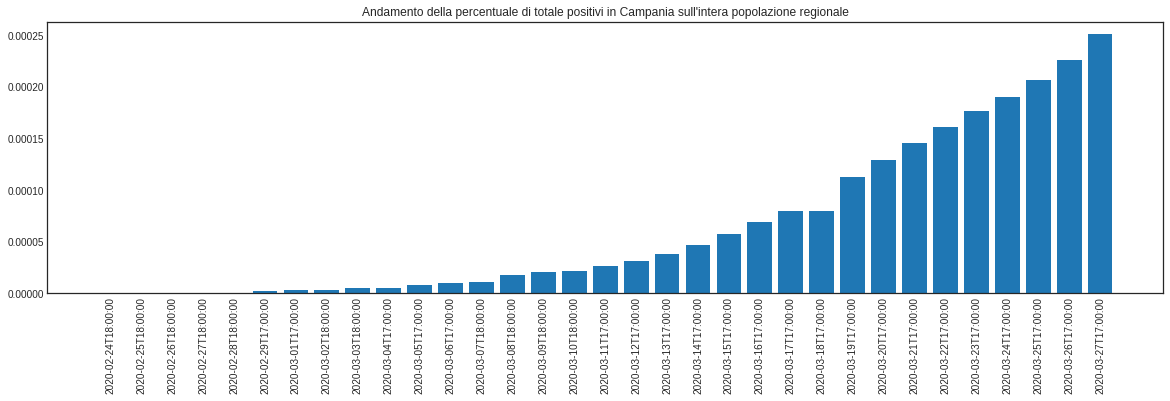

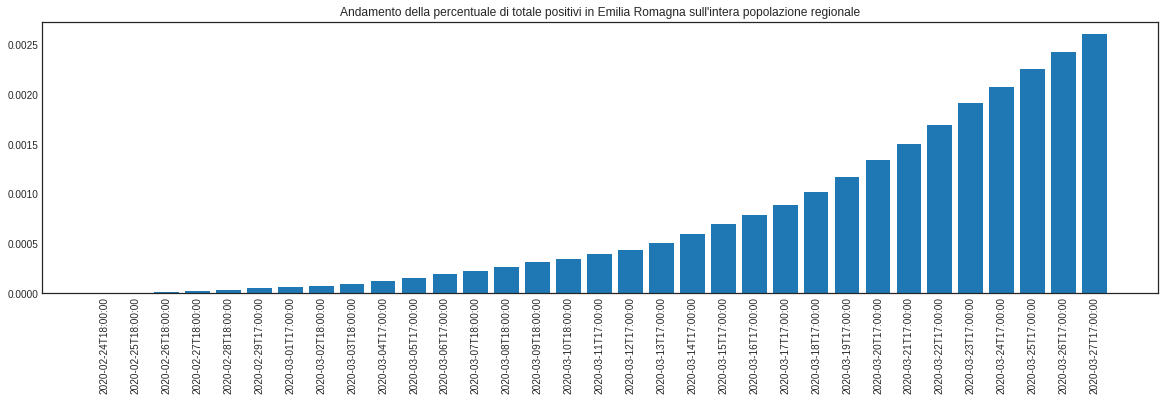

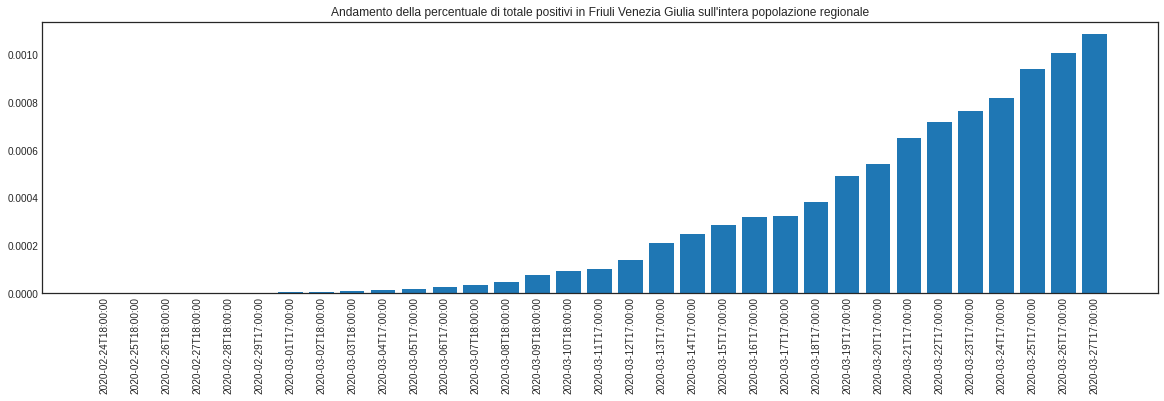

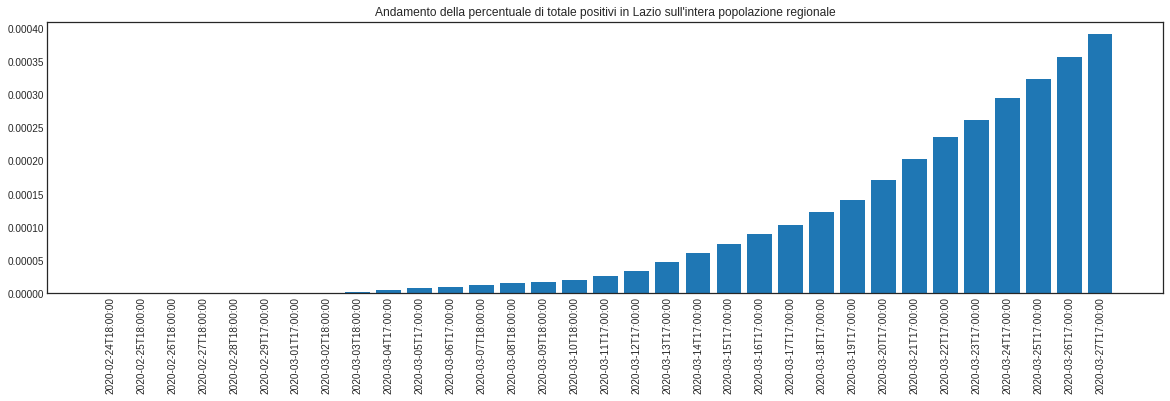

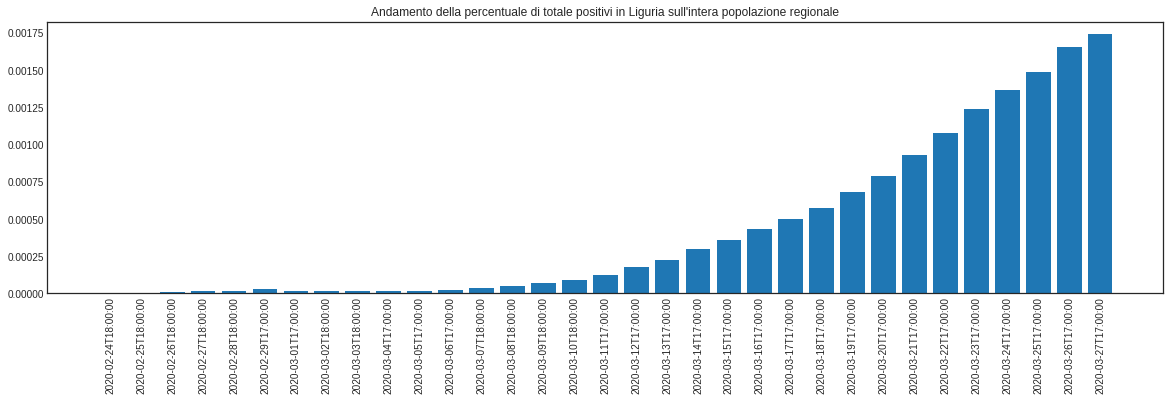

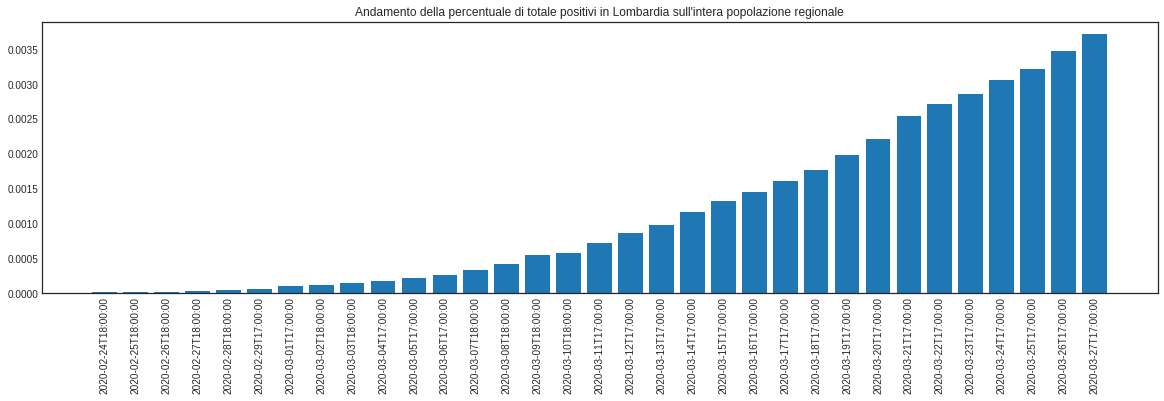

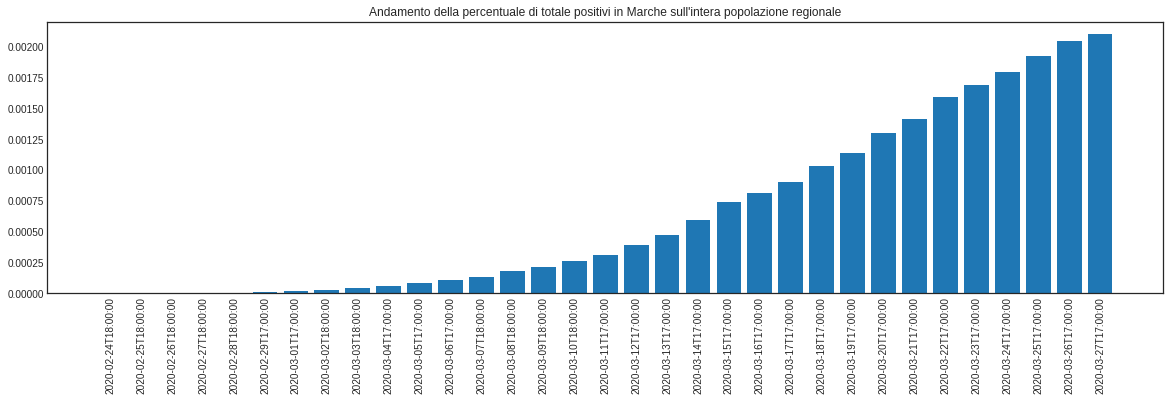

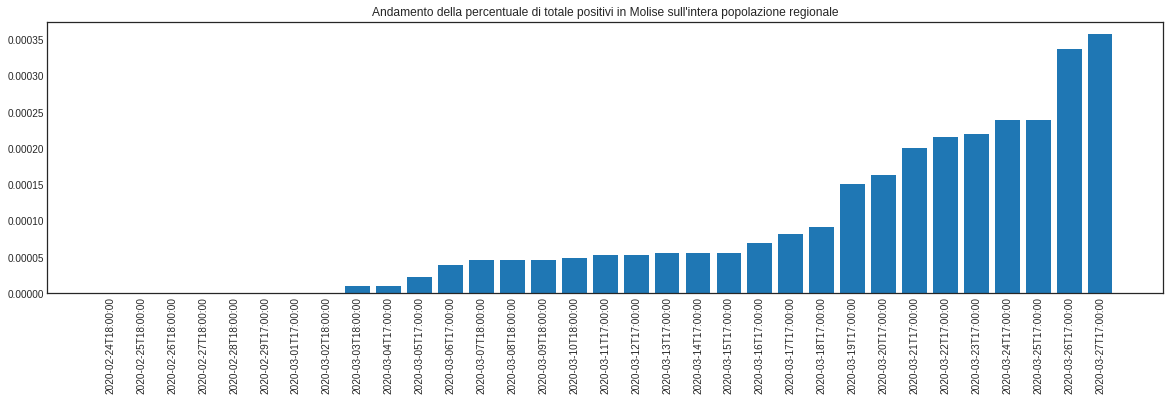

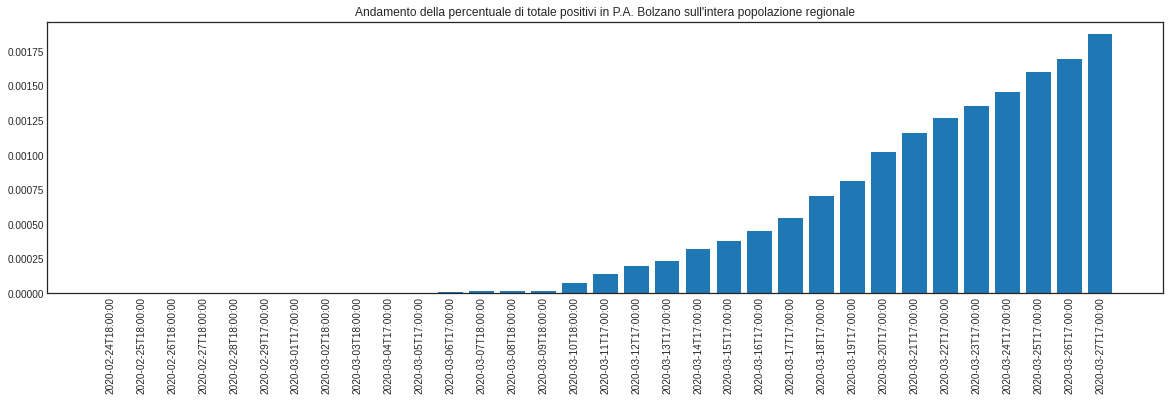

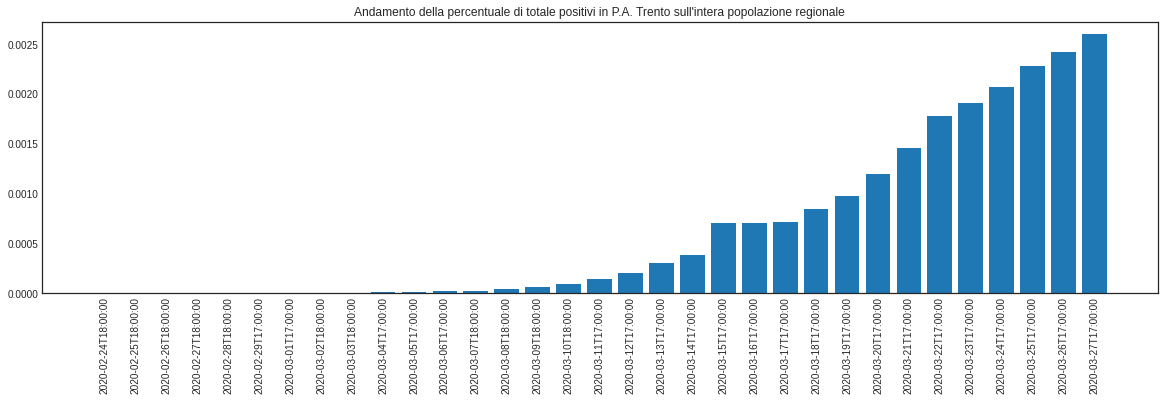

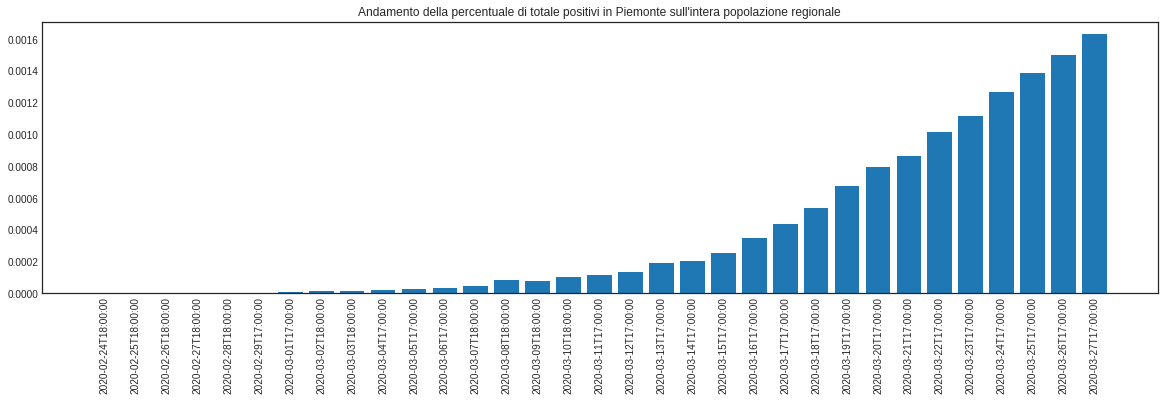

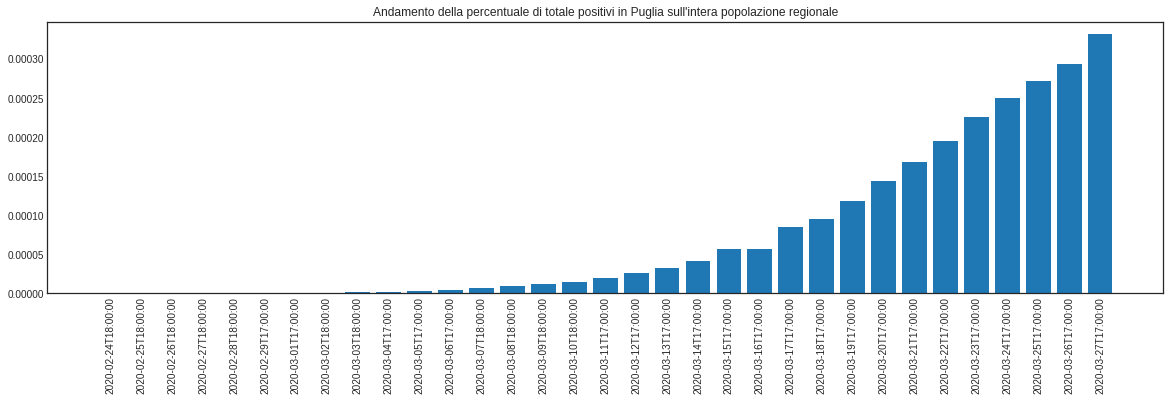

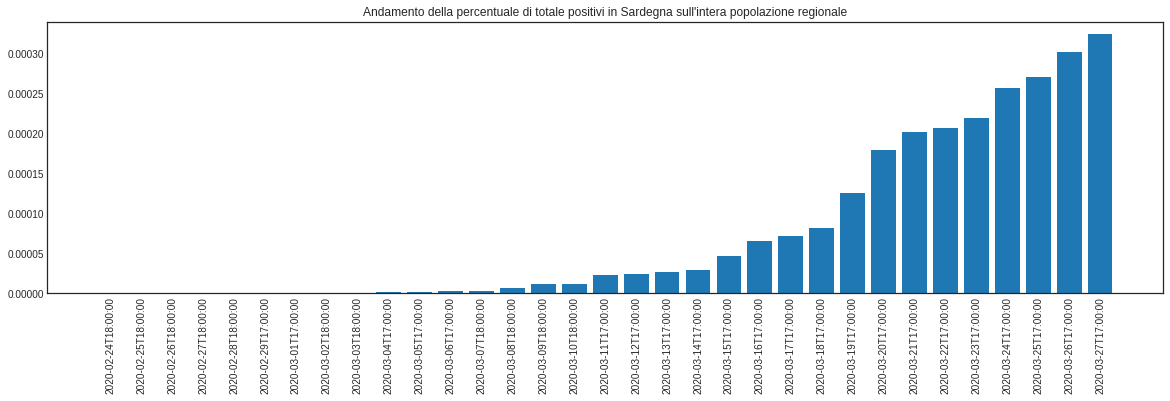

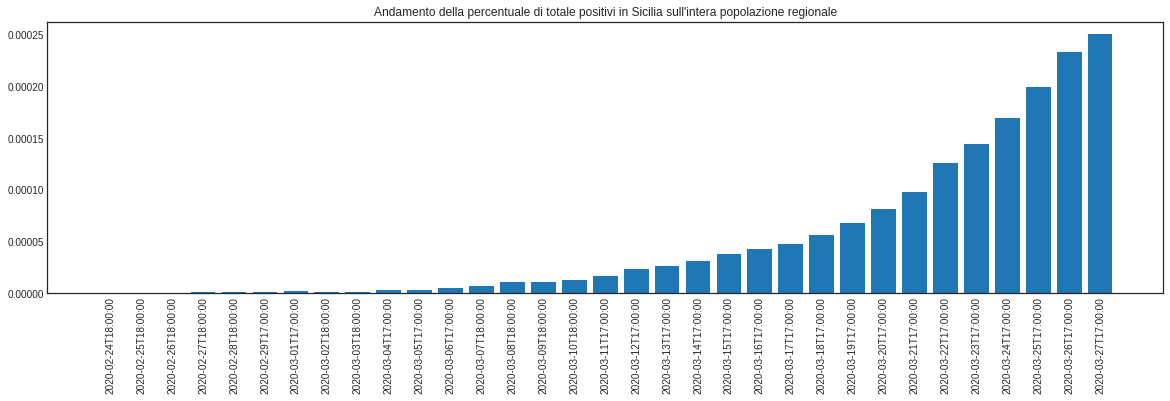

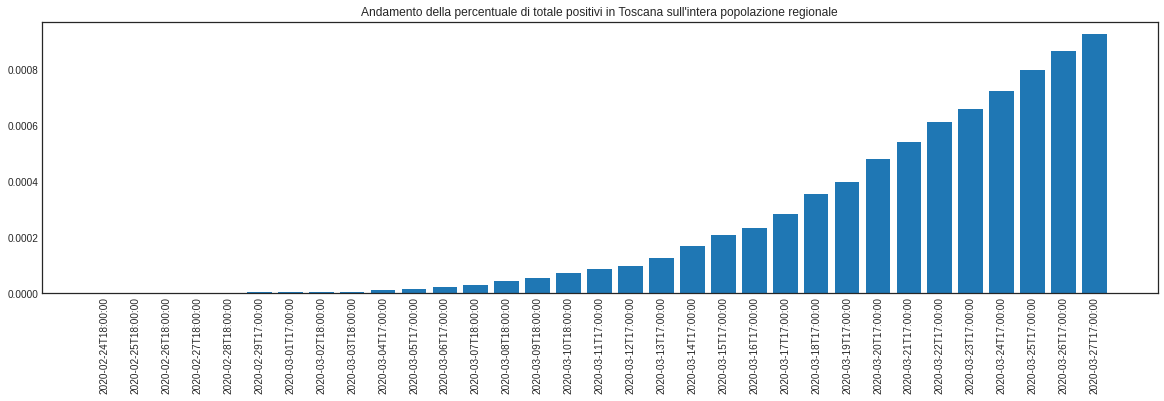

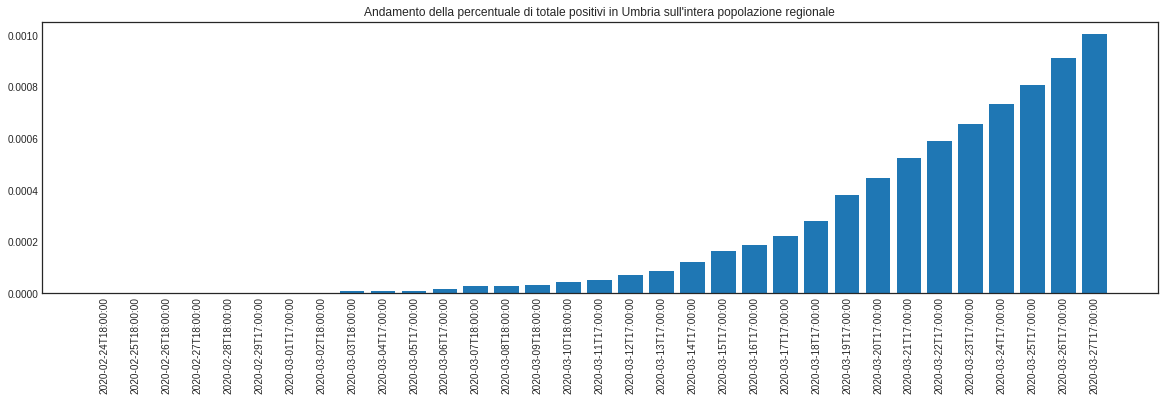

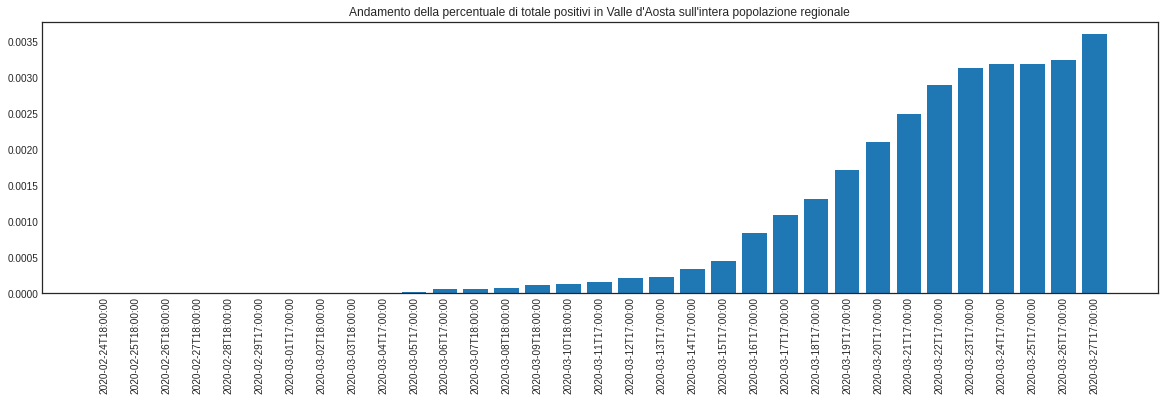

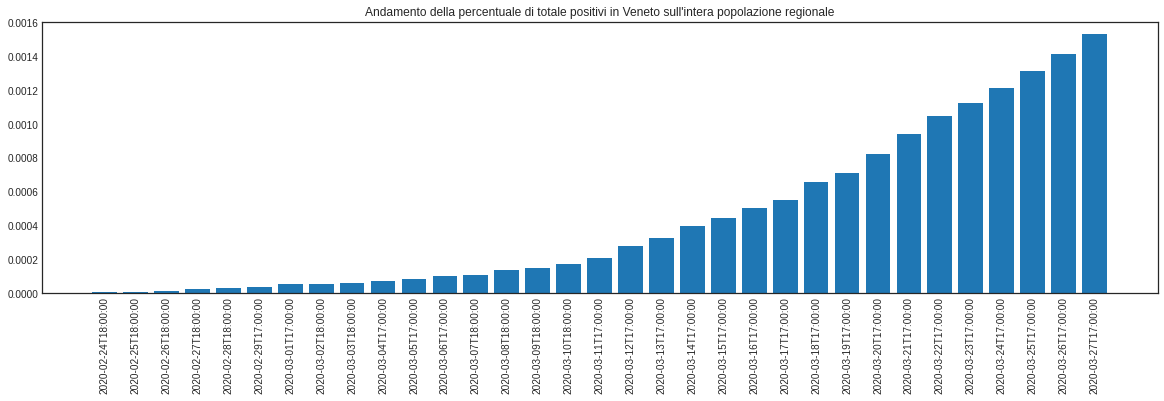

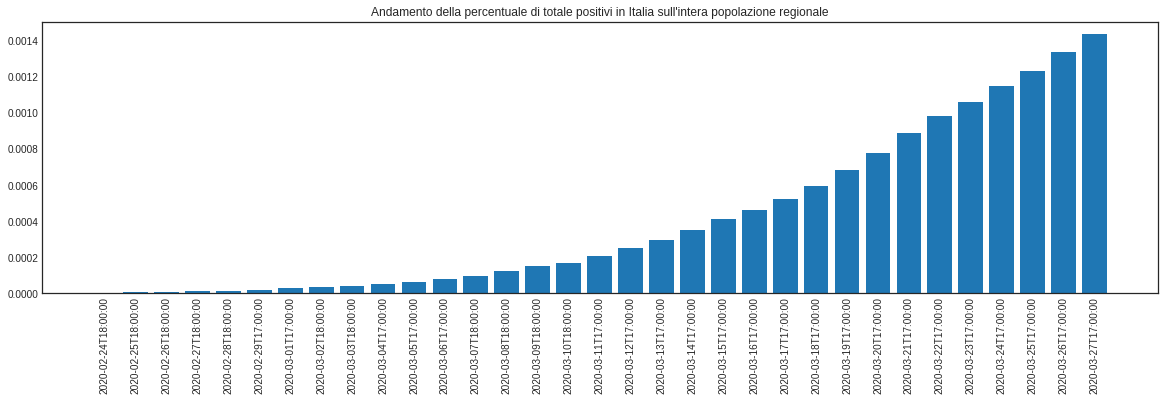

In [101]:
for region in list(italy_total_positive_normalized): 
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_total_positive_normalized.index, height=italy_total_positive_normalized[region])
    plt.title('Andamento della percentuale di totale positivi in ' + region + ' sull\'intera popolazione regionale');

L'andamento qualitativo del tasso di positivi non può che seguire quello del numero assoluto.

Infine la correlazione tra densità abitativa e percentuale di positivi totali riferita all'ultima rilevazione

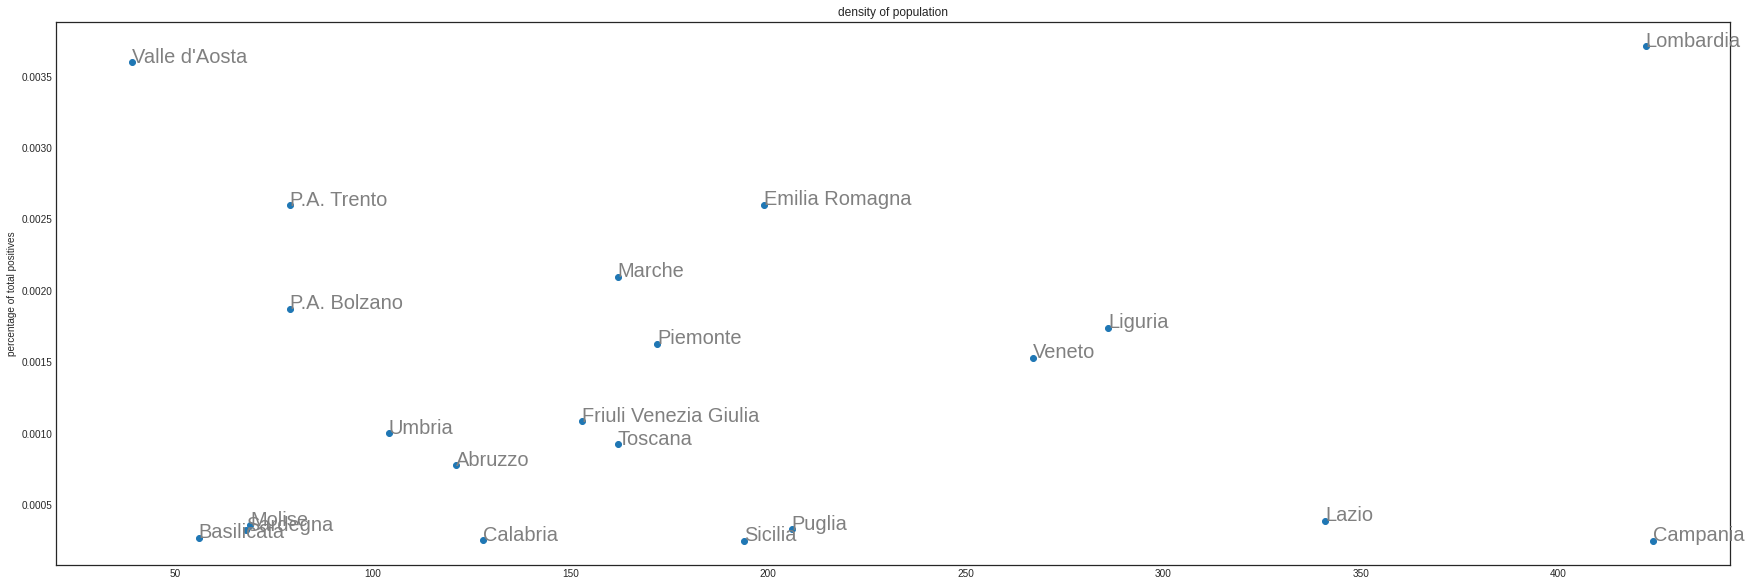

In [102]:
last_day = italy_total_positive_normalized.index[-1]
for day in italy_total_positive_normalized.index: 
    italy_total_positive_normalized_last_day = italy_total_positive_normalized[italy_total_positive_normalized.index == last_day]
italy_total_positive_normalized_last_day_flat = italy_total_positive_normalized_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_normalized_last_day_flat, population_density)
fig, ax = plt.subplots(figsize=(30, 10))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density'], mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='percentage of total positives')
plt.show()


Questo plot non chiarisce nulla sull'eventuale correlazione tra le due grandezze ma sconta la differente maturità dell'epidemia da regione a regione, sul fondo infatti si trovano tutte le regioni del centro-sud che ad occhio hanno un ritardo di circa una settimana rispetto alle regioni del nord e che pertanto beneficiano maggiormente delle misure di prevenzione adottate in corso d\'opera.

Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


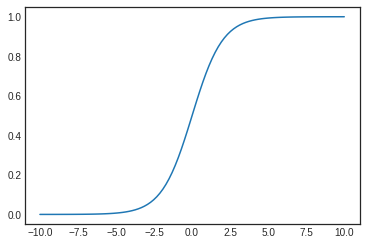

In [103]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... quella degli attualmente positivi potrebbe raggiungere un picco, quindi scendere ed infine tendere a zero, forse con una discesa più lenta rispetto alla salita, più o meno come il seguente modello: 

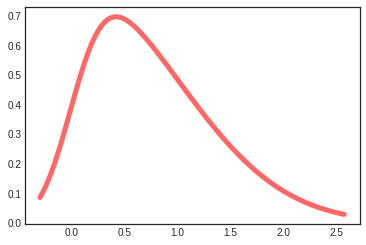

In [104]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

In ogni caso ciò che interessa maggiormente ai fini predittivi è la data e l'intensità del picco degli attualmente positivi. Se fosse possibile stimare queste due quantità il Sistema Sanitario Regionale potrebbe organizzarsi.

Il modello più "antico" a disposizione è quello lombardo ma bisogna tenere conto che per molti giorni non ha beneficiato delle misure restrittive di cui invece godono i focolai più recenti, quindi le previsioni, al di là della loro correttezza, sono da intendersi come pessimistiche. Il picco effettivo dovrebbe essere più basso e più lontano nel tempo rispetto a quello previsto, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Per rendere confrontabili i modelli delle singole regioni dobbiamo renderci indipendenti dalle loro caratteristiche intrinseche (dimensioni e numero di abitanti, in particolare) per cui non possiamo fare affidamento sul numero di positivi assoluto. Utilizziamo quindi le variazioni percentuali rispetto al giorno precedente, ossia la differenza tra il numero degli attualmente positivi del giorno considerato ed il precedente, diviso per il numero degli attualmente positivi del giorno precedente.

**Il picco si configurerà nel momento in cui le barre tenderanno allo zero o inizieranno ad andare sotto zero**

In [105]:
italy_currently_positive_delta = (italy_currently_positive - italy_currently_positive.shift(periods=1))/italy_currently_positive.shift(periods=1)
italy_currently_positive_delta = italy_currently_positive_delta.replace(np.inf, np.nan)
italy_currently_positive_delta = italy_currently_positive_delta.fillna(0)
italy_currently_positive_delta = italy_currently_positive_delta.loc['2020-03-01T17:00:00':]
italy_currently_positive_delta = italy_currently_positive_delta[italy_currently_positive_delta<1]
italy_currently_positive_delta = italy_currently_positive_delta.fillna(0)
italy_currently_positive_delta


denominazione_regione   Abruzzo  Basilicata  ...    Veneto    Italia
date                                         ...                    
2020-03-01T17:00:00    0.000000    0.000000  ...  0.380952  0.503337
2020-03-02T18:00:00    0.000000    0.000000  ...  0.038314  0.163602
2020-03-03T18:00:00    0.200000    0.000000  ...  0.095941  0.233243
2020-03-04T17:00:00    0.166667    0.000000  ...  0.161616  0.195758
2020-03-05T17:00:00    0.142857    0.000000  ...  0.101449  0.218034
2020-03-06T17:00:00    0.125000    0.000000  ...  0.194737  0.188107
2020-03-07T18:00:00    0.222222    0.000000  ...  0.112335  0.292390
2020-03-08T18:00:00    0.545455    0.333333  ...  0.233663  0.262004
2020-03-09T18:00:00    0.764706    0.250000  ...  0.113965  0.250196
2020-03-10T18:00:00    0.233333    0.400000  ...  0.128242  0.066249
2020-03-11T17:00:00    0.000000    0.142857  ...  0.200511  0.243834
2020-03-12T17:00:00    0.000000    0.000000  ...  0.379787  0.212370
2020-03-13T17:00:00    0.064103    0.250000  ...  0.120278  0.164810
2020-03-14T17:00:00    0.277108    0.000000  ...  0.221610  0.186894
2020-03-15T17:00:00    0.207547    0.100000  ...  0.120563  0.160732
2020-03-16T17:00:00    0.289062    0.090909  ...  0.143288  0.119885
2020-03-17T17:00:00    0.309091    0.666667  ...  0.094107  0.129545
2020-03-18T17:00:00    0.152778    0.350000  ...  0.186897  0.101604
2020-03-19T17:00:00    0.469880    0.370370  ...  0.073146  0.156043
2020-03-20T17:00:00    0.153005    0.405405  ...  0.160303  0.140705
2020-03-21T17:00:00    0.170616    0.269231  ...  0.146043  0.127338
2020-03-22T17:00:00    0.091093    0.227273  ...  0.102041  0.092711
2020-03-23T17:00:00    0.122449    0.098765  ...  0.073643  0.081050
2020-03-24T17:00:00    0.028099    0.022472  ...  0.073205  0.071641
2020-03-25T17:00:00    0.186495    0.230769  ...  0.073631  0.064612
2020-03-26T17:00:00    0.165312    0.187500  ...  0.068755  0.078093
2020-03-27T17:00:00    0.075581    0.105263  ...  0.082736  0.070969

[27 rows x 22 columns]

I dati grezzi non mostrano regolarità. Per questo motivo si applica una media mobile a 3 giorni

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


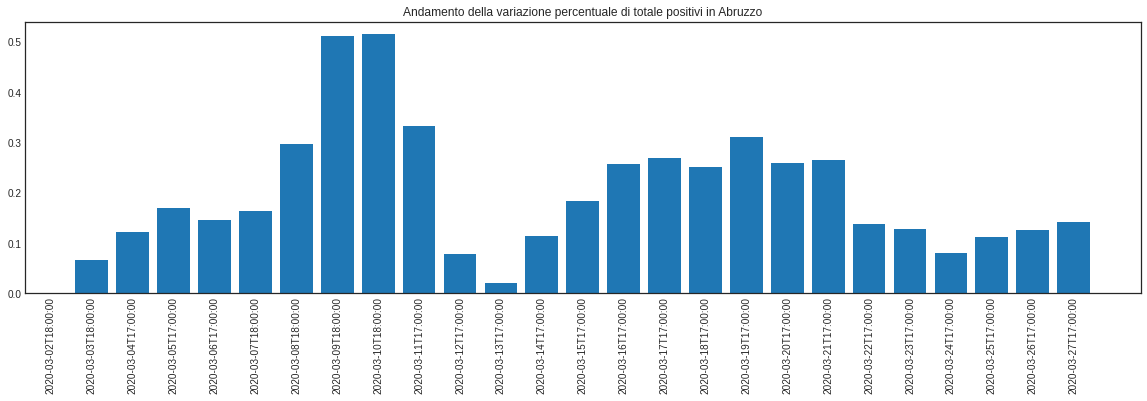

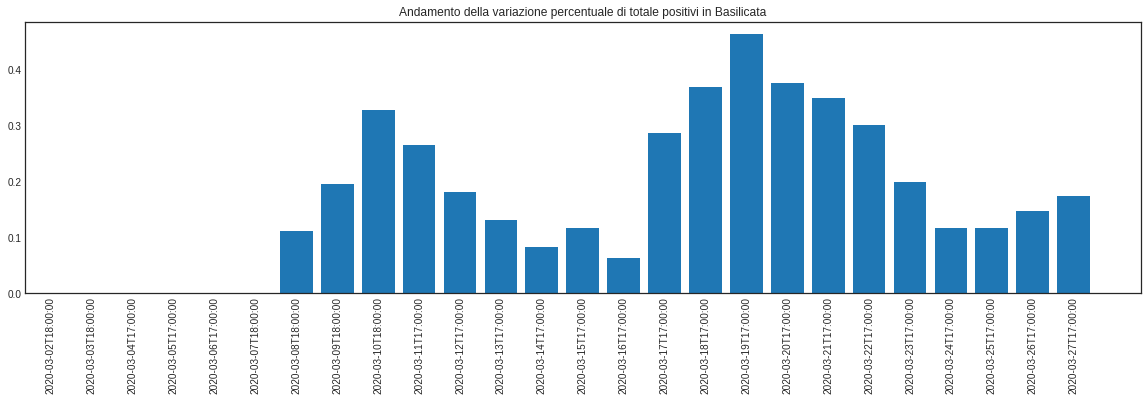

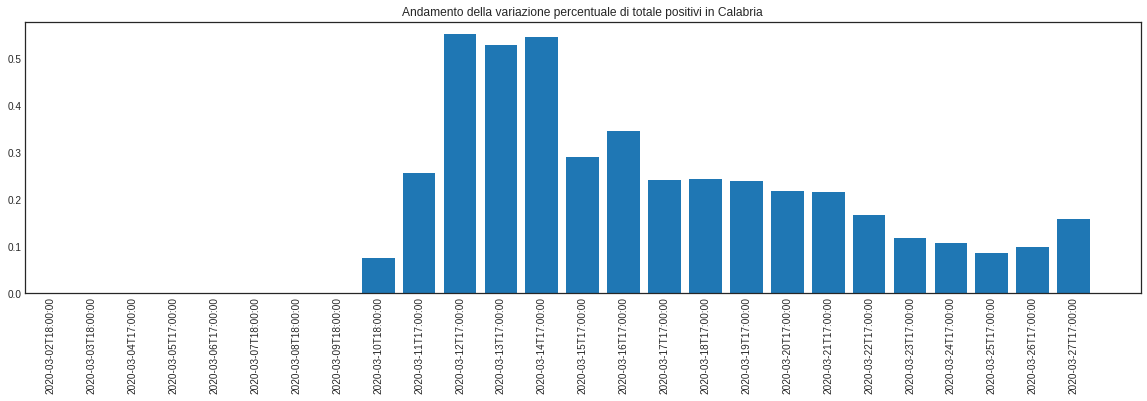

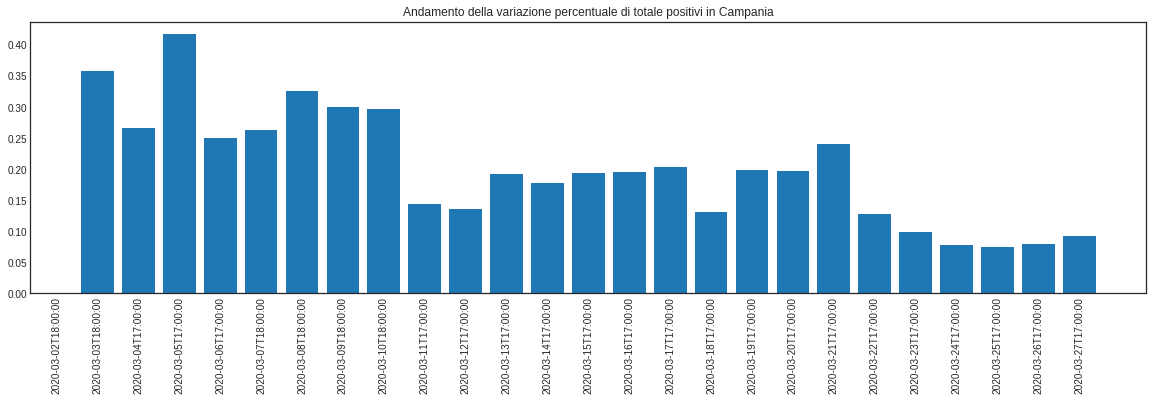

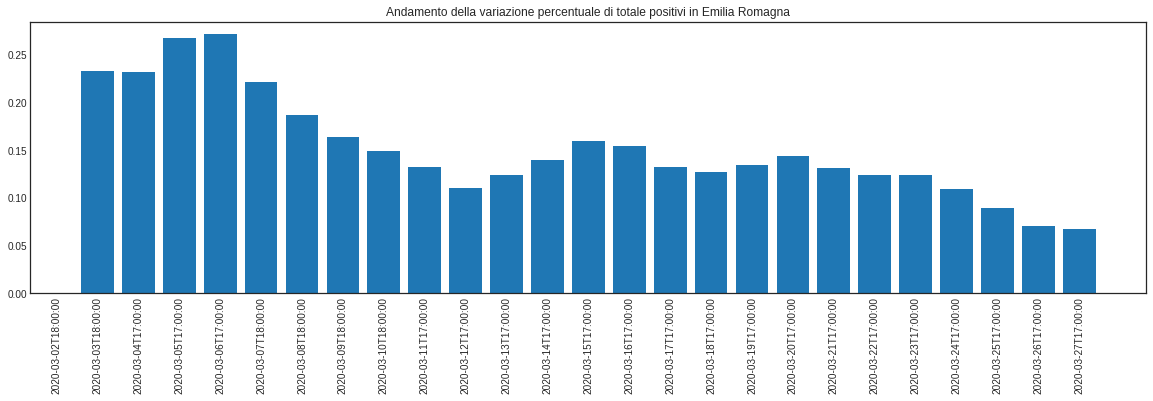

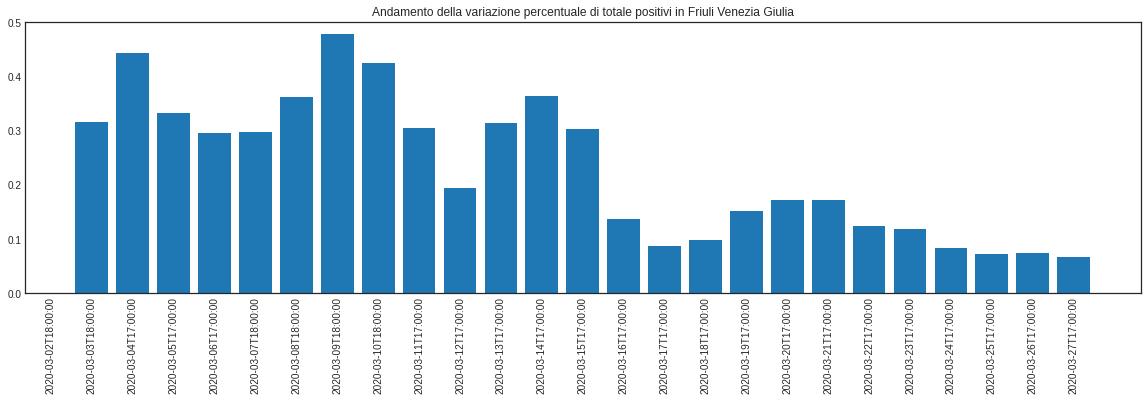

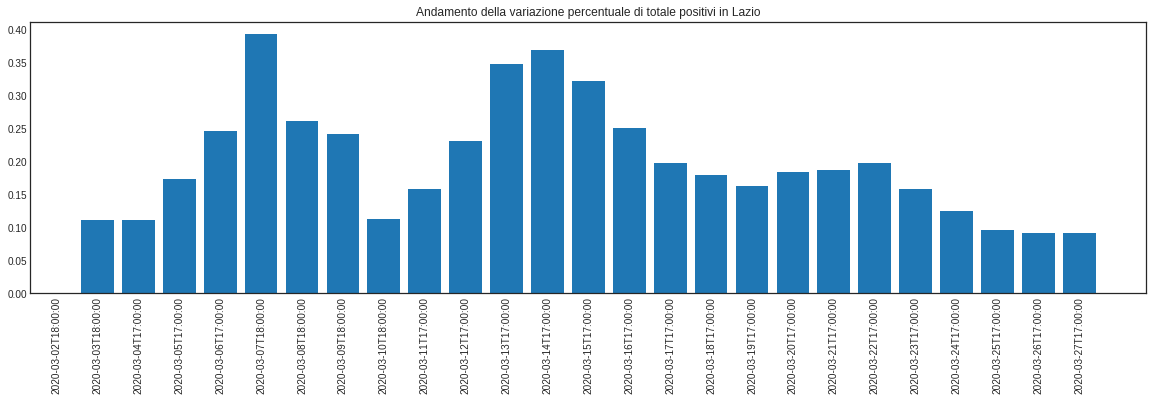

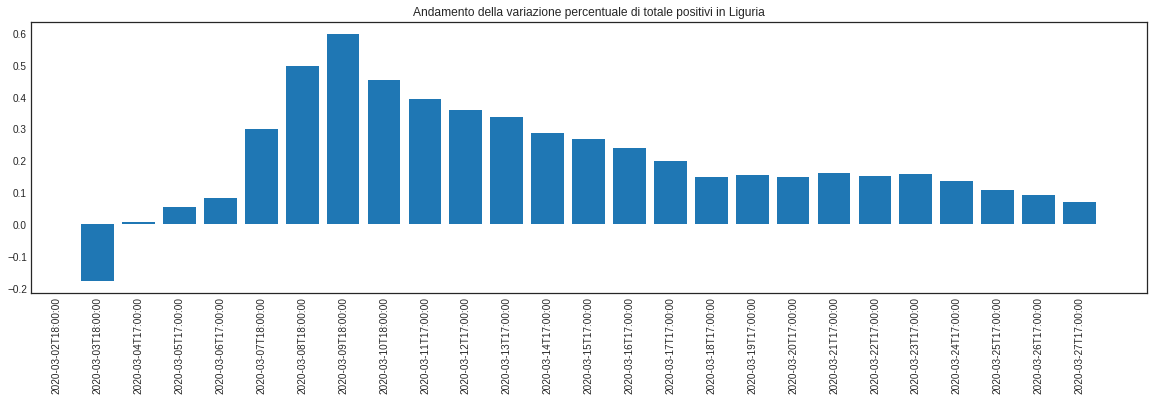

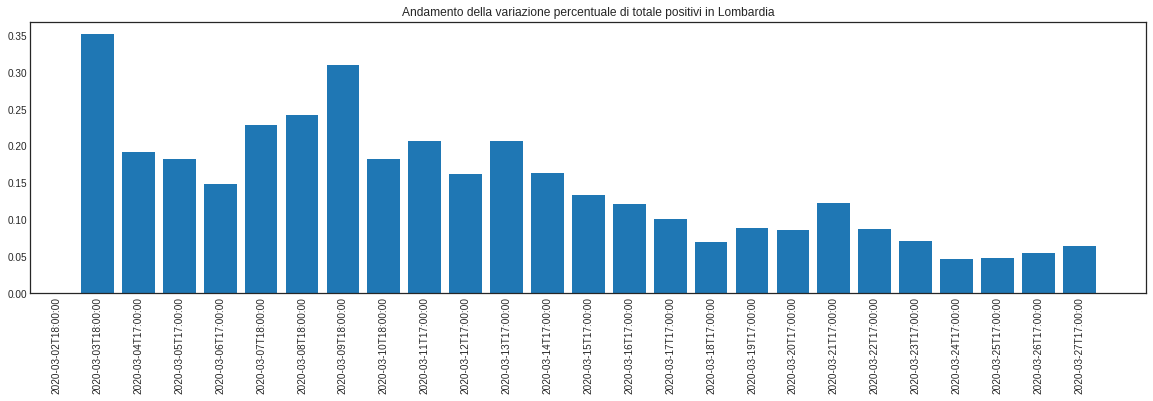

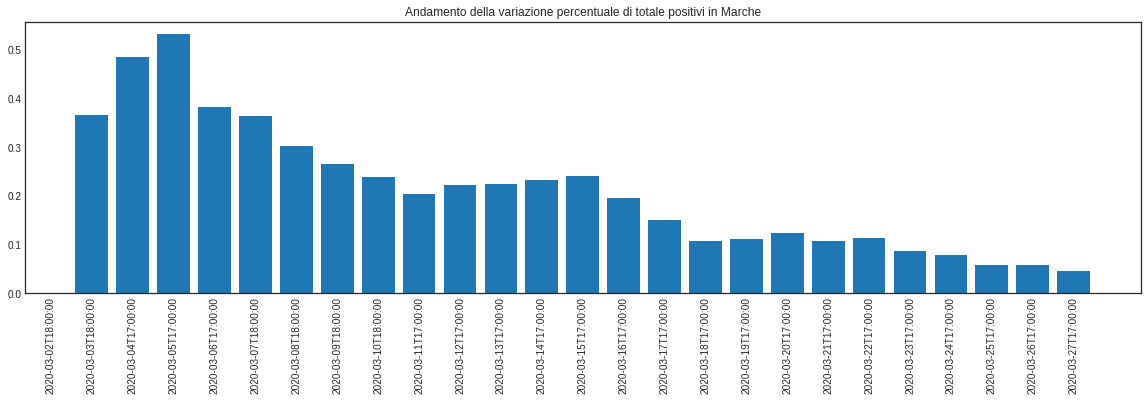

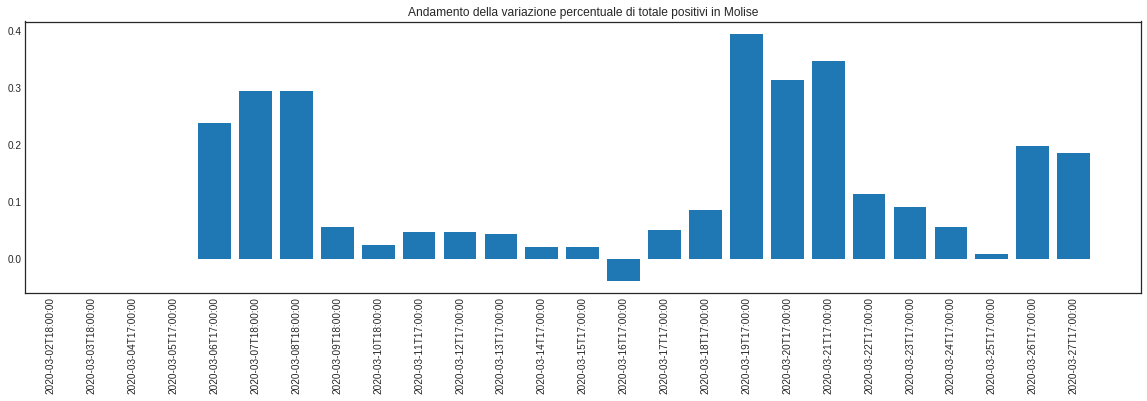

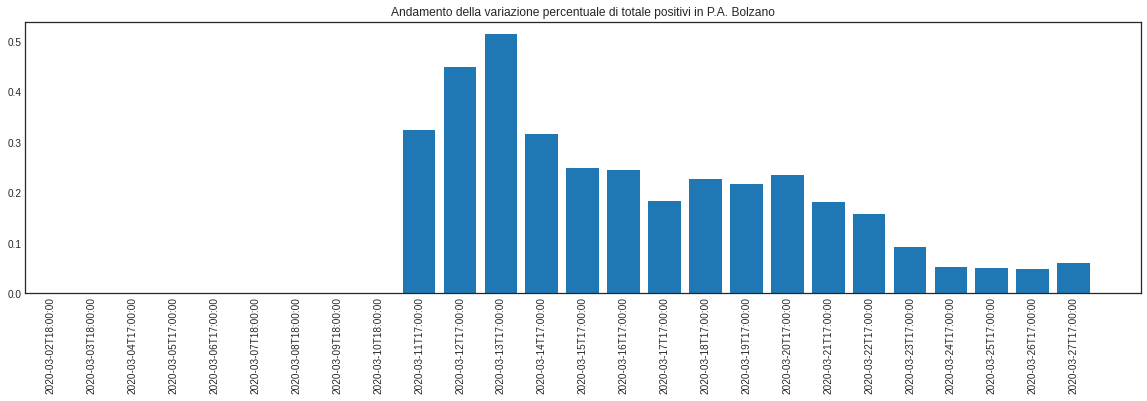

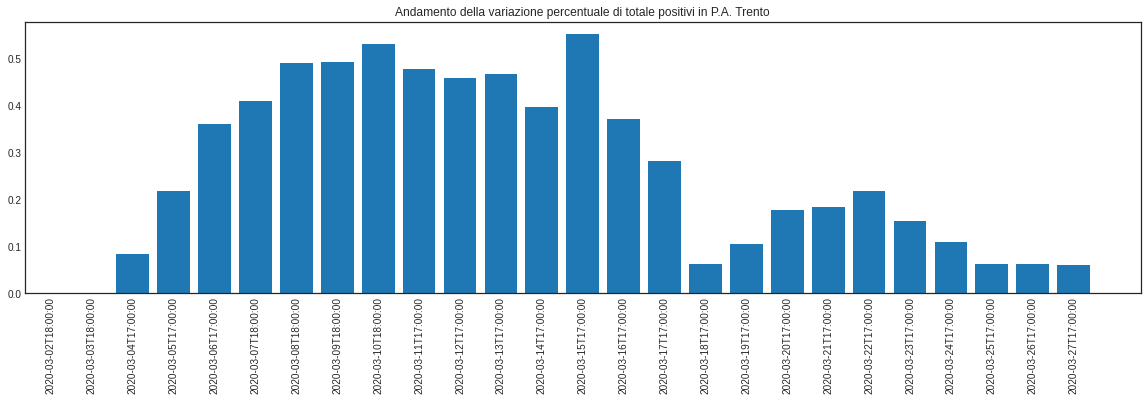

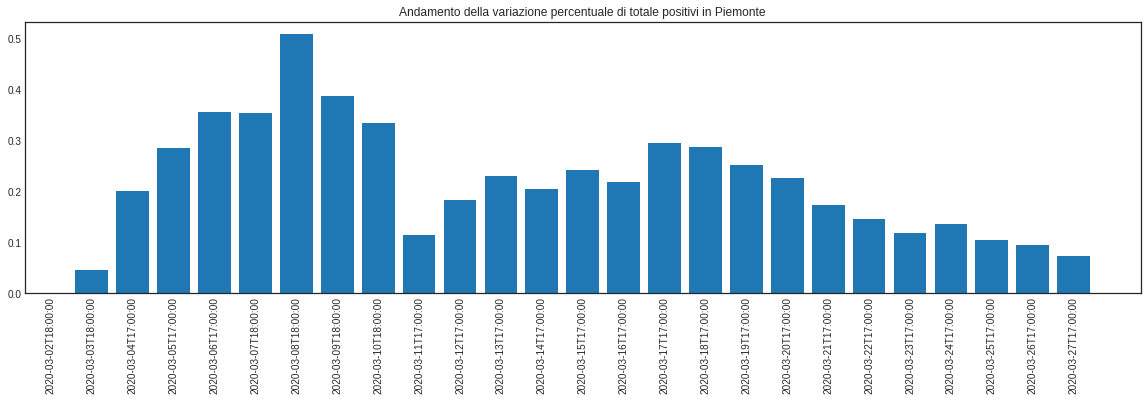

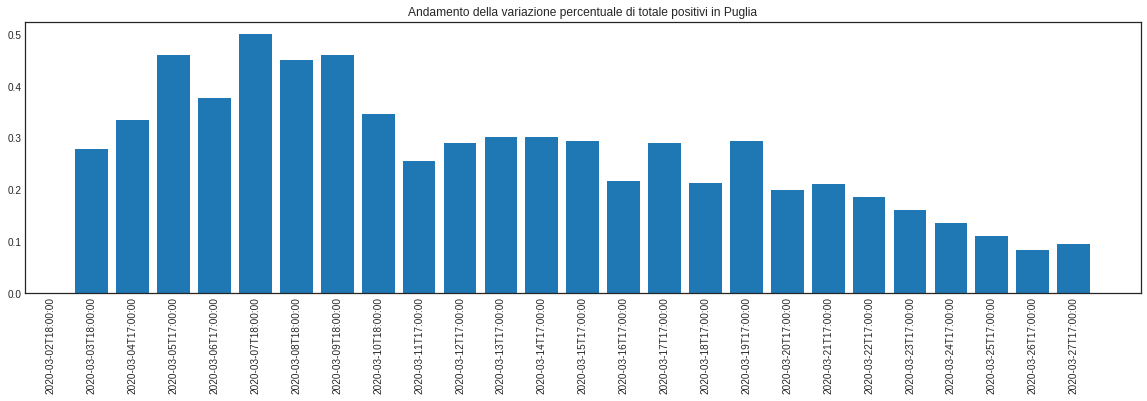

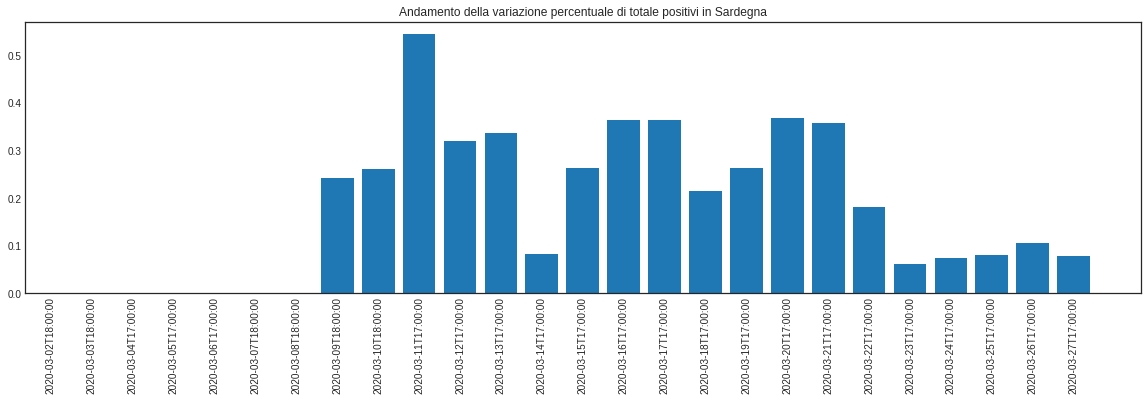

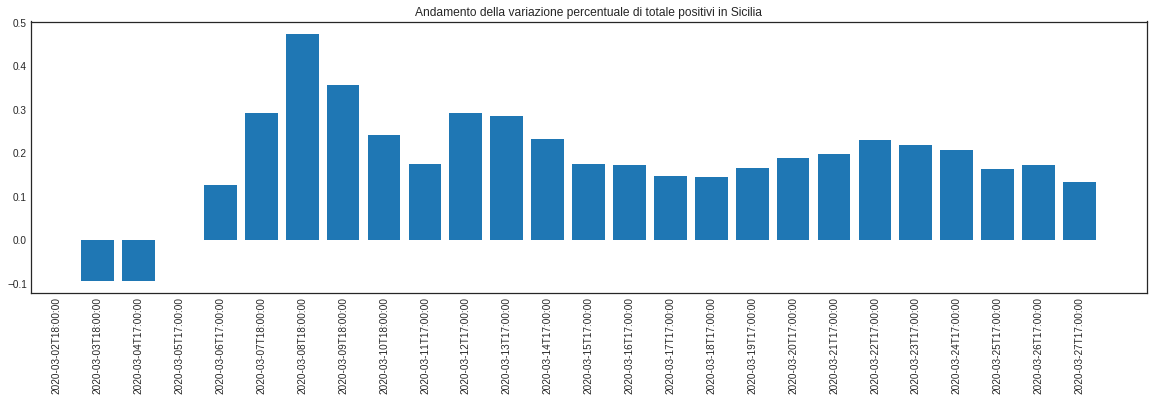

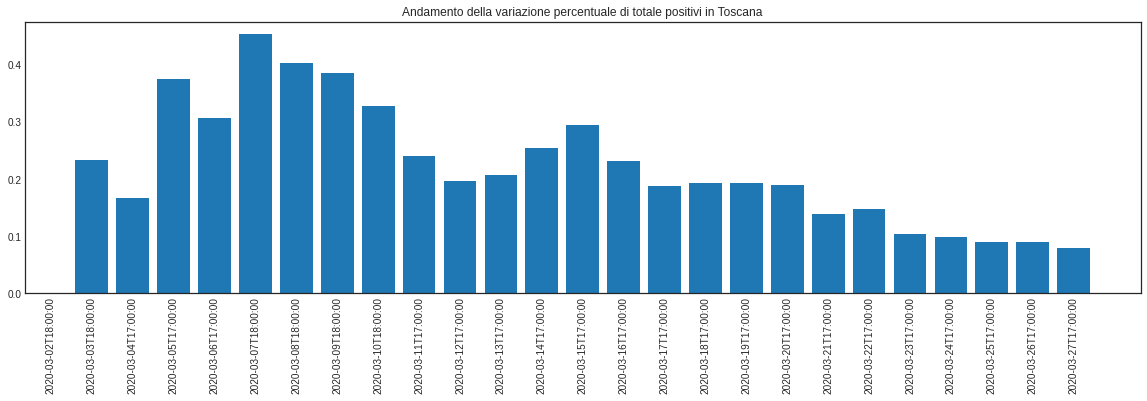

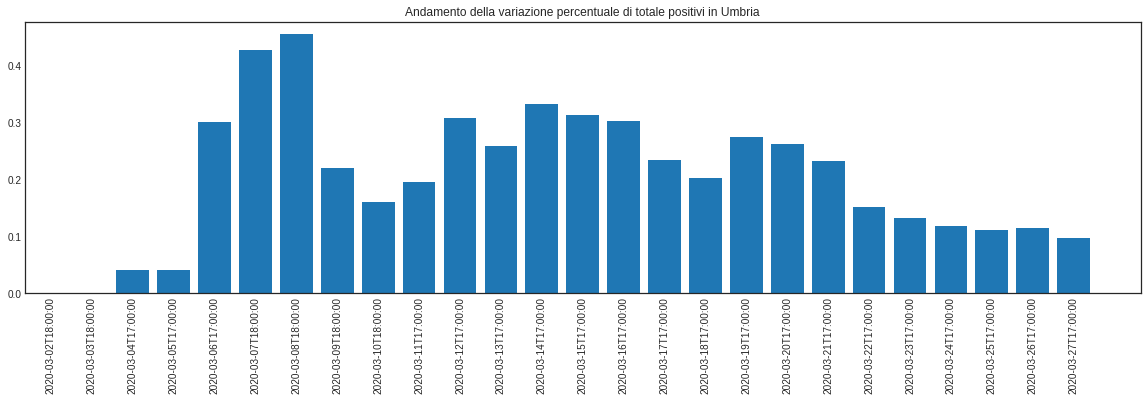

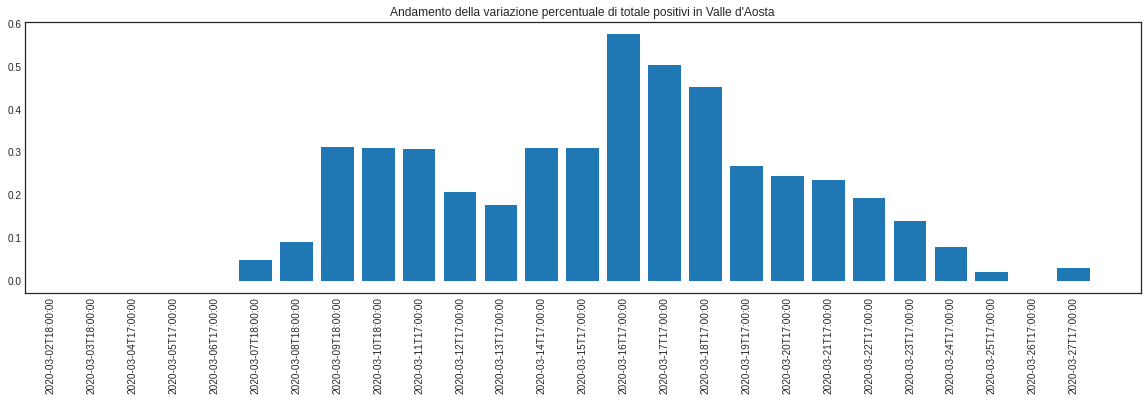

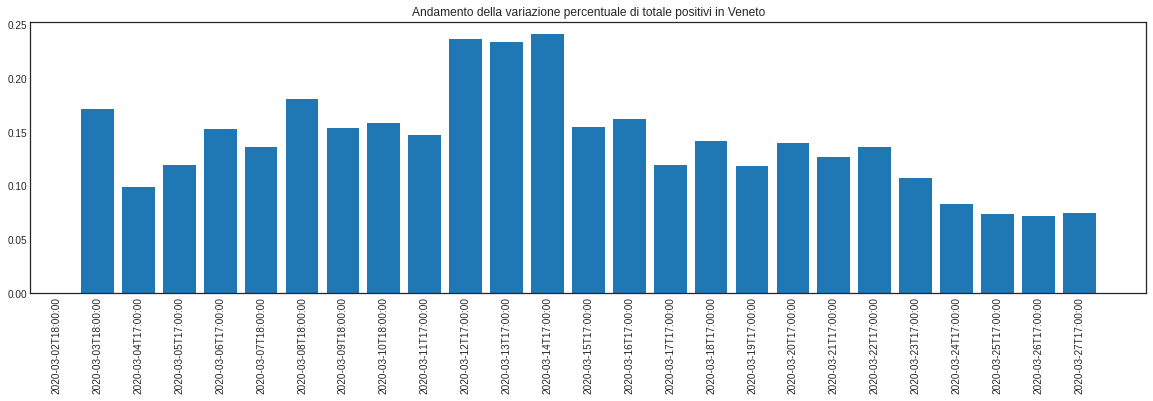

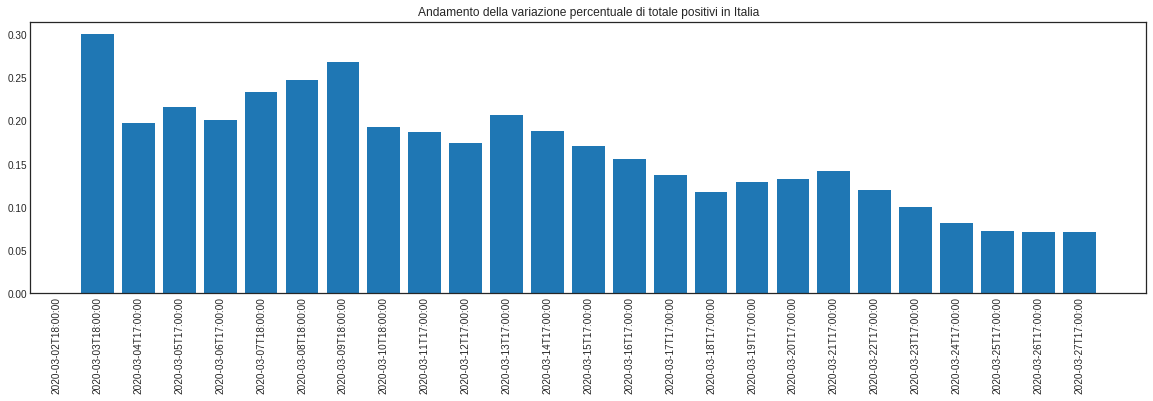

In [106]:
for region in list(italy_currently_positive_delta): 
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_currently_positive_delta.index, height=italy_currently_positive_delta[region].rolling(window=3).mean())
    plt.title('Andamento della variazione percentuale di totale positivi in ' + region);

La media mobile a 3 giorni evidenzia un carattere ondulatorio del fenomeno con l'ampiezza delle onde che tende a ridursi da un periodo al successivo.

Al momento la crescita zero sembra globalmente ancora lontana (poichè sembra perdere 5 punti percentuali ogni 7 giorni si potrebbe parlare di 2 settimane) ma il decreto dell'11 marzo, entrato in vigore dal giorno successivo, dovrebbe sperabilmente farsi sentire a brevissimo anticipandola.


Un altro spunto interessante potrebbe provenire dal rapporto tra numero di positivi totali e numero di tamponi effettuati, anche se i tamponi non sono stati effettuati in maniera casuale ma solo a chi presentava sintomi riconducibili al Coronavirus

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


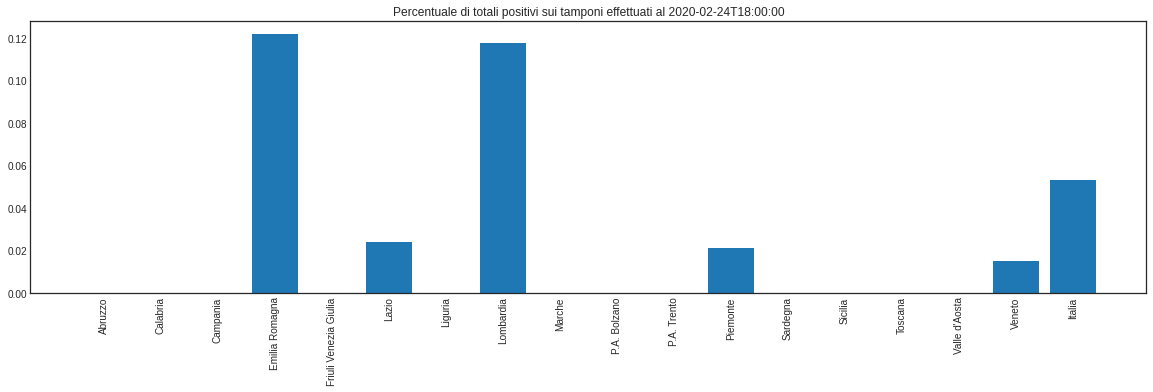

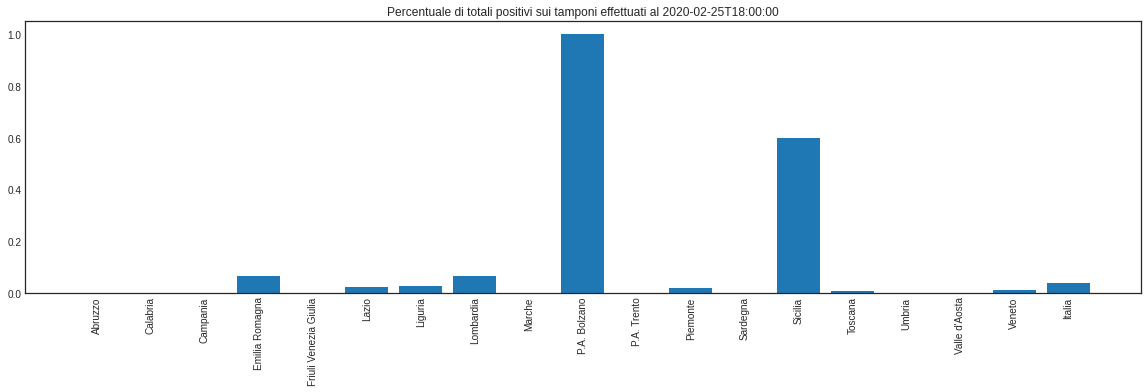

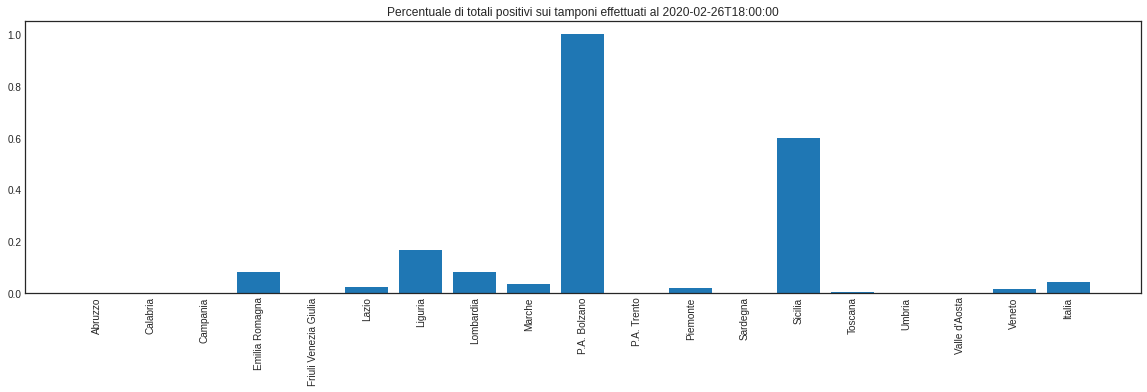

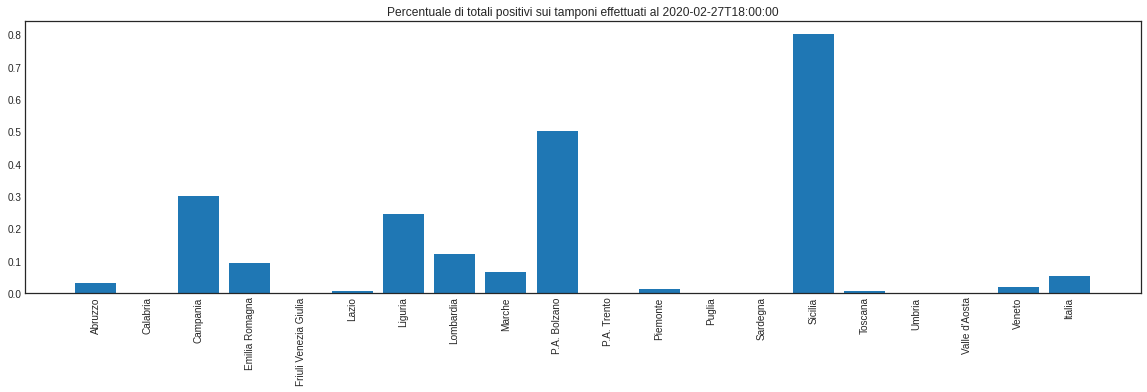

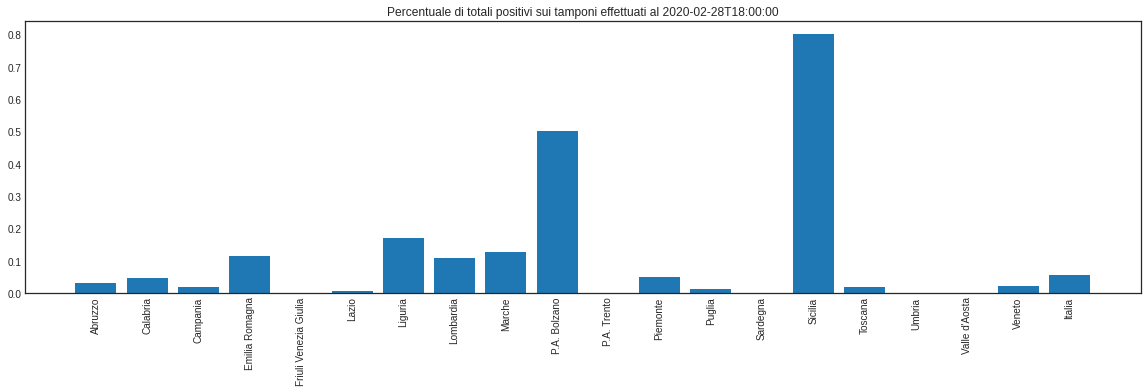

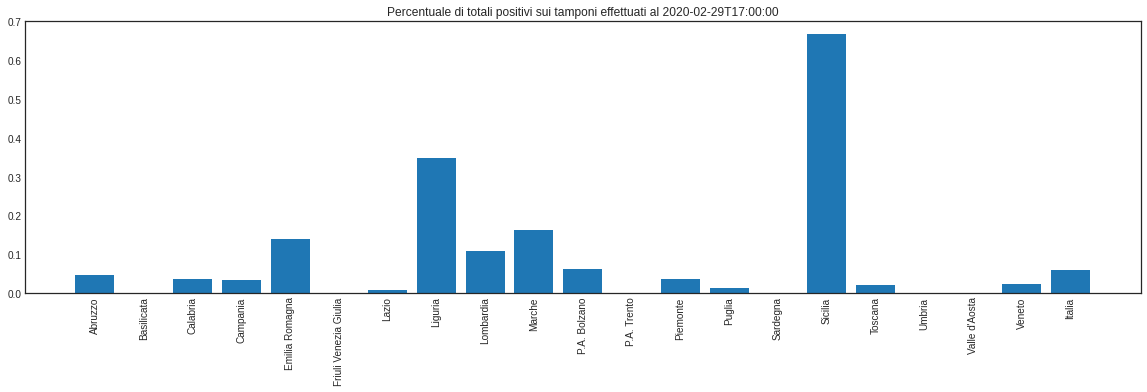

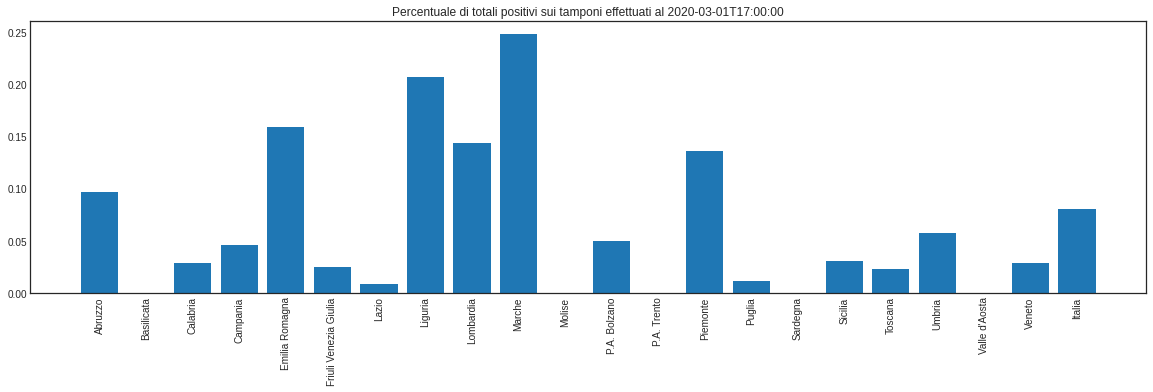

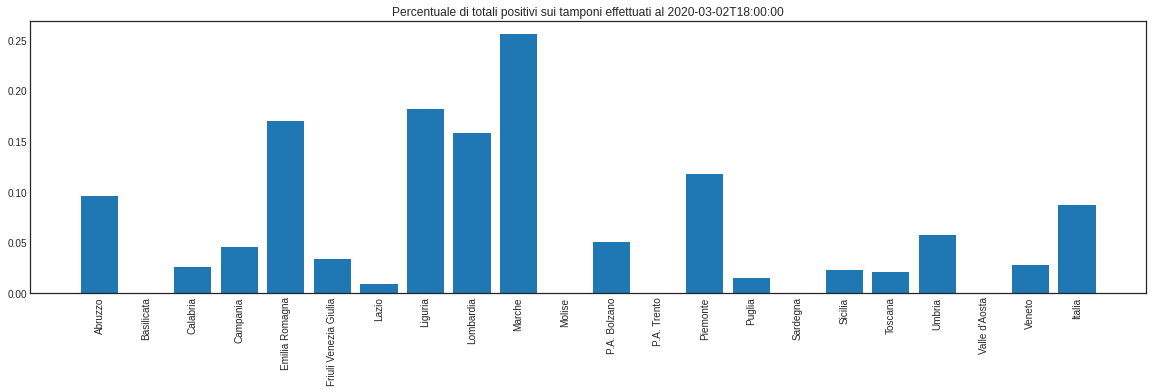

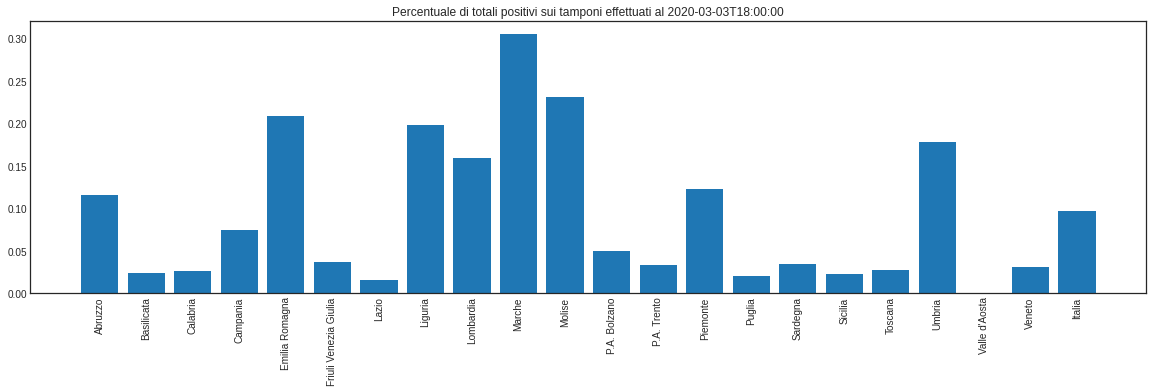

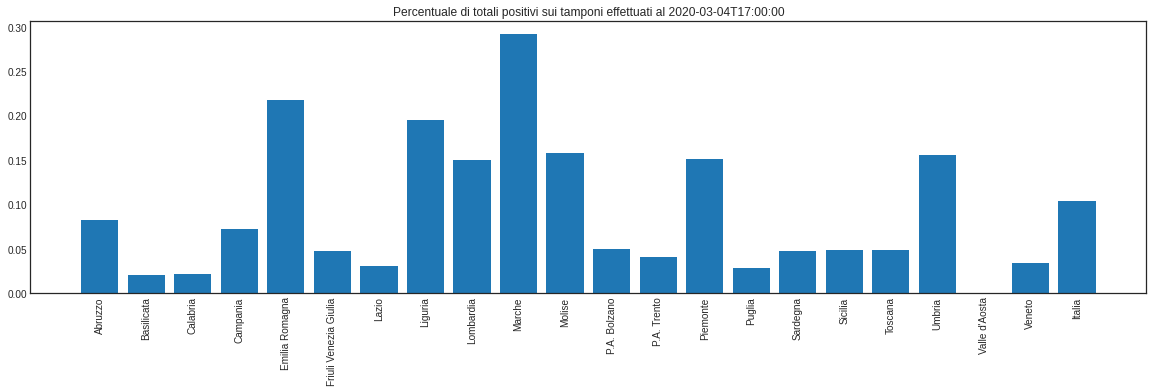

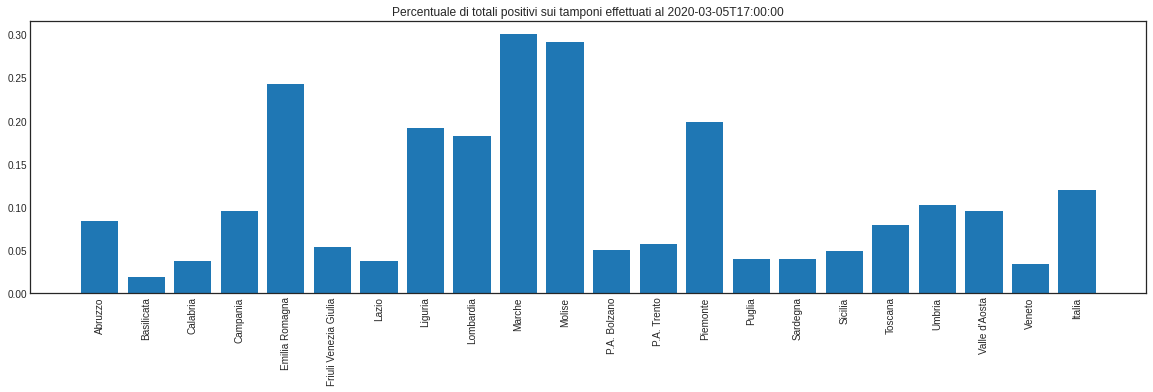

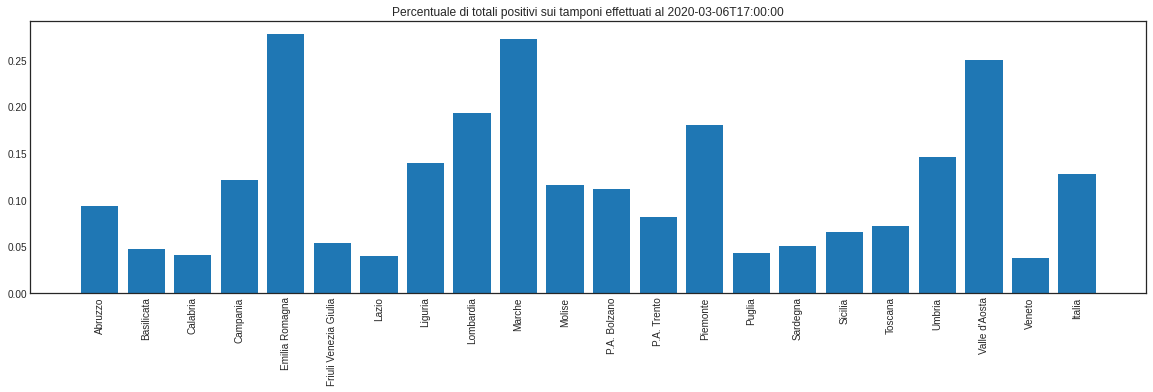

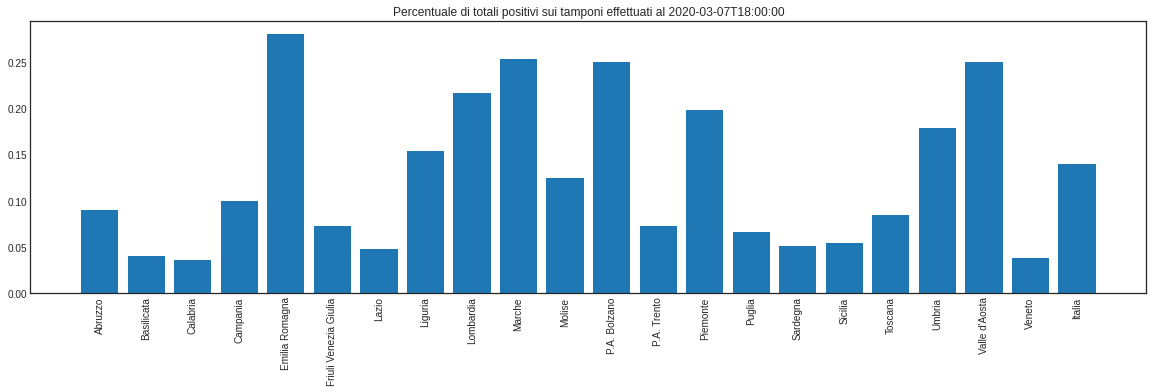

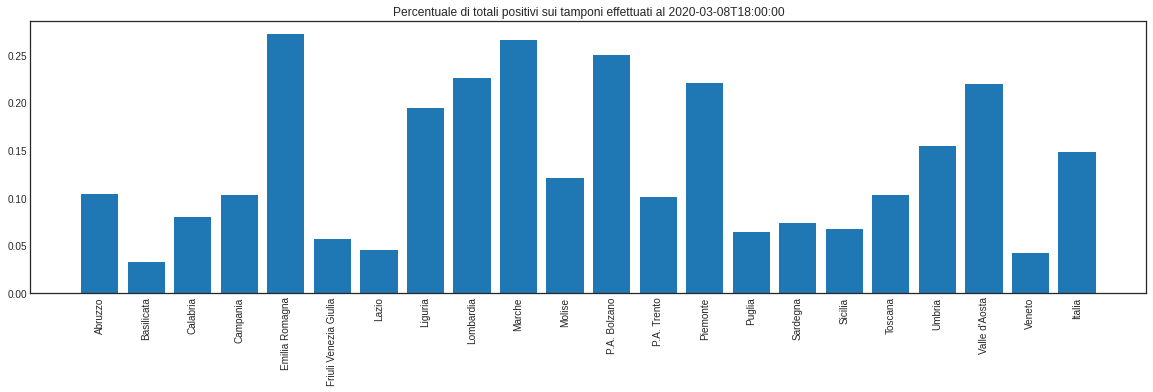

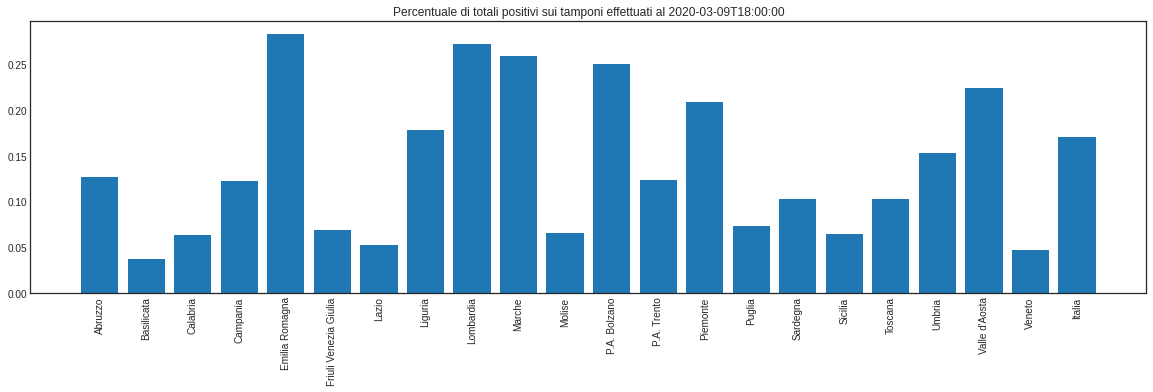

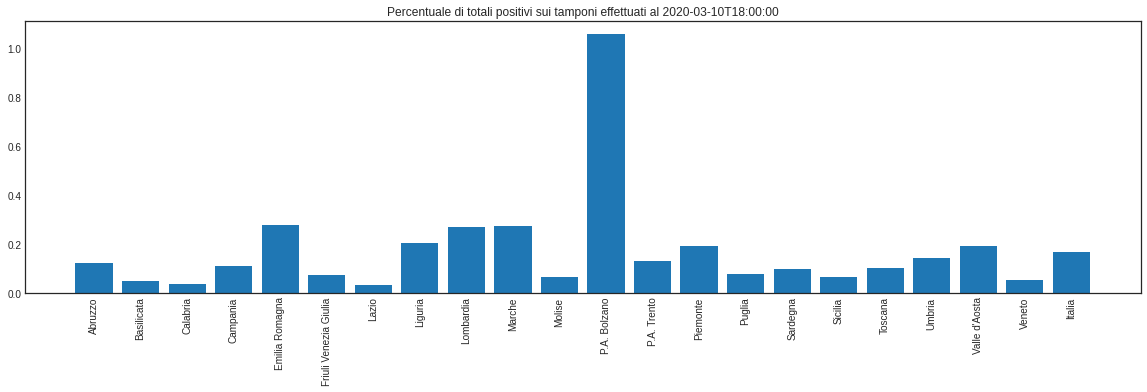

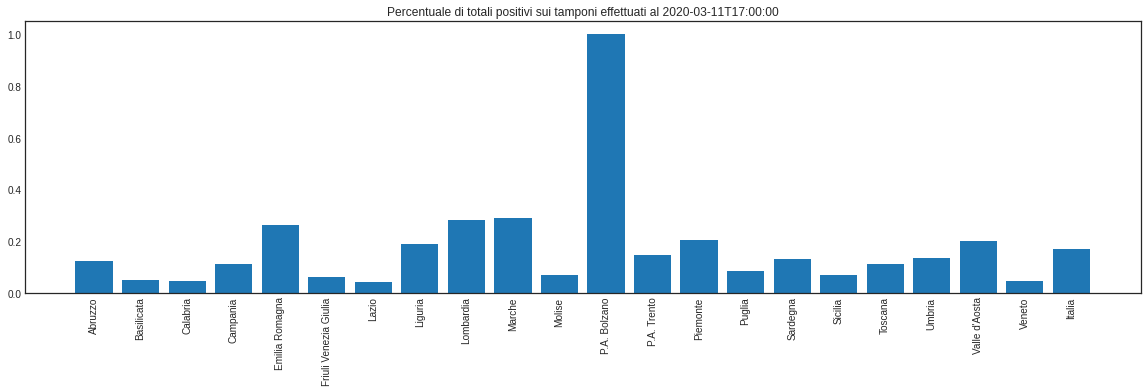

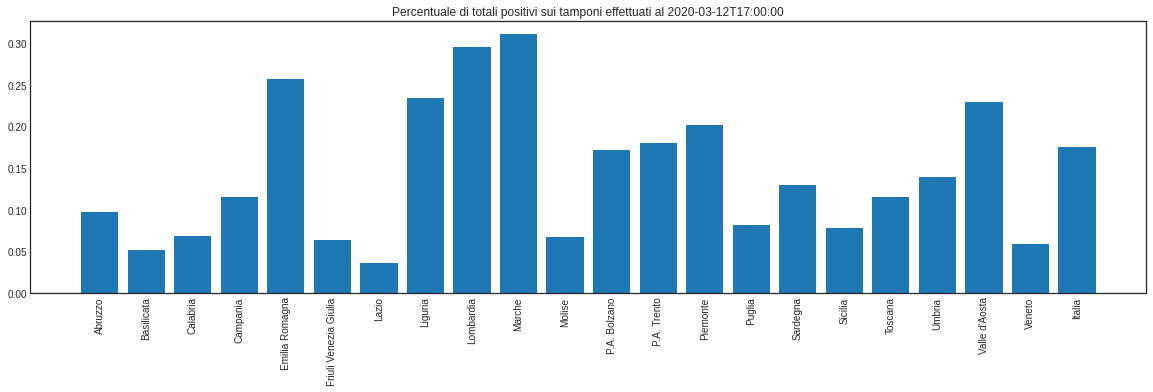

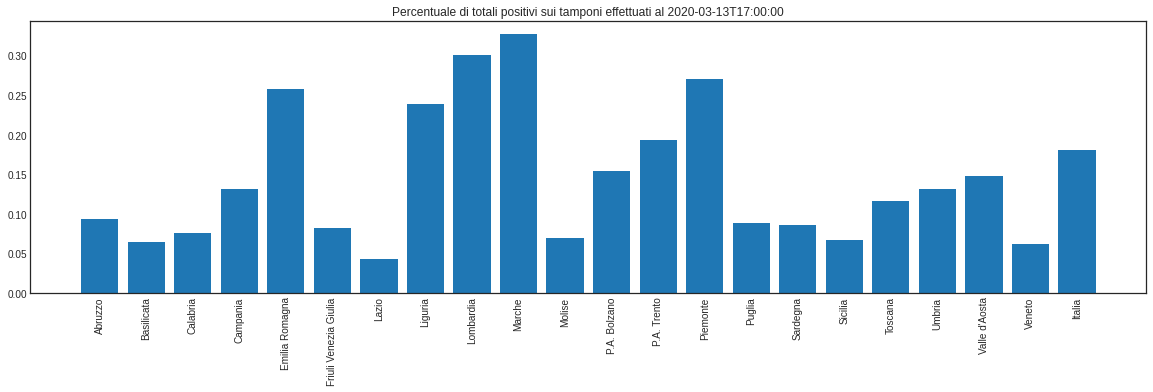

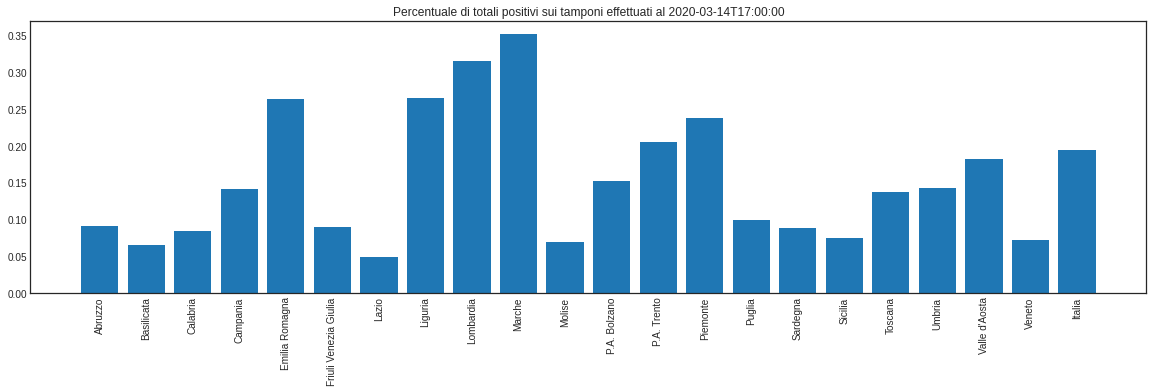

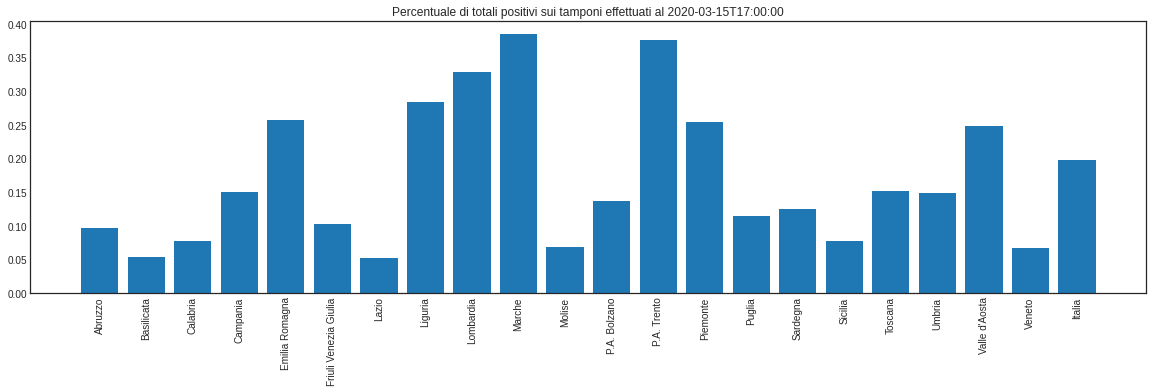

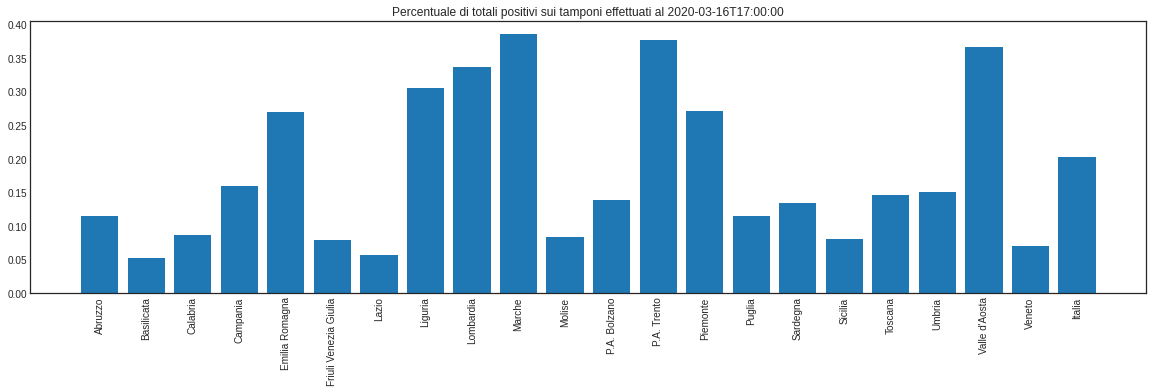

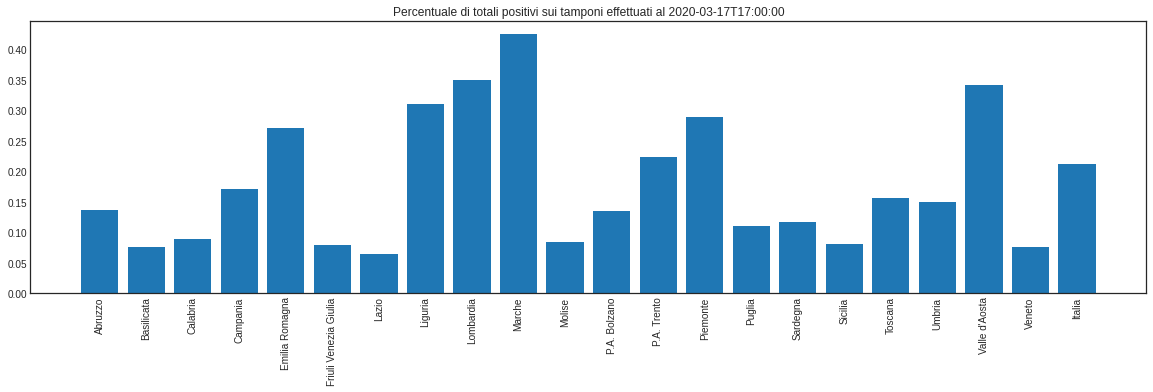

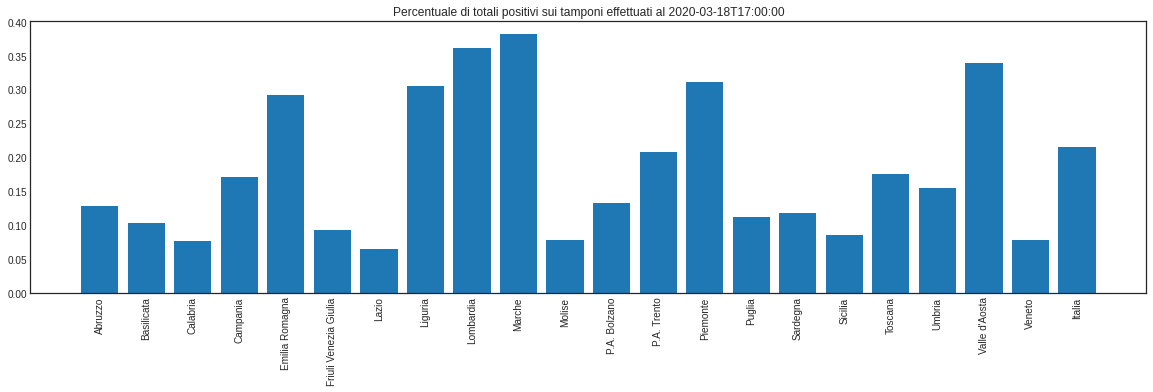

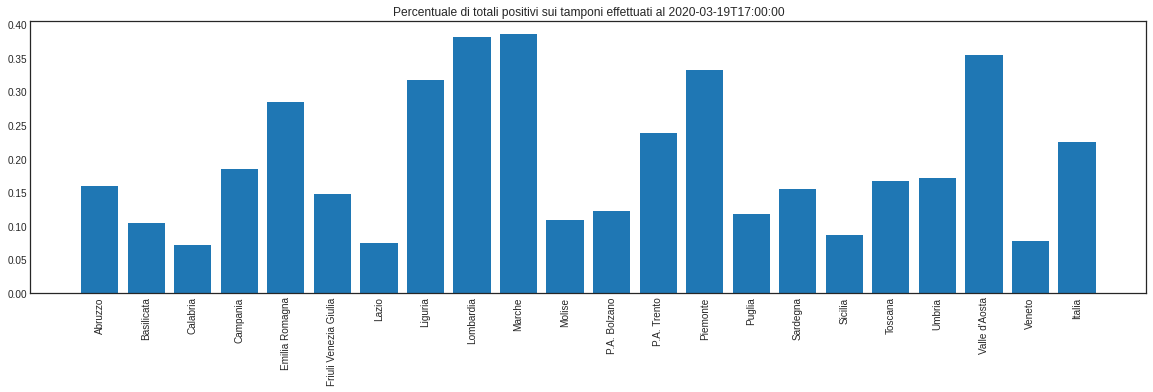

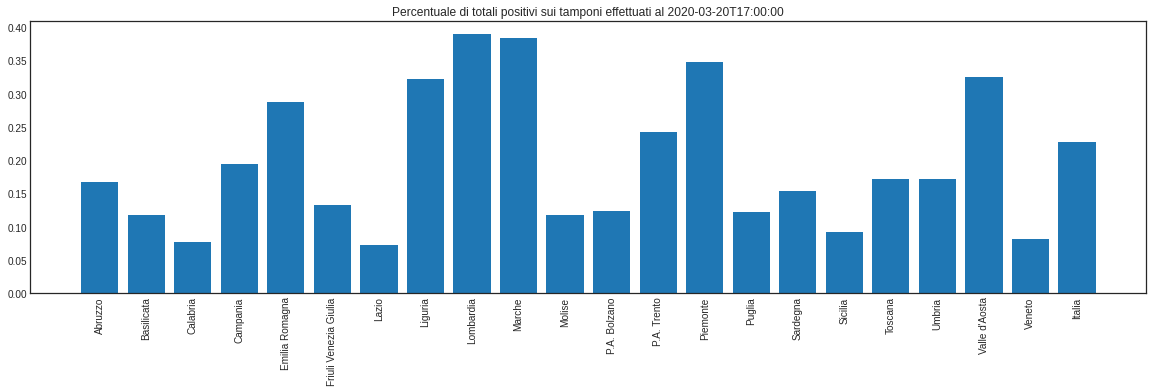

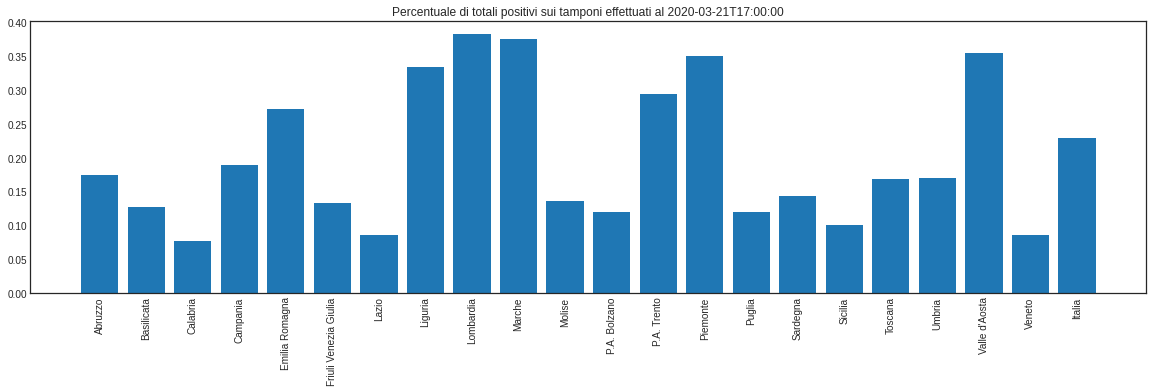

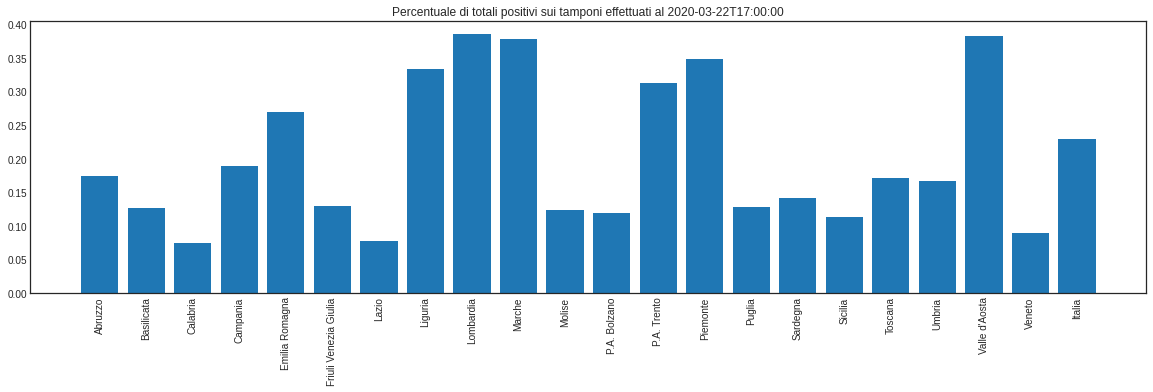

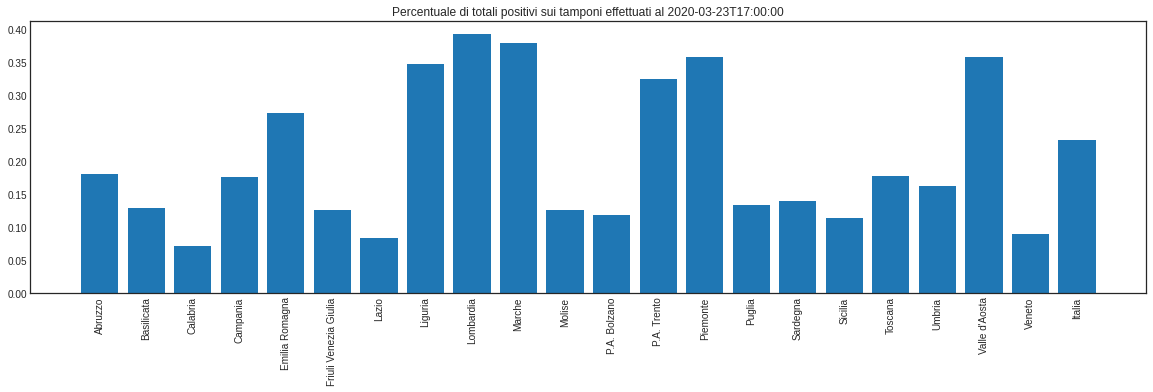

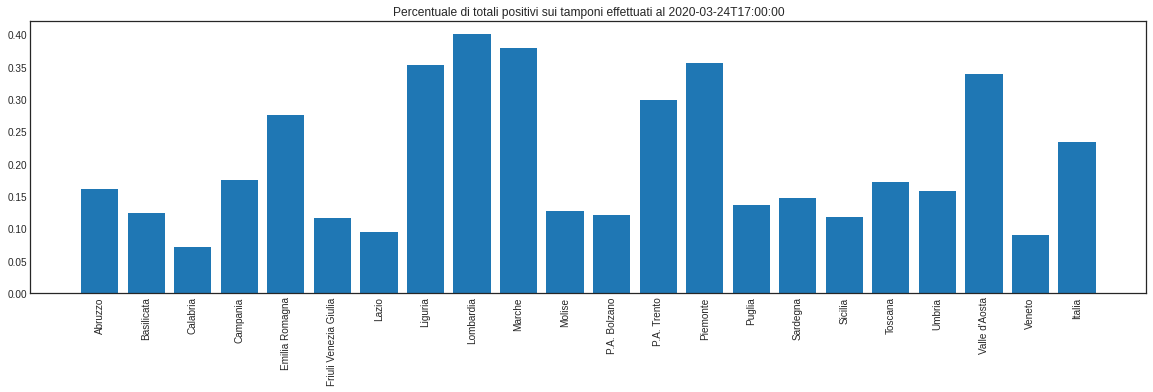

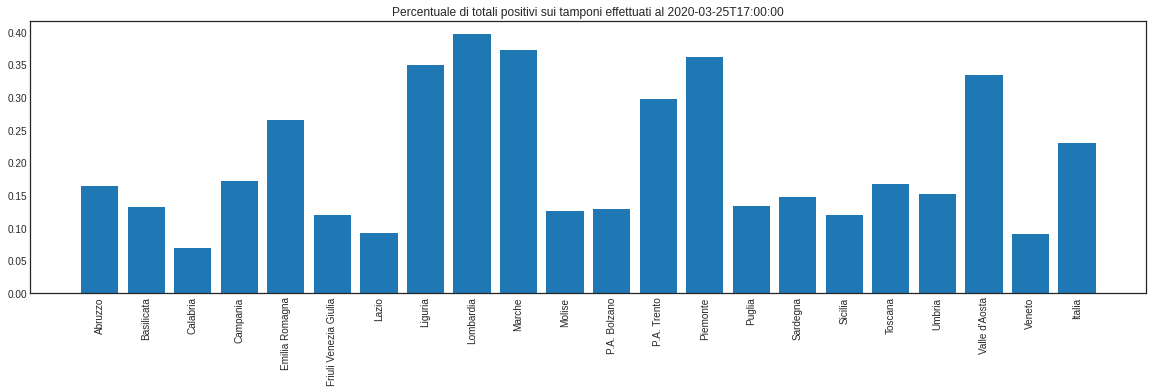

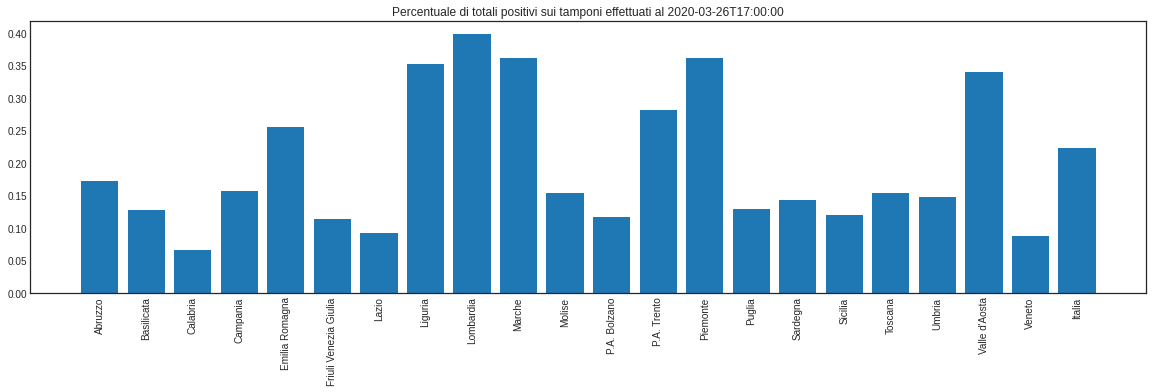

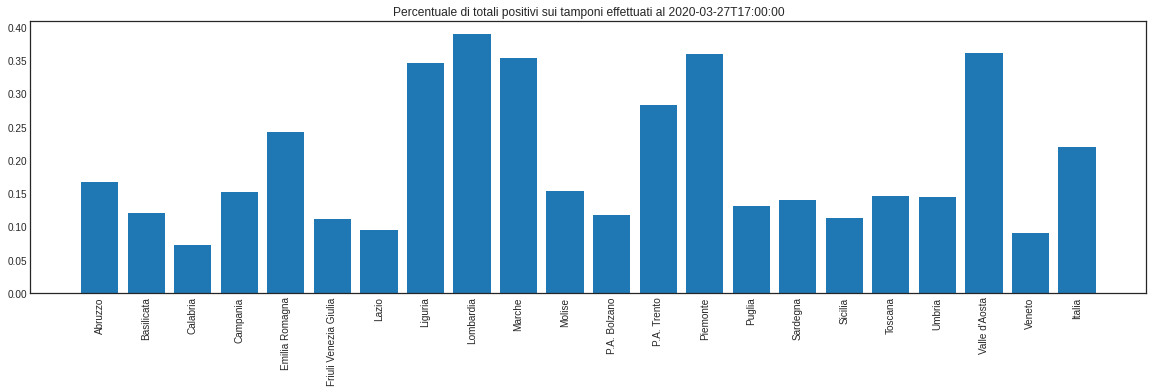

In [107]:
for day in italy_tested.index: 
    italy_tested_curr_day = italy_tested[italy_tested.index == day]
    italy_total_positive_curr_day = italy_total_positive[italy_total_positive.index == day]
    italy_positive_vs_tested_curr_day = italy_total_positive_curr_day/italy_tested_curr_day
    italy_positive_vs_tested_curr_day_stacked = italy_positive_vs_tested_curr_day.stack()
    italy_positive_vs_tested_curr_day = italy_positive_vs_tested_curr_day_stacked.unstack(level=0)
    italy_positive_vs_tested_curr_day.columns = ['Positive_percentage']
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_positive_vs_tested_curr_day.index, height=italy_positive_vs_tested_curr_day.Positive_percentage)
    plt.title('Percentuale di totali positivi sui tamponi effettuati al ' + day);




L'esecuzione del tampone è mirata, ossia viene effettuata tendenzialmente a chi presenta sintomi sospetti però è curioso come si passi da percentuali del 10% al 40%... **forse nelle regioni a tasso più alto è anche più alto il numero di infetti nascosti?** In tal caso sarebbe opportuno partire con tamponi a campione in queste regioni che, tra l'altro, Marche a parte, sono confinanti e nell'ultimo mese sono state oggetto di intensi scambi turistici.